## Processing with aboveground biomass data based on my fieldworks and other authors

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
input_data = './FULL_DB_BIOMASS_OTHER_ALL_AUTHORS.csv'
df = pd.read_csv(input_data)
df.head()

,Groups,Species,Species_ID,Origin,Origin_ID,SI,A_years,H_m,DBH_cm,N_trees,...,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,1,Pine,0,n,0.0,4,50,9.7,14.6,486.0,...,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,1,Pine,0,n,0.0,2,65,20.6,20.6,785.0,...,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,1,Pine,0,n,0.0,2,50,13.6,15.4,1745.0,...,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,1,Pine,0,n,0.0,1,60,23.3,22.2,665.0,...,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,1,Pine,0,n,0.0,3,65,15.6,16.4,955.0,...,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Groups','Species_ID','Origin_ID','SI','A_years','H_m','DBH_cm','RS(P)',          'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha'
'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species_ID','Origin_ID','H_m','DBH_cm', 'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha', 'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,0,0.0,9.7,14.6,9.7,43.9,18.9,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,0,0.0,20.6,20.6,32.2,254.0,113.1,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,0,0.0,13.6,15.4,35.2,190.0,87.8,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,0,0.0,23.3,22.2,29.6,277.7,106.5,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,0,0.0,15.6,16.4,20.4,142.5,67.0,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species_ID         857 non-null    int64  
 1   Origin_ID          856 non-null    float64
 2   H_m                857 non-null    float64
 3   DBH_cm             856 non-null    float64
 4   BA_sq_m_ha         857 non-null    float64
 5   GS_cub_m           857 non-null    float64
 6   ALL_STEM_t_ha      855 non-null    float64
 7   Stem_wood_t_ha     747 non-null    float64
 8   Stem_bark_t_ha     747 non-null    float64
 9   Crown_t_ha         843 non-null    float64
 10  Foliage_t_ha       854 non-null    float64
 11  LN_GS_cub_m        857 non-null    float64
 12  LN_ALL_STEM_t_ha   855 non-null    float64
 13  LN_Stem_wood_t_ha  747 non-null    float64
 14  LN_Stem_bark_t_ha  747 non-null    float64
 15  LN_Crown_t_ha      843 non-null    float64
 16  LN_Foliage_t_ha    854 non

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species_ID"])["Foliage_t_ha", "ALL_STEM_t_ha"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Foliage_t_ha                                                       \
                  count       mean       std   min      25%     50%      75%   
Species_ID                                                                     
0                 456.0   5.913969  2.521710  0.20   4.1275   5.925   7.5900   
1                   7.0  15.540000  5.273942  8.32  11.1000  17.220  19.6550   
2                 120.0   2.630833  2.251376  0.33   1.3625   2.200   3.5525   
3                 115.0   2.746783  1.336990  0.80   1.8000   2.380   3.4200   
4                  66.0   3.630455  1.363152  0.93   2.6050   3.520   4.3475   
5                  90.0   4.213444  1.790589  0.52   2.7275   4.345   5.6850   

                  ALL_STEM_t_ha                                              \
              max         count        mean        std   min     25%    50%   
Species_ID                                                                    
0           14.70         457.0   97.049891  61.854506   1.8  47.500   92.7   
1           21.73           7.0  123.814286  61.879895  46.3  70.650  133.9   
2           16.10         120.0   74.495000  44.523333   5.1  37.275   68.1   
3            7.58         115.0  107.607826  55.589186  11.0  62.700  106.8   
4            8.57          66.0   84.946970  58.875162   8.2  40.750   61.2   
5            6.84          90.0  173.065556  99.100647   5.0  93.075  161.3   

                            
                75%    max  
Species_ID                  
0           135.900  310.7  
1           174.550  196.1  
2           103.075  193.5  
3           145.450  251.6  
4           125.000  245.4  
5           253.375  363.9

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
count,857.000000,856.000000,857.000000,856.000000,857.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000
mean,1.529755,0.279206,16.452275,17.132243,26.329988,229.013069,102.590877,92.779518,12.060107,13.821969,4.749356,5.166919,4.343766,4.246975,2.201232,2.318149,1.364906
std,1.823872,0.448871,7.039954,10.439115,10.629993,144.362106,68.758819,61.992238,9.595428,11.567546,2.826586,0.839680,0.869479,0.854856,0.806766,0.829446,0.672551
min,0.000000,0.000000,1.500000,1.100000,1.000000,2.400000,1.800000,2.000000,0.300000,0.500000,0.200000,0.880000,0.590000,0.690000,-1.200000,-0.690000,-1.610000
25%,0.000000,0.000000,11.200000,9.900000,19.000000,116.000000,47.500000,42.900000,5.950000,6.610000,2.600000,4.750000,3.860000,3.760000,1.780000,1.890000,0.960000
50%,0.000000,0.000000,16.100000,15.500000,26.800000,206.000000,93.500000,84.600000,9.300000,10.820000,4.300000,5.330000,4.540000,4.440000,2.230000,2.380000,1.460000
75%,3.000000,1.000000,21.200000,22.100000,34.500000,320.000000,140.500000,125.500000,15.300000,16.435000,6.367500,5.770000,4.950000,4.830000,2.730000,2.800000,1.850000
max,5.000000,1.000000,38.300000,94.000000,51.500000,735.000000,363.900000,315.200000,65.700000,69.120000,21.730000,6.600000,5.900000,5.750000,4.190000,4.240000,3.080000


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "Foliage_t_ha"
indep_variables = ['Species_ID','Origin_ID','H_m','DBH_cm','BA_sq_m_ha']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     Species_ID  Origin_ID   H_m  DBH_cm  BA_sq_m_ha  GS_cub_m  ALL_STEM_t_ha  \
0             0        0.0   9.7    14.6         9.7      43.9           18.9   
1             0        0.0  20.6    20.6        32.2     254.0          113.1   
2             0        0.0  13.6    15.4        35.2     190.0           87.8   
3             0        0.0  23.3    22.2        29.6     277.7          106.5   
4             0        0.0  15.6    16.4        20.4     142.5           67.0   
..          ...        ...   ...     ...         ...       ...            ...   
852           3        0.0   7.8     4.4         9.2      39.8           17.8   
853           3        0.0  12.7     9.0        20.5     123.6           47.1   
854           3        0.0  12.2     8.1        20.3     141.7           51.9   
855           2        0.0  14.3    12.4        25.1     176.5          100.7   
856           2        0.0  21.1    25.6        21.0     191.6           99.9   

     Stem_wood_t_ha  Stem_b

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha
0,0,0.0,9.7,14.6,9.7
1,0,0.0,20.6,20.6,32.2
2,0,0.0,13.6,15.4,35.2
3,0,0.0,23.3,22.2,29.6
4,0,0.0,15.6,16.4,20.4


In [11]:
# Columns in "y" data collections
y.head()

,Foliage_t_ha
0,1.6
1,4.1
2,4.1
3,5.4
4,3.4


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.5284001837915393, 0.6252396484632716, 0.5786563770433538]
    Mean: 0.577
    Std: 0.040

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.65126099 1.84455291 1.87092498]
    Mean: 1.789
    Std: 0.098

 --------------------
Mean absolute error (MAE): 

    Scores: [1.170015000912181, 1.1286400117581352, 1.4777297401931924]
    Mean: 1.259
    Std: 0.156

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.7735899887742076                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.04912605539468079                 # gamma
print('Gamma: ' + str(p2))

p3 = 0.10427950972801546                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 4            # max_depth
print('Max_depth: ' + str(p4))

p5 = 169         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.9736807477035929                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.7735899887742076
Gamma: 0.04912605539468079
Learning_rate: 0.10427950972801546
Max_depth: 4
N_estimators: 169
Subsample: 0.9736807477035929


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:4.76072	validation_1-rmse:4.22229
[1]	validation_0-rmse:4.39440	validation_1-rmse:3.85246
[2]	validation_0-rmse:4.09267	validation_1-rmse:3.55502
[3]	validation_0-rmse:3.80362	validation_1-rmse:3.26630
[4]	validation_0-rmse:3.52769	validation_1-rmse:3.01084
[5]	validation_0-rmse:3.27935	validation_1-rmse:2.77444


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.06825	validation_1-rmse:2.57861
[7]	validation_0-rmse:2.88961	validation_1-rmse:2.40360
[8]	validation_0-rmse:2.75558	validation_1-rmse:2.29654
[9]	validation_0-rmse:2.62814	validation_1-rmse:2.17417
[10]	validation_0-rmse:2.53097	validation_1-rmse:2.09674
[11]	validation_0-rmse:2.41132	validation_1-rmse:2.00705
[12]	validation_0-rmse:2.31038	validation_1-rmse:1.93279
[13]	validation_0-rmse:2.22473	validation_1-rmse:1.87411
[14]	validation_0-rmse:2.14948	validation_1-rmse:1.82406
[15]	validation_0-rmse:2.08745	validation_1-rmse:1.78050
[16]	validation_0-rmse:2.02280	validation_1-rmse:1.75278
[17]	validation_0-rmse:1.97647	validation_1-rmse:1.72691
[18]	validation_0-rmse:1.92865	validation_1-rmse:1.70381
[19]	validation_0-rmse:1.88912	validation_1-rmse:1.68881
[20]	validation_0-rmse:1.84331	validation_1-rmse:1.66815
[21]	validation_0-rmse:1.80695	validation_1-rmse:1.65019
[22]	validation_0-rmse:1.77744	validation_1-rmse:1.63748
[23]	validation_0-rmse:1.75574	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.63281	validation_1-rmse:4.79643
[1]	validation_0-rmse:4.27562	validation_1-rmse:4.41753
[2]	validation_0-rmse:3.97757	validation_1-rmse:4.10876
[3]	validation_0-rmse:3.69566	validation_1-rmse:3.82261
[4]	validation_0-rmse:3.42385	validation_1-rmse:3.56522
[5]	validation_0-rmse:3.18558	validation_1-rmse:3.33601


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.97429	validation_1-rmse:3.14252
[7]	validation_0-rmse:2.80550	validation_1-rmse:2.97777
[8]	validation_0-rmse:2.67180	validation_1-rmse:2.84732
[9]	validation_0-rmse:2.54801	validation_1-rmse:2.72685
[10]	validation_0-rmse:2.44887	validation_1-rmse:2.63185
[11]	validation_0-rmse:2.32946	validation_1-rmse:2.53655
[12]	validation_0-rmse:2.22886	validation_1-rmse:2.46291
[13]	validation_0-rmse:2.14179	validation_1-rmse:2.40395
[14]	validation_0-rmse:2.06461	validation_1-rmse:2.35224
[15]	validation_0-rmse:2.00106	validation_1-rmse:2.30865
[16]	validation_0-rmse:1.94729	validation_1-rmse:2.27603
[17]	validation_0-rmse:1.90181	validation_1-rmse:2.25084
[18]	validation_0-rmse:1.85594	validation_1-rmse:2.21987
[19]	validation_0-rmse:1.81497	validation_1-rmse:2.20091
[20]	validation_0-rmse:1.78137	validation_1-rmse:2.17538
[21]	validation_0-rmse:1.74937	validation_1-rmse:2.15159
[22]	validation_0-rmse:1.72535	validation_1-rmse:2.13567
[23]	validation_0-rmse:1.70288	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.59504	validation_1-rmse:4.96769
[1]	validation_0-rmse:4.23413	validation_1-rmse:4.62101
[2]	validation_0-rmse:3.93365	validation_1-rmse:4.31842
[3]	validation_0-rmse:3.64996	validation_1-rmse:4.04406
[4]	validation_0-rmse:3.38561	validation_1-rmse:3.77869
[5]	validation_0-rmse:3.14857	validation_1-rmse:3.54843
[6]	validation_0-rmse:2.94712	validation_1-rmse:3.35346
[7]	validation_0-rmse:2.77146	validation_1-rmse:3.19413
[8]	validation_0-rmse:2.64092	validation_1-rmse:3.07025
[9]	validation_0-rmse:2.51528	validation_1-rmse:2.95499
[10]	validation_0-rmse:2.42266	validation_1-rmse:2.86683
[11]	validation_0-rmse:2.30836	validation_1-rmse:2.76845
[12]	validation_0-rmse:2.20124	validation_1-rmse:2.68057
[13]	validation_0-rmse:2.10733	validation_1-rmse:2.59113
[14]	validation_0-rmse:2.03381	validation_1-rmse:2.53074
[15]	validation_0-rmse:1.96288	validation_1-rmse:2.47556
[16]	validation_0-rmse:1.90385	validation_1-rmse:2.42081
[17]	validation_0-rmse:1.85839	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.78126	validation_1-rmse:4.14081
[1]	validation_0-rmse:4.41063	validation_1-rmse:3.78305
[2]	validation_0-rmse:4.09917	validation_1-rmse:3.49389


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.80936	validation_1-rmse:3.21794
[4]	validation_0-rmse:3.53706	validation_1-rmse:2.96803
[5]	validation_0-rmse:3.29392	validation_1-rmse:2.74341
[6]	validation_0-rmse:3.08639	validation_1-rmse:2.55535
[7]	validation_0-rmse:2.91374	validation_1-rmse:2.39174
[8]	validation_0-rmse:2.77824	validation_1-rmse:2.27639
[9]	validation_0-rmse:2.65130	validation_1-rmse:2.16066
[10]	validation_0-rmse:2.55494	validation_1-rmse:2.07689
[11]	validation_0-rmse:2.43956	validation_1-rmse:1.99085
[12]	validation_0-rmse:2.33158	validation_1-rmse:1.91317
[13]	validation_0-rmse:2.23914	validation_1-rmse:1.84882
[14]	validation_0-rmse:2.16423	validation_1-rmse:1.79492
[15]	validation_0-rmse:2.10171	validation_1-rmse:1.74883
[16]	validation_0-rmse:2.05060	validation_1-rmse:1.70778
[17]	validation_0-rmse:2.00434	validation_1-rmse:1.67475
[18]	validation_0-rmse:1.95994	validation_1-rmse:1.64410
[19]	validation_0-rmse:1.91095	validation_1-rmse:1.63143
[20]	validation_0-rmse:1.87064	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.69202	validation_1-rmse:4.56000
[1]	validation_0-rmse:4.32592	validation_1-rmse:4.21728
[2]	validation_0-rmse:4.01578	validation_1-rmse:3.92782
[3]	validation_0-rmse:3.72505	validation_1-rmse:3.65784


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.45162	validation_1-rmse:3.39838
[5]	validation_0-rmse:3.20701	validation_1-rmse:3.17341
[6]	validation_0-rmse:2.99928	validation_1-rmse:2.97521
[7]	validation_0-rmse:2.82410	validation_1-rmse:2.80759
[8]	validation_0-rmse:2.68931	validation_1-rmse:2.69596
[9]	validation_0-rmse:2.56153	validation_1-rmse:2.58939
[10]	validation_0-rmse:2.46531	validation_1-rmse:2.51380
[11]	validation_0-rmse:2.34985	validation_1-rmse:2.40493
[12]	validation_0-rmse:2.25331	validation_1-rmse:2.31503
[13]	validation_0-rmse:2.17242	validation_1-rmse:2.23982
[14]	validation_0-rmse:2.09967	validation_1-rmse:2.16922
[15]	validation_0-rmse:2.04136	validation_1-rmse:2.11447
[16]	validation_0-rmse:1.98147	validation_1-rmse:2.06574
[17]	validation_0-rmse:1.93669	validation_1-rmse:2.02957
[18]	validation_0-rmse:1.88693	validation_1-rmse:1.99470
[19]	validation_0-rmse:1.84324	validation_1-rmse:1.96515
[20]	validation_0-rmse:1.80064	validation_1-rmse:1.94269
[21]	validation_0-rmse:1.76363	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.66897	validation_1-rmse:4.64850
[1]	validation_0-rmse:4.30557	validation_1-rmse:4.29504
[2]	validation_0-rmse:4.00354	validation_1-rmse:3.99016


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.71493	validation_1-rmse:3.71694
[4]	validation_0-rmse:3.44718	validation_1-rmse:3.46301
[5]	validation_0-rmse:3.20039	validation_1-rmse:3.24096
[6]	validation_0-rmse:2.99075	validation_1-rmse:3.05464
[7]	validation_0-rmse:2.81635	validation_1-rmse:2.90131
[8]	validation_0-rmse:2.68536	validation_1-rmse:2.77414
[9]	validation_0-rmse:2.55646	validation_1-rmse:2.66699
[10]	validation_0-rmse:2.45775	validation_1-rmse:2.58584
[11]	validation_0-rmse:2.33697	validation_1-rmse:2.49008
[12]	validation_0-rmse:2.23682	validation_1-rmse:2.41632
[13]	validation_0-rmse:2.15222	validation_1-rmse:2.35337
[14]	validation_0-rmse:2.07580	validation_1-rmse:2.29900
[15]	validation_0-rmse:2.01213	validation_1-rmse:2.25264
[16]	validation_0-rmse:1.95386	validation_1-rmse:2.19834
[17]	validation_0-rmse:1.90774	validation_1-rmse:2.16420
[18]	validation_0-rmse:1.86269	validation_1-rmse:2.13579
[19]	validation_0-rmse:1.81919	validation_1-rmse:2.09683
[20]	validation_0-rmse:1.77943	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.75291	validation_1-rmse:4.27616
[1]	validation_0-rmse:4.39164	validation_1-rmse:3.91584
[2]	validation_0-rmse:4.08247	validation_1-rmse:3.61921


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.79313	validation_1-rmse:3.34232
[4]	validation_0-rmse:3.51825	validation_1-rmse:3.08070
[5]	validation_0-rmse:3.27095	validation_1-rmse:2.85119
[6]	validation_0-rmse:3.05916	validation_1-rmse:2.65660
[7]	validation_0-rmse:2.89098	validation_1-rmse:2.50071
[8]	validation_0-rmse:2.75564	validation_1-rmse:2.37948
[9]	validation_0-rmse:2.62884	validation_1-rmse:2.26214
[10]	validation_0-rmse:2.53637	validation_1-rmse:2.17587
[11]	validation_0-rmse:2.41692	validation_1-rmse:2.08316
[12]	validation_0-rmse:2.31779	validation_1-rmse:2.00704
[13]	validation_0-rmse:2.23187	validation_1-rmse:1.94445
[14]	validation_0-rmse:2.15588	validation_1-rmse:1.89287
[15]	validation_0-rmse:2.08228	validation_1-rmse:1.85060
[16]	validation_0-rmse:2.02931	validation_1-rmse:1.81446
[17]	validation_0-rmse:1.98465	validation_1-rmse:1.78140
[18]	validation_0-rmse:1.92971	validation_1-rmse:1.75624
[19]	validation_0-rmse:1.89191	validation_1-rmse:1.73757
[20]	validation_0-rmse:1.86153	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.68856	validation_1-rmse:4.60410
[1]	validation_0-rmse:4.32359	validation_1-rmse:4.24087


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.02405	validation_1-rmse:3.93163
[3]	validation_0-rmse:3.74376	validation_1-rmse:3.62940
[4]	validation_0-rmse:3.47142	validation_1-rmse:3.36396
[5]	validation_0-rmse:3.22878	validation_1-rmse:3.12444
[6]	validation_0-rmse:3.02200	validation_1-rmse:2.92474
[7]	validation_0-rmse:2.85355	validation_1-rmse:2.75423
[8]	validation_0-rmse:2.72669	validation_1-rmse:2.62270
[9]	validation_0-rmse:2.60457	validation_1-rmse:2.49850
[10]	validation_0-rmse:2.50751	validation_1-rmse:2.41246
[11]	validation_0-rmse:2.39026	validation_1-rmse:2.30795
[12]	validation_0-rmse:2.29250	validation_1-rmse:2.22611
[13]	validation_0-rmse:2.20873	validation_1-rmse:2.15513
[14]	validation_0-rmse:2.12415	validation_1-rmse:2.09949
[15]	validation_0-rmse:2.06383	validation_1-rmse:2.04984
[16]	validation_0-rmse:2.00417	validation_1-rmse:2.00792
[17]	validation_0-rmse:1.95962	validation_1-rmse:1.96825
[18]	validation_0-rmse:1.91494	validation_1-rmse:1.93111
[19]	validation_0-rmse:1.87726	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.65374	validation_1-rmse:4.75813
[1]	validation_0-rmse:4.28271	validation_1-rmse:4.44919
[2]	validation_0-rmse:3.96907	validation_1-rmse:4.20147


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.67451	validation_1-rmse:3.96101
[4]	validation_0-rmse:3.40604	validation_1-rmse:3.69415
[5]	validation_0-rmse:3.17109	validation_1-rmse:3.47057
[6]	validation_0-rmse:2.97116	validation_1-rmse:3.26308
[7]	validation_0-rmse:2.78725	validation_1-rmse:3.13751
[8]	validation_0-rmse:2.65091	validation_1-rmse:3.04798
[9]	validation_0-rmse:2.52014	validation_1-rmse:2.95896
[10]	validation_0-rmse:2.41876	validation_1-rmse:2.89601
[11]	validation_0-rmse:2.30713	validation_1-rmse:2.78776
[12]	validation_0-rmse:2.21793	validation_1-rmse:2.68316
[13]	validation_0-rmse:2.13794	validation_1-rmse:2.62702
[14]	validation_0-rmse:2.06241	validation_1-rmse:2.54561
[15]	validation_0-rmse:2.00057	validation_1-rmse:2.47463
[16]	validation_0-rmse:1.95449	validation_1-rmse:2.41299
[17]	validation_0-rmse:1.91612	validation_1-rmse:2.35184
[18]	validation_0-rmse:1.86409	validation_1-rmse:2.33260
[19]	validation_0-rmse:1.82982	validation_1-rmse:2.31813
[20]	validation_0-rmse:1.79259	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.72763	validation_1-rmse:4.35782
[1]	validation_0-rmse:4.36183	validation_1-rmse:3.98899
[2]	validation_0-rmse:4.05659	validation_1-rmse:3.70062


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.76687	validation_1-rmse:3.41671
[4]	validation_0-rmse:3.48604	validation_1-rmse:3.14749
[5]	validation_0-rmse:3.23645	validation_1-rmse:2.94186
[6]	validation_0-rmse:3.02355	validation_1-rmse:2.76800
[7]	validation_0-rmse:2.85468	validation_1-rmse:2.60486
[8]	validation_0-rmse:2.71898	validation_1-rmse:2.49228
[9]	validation_0-rmse:2.59054	validation_1-rmse:2.37305
[10]	validation_0-rmse:2.49344	validation_1-rmse:2.29224
[11]	validation_0-rmse:2.37296	validation_1-rmse:2.21123
[12]	validation_0-rmse:2.27047	validation_1-rmse:2.14787
[13]	validation_0-rmse:2.18465	validation_1-rmse:2.08923
[14]	validation_0-rmse:2.10741	validation_1-rmse:2.04320
[15]	validation_0-rmse:2.04235	validation_1-rmse:2.01302
[16]	validation_0-rmse:1.98775	validation_1-rmse:1.98608
[17]	validation_0-rmse:1.94012	validation_1-rmse:1.95975
[18]	validation_0-rmse:1.89606	validation_1-rmse:1.93418
[19]	validation_0-rmse:1.85931	validation_1-rmse:1.91791
[20]	validation_0-rmse:1.82358	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.69053	validation_1-rmse:4.57020
[1]	validation_0-rmse:4.31959	validation_1-rmse:4.20923
[2]	validation_0-rmse:4.01849	validation_1-rmse:3.91916


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.72824	validation_1-rmse:3.65096
[4]	validation_0-rmse:3.44628	validation_1-rmse:3.41142
[5]	validation_0-rmse:3.19727	validation_1-rmse:3.21031
[6]	validation_0-rmse:2.98241	validation_1-rmse:3.03709
[7]	validation_0-rmse:2.80692	validation_1-rmse:2.89003
[8]	validation_0-rmse:2.66976	validation_1-rmse:2.76194
[9]	validation_0-rmse:2.53785	validation_1-rmse:2.65893
[10]	validation_0-rmse:2.44184	validation_1-rmse:2.57338
[11]	validation_0-rmse:2.31786	validation_1-rmse:2.49845
[12]	validation_0-rmse:2.21113	validation_1-rmse:2.43731
[13]	validation_0-rmse:2.12266	validation_1-rmse:2.38660
[14]	validation_0-rmse:2.04518	validation_1-rmse:2.34276
[15]	validation_0-rmse:1.98045	validation_1-rmse:2.30949
[16]	validation_0-rmse:1.92664	validation_1-rmse:2.28435
[17]	validation_0-rmse:1.87732	validation_1-rmse:2.26150
[18]	validation_0-rmse:1.83127	validation_1-rmse:2.24606
[19]	validation_0-rmse:1.79172	validation_1-rmse:2.22964
[20]	validation_0-rmse:1.75202	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.57301	validation_1-rmse:5.02704
[1]	validation_0-rmse:4.21365	validation_1-rmse:4.67235
[2]	validation_0-rmse:3.91795	validation_1-rmse:4.37274
[3]	validation_0-rmse:3.63479	validation_1-rmse:4.10469


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.37095	validation_1-rmse:3.81938
[5]	validation_0-rmse:3.13406	validation_1-rmse:3.57043
[6]	validation_0-rmse:2.93267	validation_1-rmse:3.35635
[7]	validation_0-rmse:2.76417	validation_1-rmse:3.19898
[8]	validation_0-rmse:2.63276	validation_1-rmse:3.06592
[9]	validation_0-rmse:2.50316	validation_1-rmse:2.94126
[10]	validation_0-rmse:2.40914	validation_1-rmse:2.84714
[11]	validation_0-rmse:2.29655	validation_1-rmse:2.72979
[12]	validation_0-rmse:2.20659	validation_1-rmse:2.63295
[13]	validation_0-rmse:2.12648	validation_1-rmse:2.54740
[14]	validation_0-rmse:2.05608	validation_1-rmse:2.47205
[15]	validation_0-rmse:1.99801	validation_1-rmse:2.40789
[16]	validation_0-rmse:1.94285	validation_1-rmse:2.33533
[17]	validation_0-rmse:1.90108	validation_1-rmse:2.29090
[18]	validation_0-rmse:1.85908	validation_1-rmse:2.24498
[19]	validation_0-rmse:1.82425	validation_1-rmse:2.20654
[20]	validation_0-rmse:1.79082	validation_1-rmse:2.17446
[21]	validation_0-rmse:1.75535	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.72088	validation_1-rmse:4.44586
[1]	validation_0-rmse:4.36104	validation_1-rmse:4.07203
[2]	validation_0-rmse:4.05559	validation_1-rmse:3.75726


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.76841	validation_1-rmse:3.46848
[4]	validation_0-rmse:3.49538	validation_1-rmse:3.21297
[5]	validation_0-rmse:3.24852	validation_1-rmse:2.98637
[6]	validation_0-rmse:3.04235	validation_1-rmse:2.79829
[7]	validation_0-rmse:2.87017	validation_1-rmse:2.62483
[8]	validation_0-rmse:2.73989	validation_1-rmse:2.49700
[9]	validation_0-rmse:2.61602	validation_1-rmse:2.36853
[10]	validation_0-rmse:2.51826	validation_1-rmse:2.27198
[11]	validation_0-rmse:2.40030	validation_1-rmse:2.16459
[12]	validation_0-rmse:2.29242	validation_1-rmse:2.08046
[13]	validation_0-rmse:2.19957	validation_1-rmse:2.00720
[14]	validation_0-rmse:2.12429	validation_1-rmse:1.94033
[15]	validation_0-rmse:2.06231	validation_1-rmse:1.89609
[16]	validation_0-rmse:2.00233	validation_1-rmse:1.85853
[17]	validation_0-rmse:1.95487	validation_1-rmse:1.82420
[18]	validation_0-rmse:1.90507	validation_1-rmse:1.79137
[19]	validation_0-rmse:1.86732	validation_1-rmse:1.76049
[20]	validation_0-rmse:1.83195	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.66912	validation_1-rmse:4.67421
[1]	validation_0-rmse:4.30986	validation_1-rmse:4.31429


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.00947	validation_1-rmse:3.99405
[3]	validation_0-rmse:3.72517	validation_1-rmse:3.70784
[4]	validation_0-rmse:3.45052	validation_1-rmse:3.44857
[5]	validation_0-rmse:3.20580	validation_1-rmse:3.22320
[6]	validation_0-rmse:2.99593	validation_1-rmse:3.03520
[7]	validation_0-rmse:2.82554	validation_1-rmse:2.87117
[8]	validation_0-rmse:2.68826	validation_1-rmse:2.73959
[9]	validation_0-rmse:2.56460	validation_1-rmse:2.62349
[10]	validation_0-rmse:2.46613	validation_1-rmse:2.52810
[11]	validation_0-rmse:2.34417	validation_1-rmse:2.43528
[12]	validation_0-rmse:2.24110	validation_1-rmse:2.35670
[13]	validation_0-rmse:2.15351	validation_1-rmse:2.29116
[14]	validation_0-rmse:2.07791	validation_1-rmse:2.23998
[15]	validation_0-rmse:2.00225	validation_1-rmse:2.19560
[16]	validation_0-rmse:1.93582	validation_1-rmse:2.15922
[17]	validation_0-rmse:1.88865	validation_1-rmse:2.12201
[18]	validation_0-rmse:1.83677	validation_1-rmse:2.09385
[19]	validation_0-rmse:1.79817	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.47909	validation_1-rmse:5.42998
[1]	validation_0-rmse:4.11747	validation_1-rmse:5.11459
[2]	validation_0-rmse:3.81292	validation_1-rmse:4.84660


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.52203	validation_1-rmse:4.60013
[4]	validation_0-rmse:3.26664	validation_1-rmse:4.30825
[5]	validation_0-rmse:3.03460	validation_1-rmse:4.08222
[6]	validation_0-rmse:2.83933	validation_1-rmse:3.86252
[7]	validation_0-rmse:2.66122	validation_1-rmse:3.72763
[8]	validation_0-rmse:2.52746	validation_1-rmse:3.62230
[9]	validation_0-rmse:2.39845	validation_1-rmse:3.52152
[10]	validation_0-rmse:2.29547	validation_1-rmse:3.44038
[11]	validation_0-rmse:2.19216	validation_1-rmse:3.30367
[12]	validation_0-rmse:2.10673	validation_1-rmse:3.17771
[13]	validation_0-rmse:2.03471	validation_1-rmse:3.06711
[14]	validation_0-rmse:1.97069	validation_1-rmse:2.97415
[15]	validation_0-rmse:1.91805	validation_1-rmse:2.87979
[16]	validation_0-rmse:1.86576	validation_1-rmse:2.79926
[17]	validation_0-rmse:1.82621	validation_1-rmse:2.72534
[18]	validation_0-rmse:1.77812	validation_1-rmse:2.69126
[19]	validation_0-rmse:1.73335	validation_1-rmse:2.66909
[20]	validation_0-rmse:1.69326	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.67670	validation_1-rmse:4.62302
[1]	validation_0-rmse:4.31251	validation_1-rmse:4.25323
[2]	validation_0-rmse:4.00849	validation_1-rmse:3.95608


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.72151	validation_1-rmse:3.67300
[4]	validation_0-rmse:3.44854	validation_1-rmse:3.43249
[5]	validation_0-rmse:3.20528	validation_1-rmse:3.21204
[6]	validation_0-rmse:2.99648	validation_1-rmse:3.02977
[7]	validation_0-rmse:2.82745	validation_1-rmse:2.86428
[8]	validation_0-rmse:2.69819	validation_1-rmse:2.74772
[9]	validation_0-rmse:2.56833	validation_1-rmse:2.63319
[10]	validation_0-rmse:2.47215	validation_1-rmse:2.55435
[11]	validation_0-rmse:2.35239	validation_1-rmse:2.46252
[12]	validation_0-rmse:2.25549	validation_1-rmse:2.38852
[13]	validation_0-rmse:2.16948	validation_1-rmse:2.32738
[14]	validation_0-rmse:2.09505	validation_1-rmse:2.27633
[15]	validation_0-rmse:2.03334	validation_1-rmse:2.23231
[16]	validation_0-rmse:1.97477	validation_1-rmse:2.17424
[17]	validation_0-rmse:1.92954	validation_1-rmse:2.14396
[18]	validation_0-rmse:1.88273	validation_1-rmse:2.10384
[19]	validation_0-rmse:1.84398	validation_1-rmse:2.07784
[20]	validation_0-rmse:1.81353	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.70077	validation_1-rmse:4.55251
[1]	validation_0-rmse:4.33778	validation_1-rmse:4.19265
[2]	validation_0-rmse:4.03948	validation_1-rmse:3.89718


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.74886	validation_1-rmse:3.62169
[4]	validation_0-rmse:3.47903	validation_1-rmse:3.35531
[5]	validation_0-rmse:3.23069	validation_1-rmse:3.12289
[6]	validation_0-rmse:3.02452	validation_1-rmse:2.91902
[7]	validation_0-rmse:2.85242	validation_1-rmse:2.76125
[8]	validation_0-rmse:2.72300	validation_1-rmse:2.63960
[9]	validation_0-rmse:2.59768	validation_1-rmse:2.52930
[10]	validation_0-rmse:2.50293	validation_1-rmse:2.44770
[11]	validation_0-rmse:2.38767	validation_1-rmse:2.34029
[12]	validation_0-rmse:2.29119	validation_1-rmse:2.24571
[13]	validation_0-rmse:2.20656	validation_1-rmse:2.16289
[14]	validation_0-rmse:2.12344	validation_1-rmse:2.09962
[15]	validation_0-rmse:2.06285	validation_1-rmse:2.04052
[16]	validation_0-rmse:2.01236	validation_1-rmse:1.99284
[17]	validation_0-rmse:1.96623	validation_1-rmse:1.94709
[18]	validation_0-rmse:1.92274	validation_1-rmse:1.90829
[19]	validation_0-rmse:1.87496	validation_1-rmse:1.88565
[20]	validation_0-rmse:1.83243	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.66338	validation_1-rmse:4.72087
[1]	validation_0-rmse:4.30053	validation_1-rmse:4.35404
[2]	validation_0-rmse:3.99240	validation_1-rmse:4.06380


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.70767	validation_1-rmse:3.78836
[4]	validation_0-rmse:3.44330	validation_1-rmse:3.51821
[5]	validation_0-rmse:3.21211	validation_1-rmse:3.27240
[6]	validation_0-rmse:3.00839	validation_1-rmse:3.09186
[7]	validation_0-rmse:2.83157	validation_1-rmse:2.93399
[8]	validation_0-rmse:2.69706	validation_1-rmse:2.82187
[9]	validation_0-rmse:2.57299	validation_1-rmse:2.70897
[10]	validation_0-rmse:2.47771	validation_1-rmse:2.62747
[11]	validation_0-rmse:2.36556	validation_1-rmse:2.53064
[12]	validation_0-rmse:2.26905	validation_1-rmse:2.44849
[13]	validation_0-rmse:2.17626	validation_1-rmse:2.37588
[14]	validation_0-rmse:2.10541	validation_1-rmse:2.30405
[15]	validation_0-rmse:2.04299	validation_1-rmse:2.25067
[16]	validation_0-rmse:1.98263	validation_1-rmse:2.20845
[17]	validation_0-rmse:1.93857	validation_1-rmse:2.17031
[18]	validation_0-rmse:1.88487	validation_1-rmse:2.12336
[19]	validation_0-rmse:1.84436	validation_1-rmse:2.07890
[20]	validation_0-rmse:1.80891	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.66028	validation_1-rmse:4.71592
[1]	validation_0-rmse:4.29490	validation_1-rmse:4.38077
[2]	validation_0-rmse:3.98455	validation_1-rmse:4.09199


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.69214	validation_1-rmse:3.82556
[4]	validation_0-rmse:3.42175	validation_1-rmse:3.57228
[5]	validation_0-rmse:3.17896	validation_1-rmse:3.34873
[6]	validation_0-rmse:2.97199	validation_1-rmse:3.16993
[7]	validation_0-rmse:2.79844	validation_1-rmse:3.03150
[8]	validation_0-rmse:2.66614	validation_1-rmse:2.91161
[9]	validation_0-rmse:2.53599	validation_1-rmse:2.81250
[10]	validation_0-rmse:2.43846	validation_1-rmse:2.73389
[11]	validation_0-rmse:2.32340	validation_1-rmse:2.62631
[12]	validation_0-rmse:2.21578	validation_1-rmse:2.54837
[13]	validation_0-rmse:2.13129	validation_1-rmse:2.48399
[14]	validation_0-rmse:2.05545	validation_1-rmse:2.42587
[15]	validation_0-rmse:1.98497	validation_1-rmse:2.37380
[16]	validation_0-rmse:1.92939	validation_1-rmse:2.33010
[17]	validation_0-rmse:1.88431	validation_1-rmse:2.29157
[18]	validation_0-rmse:1.83546	validation_1-rmse:2.24765
[19]	validation_0-rmse:1.79200	validation_1-rmse:2.21887
[20]	validation_0-rmse:1.75348	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.73904	validation_1-rmse:4.36094
[1]	validation_0-rmse:4.37486	validation_1-rmse:3.99376
[2]	validation_0-rmse:4.06664	validation_1-rmse:3.69049
[3]	validation_0-rmse:3.77864	validation_1-rmse:3.40132


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.50088	validation_1-rmse:3.15105
[5]	validation_0-rmse:3.25506	validation_1-rmse:2.93158
[6]	validation_0-rmse:3.04377	validation_1-rmse:2.74383
[7]	validation_0-rmse:2.87216	validation_1-rmse:2.57694
[8]	validation_0-rmse:2.73532	validation_1-rmse:2.45293
[9]	validation_0-rmse:2.60758	validation_1-rmse:2.33818
[10]	validation_0-rmse:2.50958	validation_1-rmse:2.25936
[11]	validation_0-rmse:2.39027	validation_1-rmse:2.17147
[12]	validation_0-rmse:2.28713	validation_1-rmse:2.10345
[13]	validation_0-rmse:2.20144	validation_1-rmse:2.04587
[14]	validation_0-rmse:2.12165	validation_1-rmse:1.99723
[15]	validation_0-rmse:2.04500	validation_1-rmse:1.95772
[16]	validation_0-rmse:1.99029	validation_1-rmse:1.93075
[17]	validation_0-rmse:1.94365	validation_1-rmse:1.90191
[18]	validation_0-rmse:1.88869	validation_1-rmse:1.88089
[19]	validation_0-rmse:1.85083	validation_1-rmse:1.85862
[20]	validation_0-rmse:1.80410	validation_1-rmse:1.84212
[21]	validation_0-rmse:1.77273	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.67943	validation_1-rmse:4.60558
[1]	validation_0-rmse:4.31537	validation_1-rmse:4.24594
[2]	validation_0-rmse:4.01356	validation_1-rmse:3.95570
[3]	validation_0-rmse:3.72472	validation_1-rmse:3.67422
[4]	validation_0-rmse:3.45101	validation_1-rmse:3.43472
[5]	validation_0-rmse:3.20917	validation_1-rmse:3.20586
[6]	validation_0-rmse:3.00031	validation_1-rmse:3.01789
[7]	validation_0-rmse:2.82633	validation_1-rmse:2.85813
[8]	validation_0-rmse:2.68972	validation_1-rmse:2.74000
[9]	validation_0-rmse:2.56053	validation_1-rmse:2.62448
[10]	validation_0-rmse:2.46579	validation_1-rmse:2.54072


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:2.34426	validation_1-rmse:2.45016
[12]	validation_0-rmse:2.24532	validation_1-rmse:2.37521
[13]	validation_0-rmse:2.16065	validation_1-rmse:2.30931
[14]	validation_0-rmse:2.08609	validation_1-rmse:2.25947
[15]	validation_0-rmse:2.02345	validation_1-rmse:2.21685
[16]	validation_0-rmse:1.97065	validation_1-rmse:2.17186
[17]	validation_0-rmse:1.92567	validation_1-rmse:2.14335
[18]	validation_0-rmse:1.87839	validation_1-rmse:2.10105
[19]	validation_0-rmse:1.83631	validation_1-rmse:2.07178
[20]	validation_0-rmse:1.80078	validation_1-rmse:2.05190
[21]	validation_0-rmse:1.77196	validation_1-rmse:2.02999
[22]	validation_0-rmse:1.74513	validation_1-rmse:2.01470
[23]	validation_0-rmse:1.72346	validation_1-rmse:2.00476
[24]	validation_0-rmse:1.70328	validation_1-rmse:1.99979
[25]	validation_0-rmse:1.68342	validation_1-rmse:1.99254
[26]	validation_0-rmse:1.66622	validation_1-rmse:1.98348
[27]	validation_0-rmse:1.64809	validation_1-rmse:1.95945
[28]	validation_0-rmse:1.62902	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.58452	validation_1-rmse:5.03055


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.22887	validation_1-rmse:4.69787
[2]	validation_0-rmse:3.92541	validation_1-rmse:4.40688
[3]	validation_0-rmse:3.63809	validation_1-rmse:4.13893
[4]	validation_0-rmse:3.37200	validation_1-rmse:3.86164
[5]	validation_0-rmse:3.13916	validation_1-rmse:3.61417
[6]	validation_0-rmse:2.93989	validation_1-rmse:3.39827
[7]	validation_0-rmse:2.76889	validation_1-rmse:3.24846
[8]	validation_0-rmse:2.63487	validation_1-rmse:3.12603
[9]	validation_0-rmse:2.50770	validation_1-rmse:3.01540
[10]	validation_0-rmse:2.41273	validation_1-rmse:2.93311
[11]	validation_0-rmse:2.30272	validation_1-rmse:2.82446
[12]	validation_0-rmse:2.21218	validation_1-rmse:2.72738
[13]	validation_0-rmse:2.13157	validation_1-rmse:2.64228
[14]	validation_0-rmse:2.06300	validation_1-rmse:2.57001
[15]	validation_0-rmse:2.00542	validation_1-rmse:2.50583
[16]	validation_0-rmse:1.95630	validation_1-rmse:2.45311
[17]	validation_0-rmse:1.91225	validation_1-rmse:2.40725
[18]	validation_0-rmse:1.87046	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.60769	validation_1-rmse:4.89015
[1]	validation_0-rmse:4.23725	validation_1-rmse:4.54324
[2]	validation_0-rmse:3.92768	validation_1-rmse:4.25995


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.63641	validation_1-rmse:4.00034
[4]	validation_0-rmse:3.37522	validation_1-rmse:3.72307
[5]	validation_0-rmse:3.13981	validation_1-rmse:3.47791
[6]	validation_0-rmse:2.93976	validation_1-rmse:3.27205
[7]	validation_0-rmse:2.76368	validation_1-rmse:3.12982
[8]	validation_0-rmse:2.63168	validation_1-rmse:3.02599
[9]	validation_0-rmse:2.49632	validation_1-rmse:2.92613
[10]	validation_0-rmse:2.39818	validation_1-rmse:2.85420
[11]	validation_0-rmse:2.28908	validation_1-rmse:2.75075
[12]	validation_0-rmse:2.19950	validation_1-rmse:2.64887
[13]	validation_0-rmse:2.10979	validation_1-rmse:2.55801
[14]	validation_0-rmse:2.04058	validation_1-rmse:2.49341
[15]	validation_0-rmse:1.97264	validation_1-rmse:2.42592
[16]	validation_0-rmse:1.92486	validation_1-rmse:2.36438
[17]	validation_0-rmse:1.88397	validation_1-rmse:2.31517
[18]	validation_0-rmse:1.83952	validation_1-rmse:2.26578
[19]	validation_0-rmse:1.80395	validation_1-rmse:2.21511
[20]	validation_0-rmse:1.76165	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63931	validation_1-rmse:4.77780
[1]	validation_0-rmse:4.27134	validation_1-rmse:4.42153
[2]	validation_0-rmse:3.96744	validation_1-rmse:4.13406
[3]	validation_0-rmse:3.68087	validation_1-rmse:3.84132
[4]	validation_0-rmse:3.40712	validation_1-rmse:3.60228


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.15910	validation_1-rmse:3.38170
[6]	validation_0-rmse:2.94951	validation_1-rmse:3.20513
[7]	validation_0-rmse:2.77576	validation_1-rmse:3.03710
[8]	validation_0-rmse:2.64330	validation_1-rmse:2.92839
[9]	validation_0-rmse:2.51294	validation_1-rmse:2.80846
[10]	validation_0-rmse:2.41751	validation_1-rmse:2.73178
[11]	validation_0-rmse:2.29486	validation_1-rmse:2.64181
[12]	validation_0-rmse:2.19251	validation_1-rmse:2.56854
[13]	validation_0-rmse:2.10642	validation_1-rmse:2.50467
[14]	validation_0-rmse:2.03043	validation_1-rmse:2.45212
[15]	validation_0-rmse:1.96434	validation_1-rmse:2.39667
[16]	validation_0-rmse:1.90860	validation_1-rmse:2.34145
[17]	validation_0-rmse:1.86092	validation_1-rmse:2.31458
[18]	validation_0-rmse:1.81380	validation_1-rmse:2.27682
[19]	validation_0-rmse:1.77278	validation_1-rmse:2.25196
[20]	validation_0-rmse:1.74112	validation_1-rmse:2.23444
[21]	validation_0-rmse:1.70632	validation_1-rmse:2.21183
[22]	validation_0-rmse:1.67988	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.74634	validation_1-rmse:4.31634
[1]	validation_0-rmse:4.37917	validation_1-rmse:3.95883
[2]	validation_0-rmse:4.06820	validation_1-rmse:3.66196


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.77901	validation_1-rmse:3.39457
[4]	validation_0-rmse:3.49436	validation_1-rmse:3.14653
[5]	validation_0-rmse:3.24472	validation_1-rmse:2.93340
[6]	validation_0-rmse:3.03319	validation_1-rmse:2.74956
[7]	validation_0-rmse:2.85263	validation_1-rmse:2.59955
[8]	validation_0-rmse:2.71273	validation_1-rmse:2.48665
[9]	validation_0-rmse:2.58195	validation_1-rmse:2.37871
[10]	validation_0-rmse:2.48296	validation_1-rmse:2.30330
[11]	validation_0-rmse:2.36238	validation_1-rmse:2.21536
[12]	validation_0-rmse:2.26195	validation_1-rmse:2.14392
[13]	validation_0-rmse:2.16665	validation_1-rmse:2.09359
[14]	validation_0-rmse:2.08762	validation_1-rmse:2.03938
[15]	validation_0-rmse:2.01674	validation_1-rmse:2.00857
[16]	validation_0-rmse:1.96485	validation_1-rmse:1.97488
[17]	validation_0-rmse:1.91813	validation_1-rmse:1.94564
[18]	validation_0-rmse:1.86800	validation_1-rmse:1.92608
[19]	validation_0-rmse:1.83025	validation_1-rmse:1.90578
[20]	validation_0-rmse:1.79312	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.63790	validation_1-rmse:4.82096
[1]	validation_0-rmse:4.27712	validation_1-rmse:4.48431
[2]	validation_0-rmse:3.97326	validation_1-rmse:4.21452
[3]	validation_0-rmse:3.68789	validation_1-rmse:3.95493
[4]	validation_0-rmse:3.42013	validation_1-rmse:3.66415
[5]	validation_0-rmse:3.18560	validation_1-rmse:3.42312
[6]	validation_0-rmse:2.98706	validation_1-rmse:3.20499
[7]	validation_0-rmse:2.81069	validation_1-rmse:3.05283
[8]	validation_0-rmse:2.67801	validation_1-rmse:2.93271
[9]	validation_0-rmse:2.54535	validation_1-rmse:2.83009
[10]	validation_0-rmse:2.44709	validation_1-rmse:2.74755
[11]	validation_0-rmse:2.34287	validation_1-rmse:2.64283
[12]	validation_0-rmse:2.24924	validation_1-rmse:2.51781
[13]	validation_0-rmse:2.17148	validation_1-rmse:2.40991
[14]	validation_0-rmse:2.10513	validation_1-rmse:2.34257
[15]	validation_0-rmse:2.04822	validation_1-rmse:2.25687
[16]	validation_0-rmse:1.99832	validation_1-rmse:2.18526
[17]	validation_0-rmse:1.95558	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.67688	validation_1-rmse:4.63523
[1]	validation_0-rmse:4.31998	validation_1-rmse:4.27673
[2]	validation_0-rmse:4.01777	validation_1-rmse:3.97480
[3]	validation_0-rmse:3.73225	validation_1-rmse:3.69156
[4]	validation_0-rmse:3.46200	validation_1-rmse:3.44046
[5]	validation_0-rmse:3.21955	validation_1-rmse:3.20147
[6]	validation_0-rmse:3.01180	validation_1-rmse:3.00872


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.83719	validation_1-rmse:2.84491
[8]	validation_0-rmse:2.70531	validation_1-rmse:2.71666
[9]	validation_0-rmse:2.57852	validation_1-rmse:2.58708
[10]	validation_0-rmse:2.48281	validation_1-rmse:2.49742
[11]	validation_0-rmse:2.36477	validation_1-rmse:2.39055
[12]	validation_0-rmse:2.26553	validation_1-rmse:2.30749
[13]	validation_0-rmse:2.18034	validation_1-rmse:2.23798
[14]	validation_0-rmse:2.10573	validation_1-rmse:2.17809
[15]	validation_0-rmse:2.04524	validation_1-rmse:2.12383
[16]	validation_0-rmse:1.98426	validation_1-rmse:2.08141
[17]	validation_0-rmse:1.93891	validation_1-rmse:2.04307
[18]	validation_0-rmse:1.89153	validation_1-rmse:2.00066
[19]	validation_0-rmse:1.85304	validation_1-rmse:1.97003
[20]	validation_0-rmse:1.81961	validation_1-rmse:1.94465
[21]	validation_0-rmse:1.78218	validation_1-rmse:1.92091
[22]	validation_0-rmse:1.75781	validation_1-rmse:1.90544
[23]	validation_0-rmse:1.73553	validation_1-rmse:1.88846
[24]	validation_0-rmse:1.71379	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.69280	validation_1-rmse:4.59582
[1]	validation_0-rmse:4.32663	validation_1-rmse:4.24844
[2]	validation_0-rmse:4.01956	validation_1-rmse:3.95963


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.73051	validation_1-rmse:3.69659
[4]	validation_0-rmse:3.46151	validation_1-rmse:3.44328
[5]	validation_0-rmse:3.22105	validation_1-rmse:3.23021
[6]	validation_0-rmse:3.01484	validation_1-rmse:3.03705
[7]	validation_0-rmse:2.84568	validation_1-rmse:2.88459
[8]	validation_0-rmse:2.70978	validation_1-rmse:2.76316
[9]	validation_0-rmse:2.57993	validation_1-rmse:2.65302
[10]	validation_0-rmse:2.48139	validation_1-rmse:2.56716
[11]	validation_0-rmse:2.36829	validation_1-rmse:2.47485
[12]	validation_0-rmse:2.26205	validation_1-rmse:2.40175
[13]	validation_0-rmse:2.17059	validation_1-rmse:2.33948
[14]	validation_0-rmse:2.09211	validation_1-rmse:2.28511
[15]	validation_0-rmse:2.02402	validation_1-rmse:2.23549
[16]	validation_0-rmse:1.96703	validation_1-rmse:2.20033
[17]	validation_0-rmse:1.92097	validation_1-rmse:2.15250
[18]	validation_0-rmse:1.87742	validation_1-rmse:2.10139
[19]	validation_0-rmse:1.84045	validation_1-rmse:2.06950
[20]	validation_0-rmse:1.80530	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.61749	validation_1-rmse:4.90535
[1]	validation_0-rmse:4.25061	validation_1-rmse:4.57232
[2]	validation_0-rmse:3.94329	validation_1-rmse:4.30525
[3]	validation_0-rmse:3.65385	validation_1-rmse:4.05251
[4]	validation_0-rmse:3.38722	validation_1-rmse:3.79499


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.14755	validation_1-rmse:3.55517
[6]	validation_0-rmse:2.94681	validation_1-rmse:3.35422
[7]	validation_0-rmse:2.77287	validation_1-rmse:3.21550
[8]	validation_0-rmse:2.63735	validation_1-rmse:3.11489
[9]	validation_0-rmse:2.50690	validation_1-rmse:3.01591
[10]	validation_0-rmse:2.40632	validation_1-rmse:2.94429
[11]	validation_0-rmse:2.29805	validation_1-rmse:2.82415
[12]	validation_0-rmse:2.20947	validation_1-rmse:2.71970
[13]	validation_0-rmse:2.13225	validation_1-rmse:2.62402
[14]	validation_0-rmse:2.06301	validation_1-rmse:2.54039
[15]	validation_0-rmse:2.00501	validation_1-rmse:2.46949
[16]	validation_0-rmse:1.95323	validation_1-rmse:2.38949
[17]	validation_0-rmse:1.90945	validation_1-rmse:2.33915
[18]	validation_0-rmse:1.86369	validation_1-rmse:2.30444
[19]	validation_0-rmse:1.82432	validation_1-rmse:2.28794
[20]	validation_0-rmse:1.79194	validation_1-rmse:2.27413
[21]	validation_0-rmse:1.75925	validation_1-rmse:2.25495
[22]	validation_0-rmse:1.73339	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62291	validation_1-rmse:4.84184
[1]	validation_0-rmse:4.25936	validation_1-rmse:4.51457
[2]	validation_0-rmse:3.95929	validation_1-rmse:4.23588
[3]	validation_0-rmse:3.67062	validation_1-rmse:3.97010
[4]	validation_0-rmse:3.40123	validation_1-rmse:3.70766


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.16473	validation_1-rmse:3.47511
[6]	validation_0-rmse:2.96026	validation_1-rmse:3.27381
[7]	validation_0-rmse:2.78777	validation_1-rmse:3.12701
[8]	validation_0-rmse:2.65621	validation_1-rmse:3.01472
[9]	validation_0-rmse:2.52802	validation_1-rmse:2.90812
[10]	validation_0-rmse:2.43207	validation_1-rmse:2.83805
[11]	validation_0-rmse:2.31764	validation_1-rmse:2.72519
[12]	validation_0-rmse:2.22178	validation_1-rmse:2.62957
[13]	validation_0-rmse:2.14210	validation_1-rmse:2.54743
[14]	validation_0-rmse:2.07065	validation_1-rmse:2.47564
[15]	validation_0-rmse:2.01059	validation_1-rmse:2.41499
[16]	validation_0-rmse:1.95923	validation_1-rmse:2.35847
[17]	validation_0-rmse:1.91599	validation_1-rmse:2.31284
[18]	validation_0-rmse:1.87257	validation_1-rmse:2.27183
[19]	validation_0-rmse:1.83136	validation_1-rmse:2.23674
[20]	validation_0-rmse:1.79642	validation_1-rmse:2.20907
[21]	validation_0-rmse:1.76581	validation_1-rmse:2.19068
[22]	validation_0-rmse:1.74274	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.72000	validation_1-rmse:4.43934
[1]	validation_0-rmse:4.36022	validation_1-rmse:4.06527
[2]	validation_0-rmse:4.05331	validation_1-rmse:3.75644


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.76542	validation_1-rmse:3.46056
[4]	validation_0-rmse:3.48915	validation_1-rmse:3.20093
[5]	validation_0-rmse:3.24529	validation_1-rmse:2.97653
[6]	validation_0-rmse:3.03710	validation_1-rmse:2.78413
[7]	validation_0-rmse:2.86051	validation_1-rmse:2.61842
[8]	validation_0-rmse:2.72352	validation_1-rmse:2.49474
[9]	validation_0-rmse:2.59906	validation_1-rmse:2.37086
[10]	validation_0-rmse:2.50530	validation_1-rmse:2.28261
[11]	validation_0-rmse:2.38639	validation_1-rmse:2.18204
[12]	validation_0-rmse:2.27731	validation_1-rmse:2.10436
[13]	validation_0-rmse:2.19283	validation_1-rmse:2.04104
[14]	validation_0-rmse:2.11743	validation_1-rmse:1.98468
[15]	validation_0-rmse:2.04693	validation_1-rmse:1.93649
[16]	validation_0-rmse:1.98833	validation_1-rmse:1.90214
[17]	validation_0-rmse:1.94211	validation_1-rmse:1.86659
[18]	validation_0-rmse:1.89455	validation_1-rmse:1.83284
[19]	validation_0-rmse:1.85661	validation_1-rmse:1.81410
[20]	validation_0-rmse:1.81410	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.65920	validation_1-rmse:4.68158
[1]	validation_0-rmse:4.29171	validation_1-rmse:4.32817
[2]	validation_0-rmse:3.99047	validation_1-rmse:4.02639
[3]	validation_0-rmse:3.70108	validation_1-rmse:3.75710


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.43050	validation_1-rmse:3.47228
[5]	validation_0-rmse:3.18856	validation_1-rmse:3.21009
[6]	validation_0-rmse:2.98411	validation_1-rmse:3.00504
[7]	validation_0-rmse:2.81302	validation_1-rmse:2.85052
[8]	validation_0-rmse:2.68166	validation_1-rmse:2.72985
[9]	validation_0-rmse:2.55369	validation_1-rmse:2.62039
[10]	validation_0-rmse:2.45751	validation_1-rmse:2.54033
[11]	validation_0-rmse:2.33418	validation_1-rmse:2.42369
[12]	validation_0-rmse:2.23346	validation_1-rmse:2.32777
[13]	validation_0-rmse:2.14496	validation_1-rmse:2.24424
[14]	validation_0-rmse:2.07371	validation_1-rmse:2.17347
[15]	validation_0-rmse:2.00580	validation_1-rmse:2.10918
[16]	validation_0-rmse:1.95064	validation_1-rmse:2.05851
[17]	validation_0-rmse:1.90587	validation_1-rmse:2.00951
[18]	validation_0-rmse:1.86221	validation_1-rmse:1.96999
[19]	validation_0-rmse:1.82010	validation_1-rmse:1.93993
[20]	validation_0-rmse:1.78527	validation_1-rmse:1.92575
[21]	validation_0-rmse:1.74844	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.60294	validation_1-rmse:4.93442
[1]	validation_0-rmse:4.24052	validation_1-rmse:4.61145
[2]	validation_0-rmse:3.93569	validation_1-rmse:4.33787
[3]	validation_0-rmse:3.64821	validation_1-rmse:4.08249
[4]	validation_0-rmse:3.38327	validation_1-rmse:3.80858
[5]	validation_0-rmse:3.14701	validation_1-rmse:3.56275
[6]	validation_0-rmse:2.94638	validation_1-rmse:3.34812
[7]	validation_0-rmse:2.76921	validation_1-rmse:3.20118
[8]	validation_0-rmse:2.63290	validation_1-rmse:3.08571
[9]	validation_0-rmse:2.50691	validation_1-rmse:2.98298
[10]	validation_0-rmse:2.40969	validation_1-rmse:2.90300
[11]	validation_0-rmse:2.30046	validation_1-rmse:2.78776
[12]	validation_0-rmse:2.21118	validation_1-rmse:2.69078
[13]	validation_0-rmse:2.13164	validation_1-rmse:2.60610
[14]	validation_0-rmse:2.06273	validation_1-rmse:2.53177
[15]	validation_0-rmse:2.00524	validation_1-rmse:2.46713
[16]	validation_0-rmse:1.95458	validation_1-rmse:2.40762
[17]	validation_0-rmse:1.90805	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.61239	validation_1-rmse:4.89238
[1]	validation_0-rmse:4.24800	validation_1-rmse:4.54795
[2]	validation_0-rmse:3.94091	validation_1-rmse:4.26504
[3]	validation_0-rmse:3.65049	validation_1-rmse:3.99763
[4]	validation_0-rmse:3.38320	validation_1-rmse:3.72569
[5]	validation_0-rmse:3.14602	validation_1-rmse:3.49924
[6]	validation_0-rmse:2.93819	validation_1-rmse:3.27485
[7]	validation_0-rmse:2.76557	validation_1-rmse:3.12621
[8]	validation_0-rmse:2.63140	validation_1-rmse:3.01023
[9]	validation_0-rmse:2.50387	validation_1-rmse:2.90262
[10]	validation_0-rmse:2.40690	validation_1-rmse:2.82233
[11]	validation_0-rmse:2.29810	validation_1-rmse:2.69355
[12]	validation_0-rmse:2.19811	validation_1-rmse:2.58070
[13]	validation_0-rmse:2.11734	validation_1-rmse:2.48082
[14]	validation_0-rmse:2.04725	validation_1-rmse:2.39594
[15]	validation_0-rmse:1.98910	validation_1-rmse:2.32158
[16]	validation_0-rmse:1.93382	validation_1-rmse:2.25668
[17]	validation_0-rmse:1.89270	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.71869	validation_1-rmse:4.46908
[1]	validation_0-rmse:4.35052	validation_1-rmse:4.11502
[2]	validation_0-rmse:4.04283	validation_1-rmse:3.82924
[3]	validation_0-rmse:3.75101	validation_1-rmse:3.55047
[4]	validation_0-rmse:3.47866	validation_1-rmse:3.28242
[5]	validation_0-rmse:3.23484	validation_1-rmse:3.04121
[6]	validation_0-rmse:3.02879	validation_1-rmse:2.83596
[7]	validation_0-rmse:2.85670	validation_1-rmse:2.68574
[8]	validation_0-rmse:2.72203	validation_1-rmse:2.58203
[9]	validation_0-rmse:2.59603	validation_1-rmse:2.47448
[10]	validation_0-rmse:2.49449	validation_1-rmse:2.40106
[11]	validation_0-rmse:2.37735	validation_1-rmse:2.28938
[12]	validation_0-rmse:2.28084	validation_1-rmse:2.19574
[13]	validation_0-rmse:2.18640	validation_1-rmse:2.11994
[14]	validation_0-rmse:2.11488	validation_1-rmse:2.05610
[15]	validation_0-rmse:2.04301	validation_1-rmse:2.00372
[16]	validation_0-rmse:1.98937	validation_1-rmse:1.96138
[17]	validation_0-rmse:1.94357	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.72739	validation_1-rmse:4.40313
[1]	validation_0-rmse:4.36490	validation_1-rmse:4.04957
[2]	validation_0-rmse:4.05524	validation_1-rmse:3.75672
[3]	validation_0-rmse:3.76594	validation_1-rmse:3.48598
[4]	validation_0-rmse:3.49103	validation_1-rmse:3.21844
[5]	validation_0-rmse:3.24878	validation_1-rmse:2.97531
[6]	validation_0-rmse:3.04185	validation_1-rmse:2.77102
[7]	validation_0-rmse:2.86689	validation_1-rmse:2.61728
[8]	validation_0-rmse:2.73322	validation_1-rmse:2.49078
[9]	validation_0-rmse:2.60374	validation_1-rmse:2.38562
[10]	validation_0-rmse:2.50329	validation_1-rmse:2.29428
[11]	validation_0-rmse:2.38809	validation_1-rmse:2.18557
[12]	validation_0-rmse:2.28298	validation_1-rmse:2.09485
[13]	validation_0-rmse:2.19374	validation_1-rmse:2.02178
[14]	validation_0-rmse:2.11720	validation_1-rmse:1.95745
[15]	validation_0-rmse:2.04791	validation_1-rmse:1.90471
[16]	validation_0-rmse:1.99041	validation_1-rmse:1.86348
[17]	validation_0-rmse:1.94541	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.68564	validation_1-rmse:4.57139
[1]	validation_0-rmse:4.32080	validation_1-rmse:4.23245
[2]	validation_0-rmse:4.01472	validation_1-rmse:3.94743
[3]	validation_0-rmse:3.72493	validation_1-rmse:3.67421
[4]	validation_0-rmse:3.44752	validation_1-rmse:3.41946


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.20044	validation_1-rmse:3.20241
[6]	validation_0-rmse:2.98744	validation_1-rmse:3.01526
[7]	validation_0-rmse:2.81442	validation_1-rmse:2.86943
[8]	validation_0-rmse:2.67578	validation_1-rmse:2.75751
[9]	validation_0-rmse:2.54616	validation_1-rmse:2.65338
[10]	validation_0-rmse:2.44512	validation_1-rmse:2.57453
[11]	validation_0-rmse:2.32290	validation_1-rmse:2.49593
[12]	validation_0-rmse:2.22005	validation_1-rmse:2.42307
[13]	validation_0-rmse:2.13221	validation_1-rmse:2.36509
[14]	validation_0-rmse:2.05683	validation_1-rmse:2.31722
[15]	validation_0-rmse:1.99315	validation_1-rmse:2.27567
[16]	validation_0-rmse:1.93937	validation_1-rmse:2.24532
[17]	validation_0-rmse:1.89198	validation_1-rmse:2.21800
[18]	validation_0-rmse:1.84710	validation_1-rmse:2.18521
[19]	validation_0-rmse:1.80935	validation_1-rmse:2.16608
[20]	validation_0-rmse:1.77423	validation_1-rmse:2.14436
[21]	validation_0-rmse:1.74459	validation_1-rmse:2.12742
[22]	validation_0-rmse:1.72215	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.60600	validation_1-rmse:4.92351
[1]	validation_0-rmse:4.24935	validation_1-rmse:4.57168
[2]	validation_0-rmse:3.95033	validation_1-rmse:4.27577


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.66447	validation_1-rmse:3.99320
[4]	validation_0-rmse:3.39171	validation_1-rmse:3.74665
[5]	validation_0-rmse:3.14929	validation_1-rmse:3.52635
[6]	validation_0-rmse:2.94231	validation_1-rmse:3.34155
[7]	validation_0-rmse:2.76935	validation_1-rmse:3.17376
[8]	validation_0-rmse:2.64202	validation_1-rmse:3.04803
[9]	validation_0-rmse:2.51714	validation_1-rmse:2.92839
[10]	validation_0-rmse:2.42634	validation_1-rmse:2.84284
[11]	validation_0-rmse:2.30627	validation_1-rmse:2.74686
[12]	validation_0-rmse:2.20452	validation_1-rmse:2.66773
[13]	validation_0-rmse:2.11858	validation_1-rmse:2.59761
[14]	validation_0-rmse:2.04146	validation_1-rmse:2.53914
[15]	validation_0-rmse:1.97742	validation_1-rmse:2.48921
[16]	validation_0-rmse:1.92554	validation_1-rmse:2.44807
[17]	validation_0-rmse:1.87907	validation_1-rmse:2.41236
[18]	validation_0-rmse:1.83498	validation_1-rmse:2.36502
[19]	validation_0-rmse:1.79560	validation_1-rmse:2.33407
[20]	validation_0-rmse:1.75636	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.66073	validation_1-rmse:4.67995
[1]	validation_0-rmse:4.29755	validation_1-rmse:4.32144
[2]	validation_0-rmse:3.99544	validation_1-rmse:4.01300


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.70932	validation_1-rmse:3.73115
[4]	validation_0-rmse:3.42954	validation_1-rmse:3.49201
[5]	validation_0-rmse:3.18127	validation_1-rmse:3.27607
[6]	validation_0-rmse:2.96917	validation_1-rmse:3.09769
[7]	validation_0-rmse:2.79414	validation_1-rmse:2.94280
[8]	validation_0-rmse:2.65495	validation_1-rmse:2.82378
[9]	validation_0-rmse:2.52884	validation_1-rmse:2.71233
[10]	validation_0-rmse:2.43507	validation_1-rmse:2.62760
[11]	validation_0-rmse:2.31356	validation_1-rmse:2.54969
[12]	validation_0-rmse:2.21239	validation_1-rmse:2.48559
[13]	validation_0-rmse:2.12502	validation_1-rmse:2.42849
[14]	validation_0-rmse:2.04791	validation_1-rmse:2.38426
[15]	validation_0-rmse:1.97838	validation_1-rmse:2.32487
[16]	validation_0-rmse:1.91952	validation_1-rmse:2.27202
[17]	validation_0-rmse:1.87344	validation_1-rmse:2.25219
[18]	validation_0-rmse:1.82693	validation_1-rmse:2.22398
[19]	validation_0-rmse:1.79052	validation_1-rmse:2.20235
[20]	validation_0-rmse:1.75337	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.65703	validation_1-rmse:4.69240
[1]	validation_0-rmse:4.29122	validation_1-rmse:4.34936
[2]	validation_0-rmse:3.97938	validation_1-rmse:4.07682


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.68628	validation_1-rmse:3.82138
[4]	validation_0-rmse:3.41978	validation_1-rmse:3.55315
[5]	validation_0-rmse:3.18218	validation_1-rmse:3.31732
[6]	validation_0-rmse:2.97784	validation_1-rmse:3.11398
[7]	validation_0-rmse:2.79282	validation_1-rmse:2.97092
[8]	validation_0-rmse:2.65191	validation_1-rmse:2.87403
[9]	validation_0-rmse:2.52172	validation_1-rmse:2.76282
[10]	validation_0-rmse:2.42645	validation_1-rmse:2.70063
[11]	validation_0-rmse:2.31897	validation_1-rmse:2.60191
[12]	validation_0-rmse:2.22456	validation_1-rmse:2.51409
[13]	validation_0-rmse:2.14596	validation_1-rmse:2.43850
[14]	validation_0-rmse:2.07672	validation_1-rmse:2.37362
[15]	validation_0-rmse:2.02064	validation_1-rmse:2.31990
[16]	validation_0-rmse:1.97133	validation_1-rmse:2.27328
[17]	validation_0-rmse:1.93046	validation_1-rmse:2.23345
[18]	validation_0-rmse:1.88377	validation_1-rmse:2.20855
[19]	validation_0-rmse:1.83909	validation_1-rmse:2.18154
[20]	validation_0-rmse:1.80177	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.65767	validation_1-rmse:4.73931
[1]	validation_0-rmse:4.29519	validation_1-rmse:4.39658
[2]	validation_0-rmse:3.99252	validation_1-rmse:4.11475
[3]	validation_0-rmse:3.69641	validation_1-rmse:3.84021


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.43064	validation_1-rmse:3.56912
[5]	validation_0-rmse:3.19508	validation_1-rmse:3.32161
[6]	validation_0-rmse:2.99267	validation_1-rmse:3.10914
[7]	validation_0-rmse:2.81931	validation_1-rmse:2.96122
[8]	validation_0-rmse:2.67991	validation_1-rmse:2.85303
[9]	validation_0-rmse:2.55204	validation_1-rmse:2.74596
[10]	validation_0-rmse:2.45881	validation_1-rmse:2.66551
[11]	validation_0-rmse:2.33891	validation_1-rmse:2.53933
[12]	validation_0-rmse:2.24795	validation_1-rmse:2.43596
[13]	validation_0-rmse:2.17064	validation_1-rmse:2.35423
[14]	validation_0-rmse:2.10203	validation_1-rmse:2.28205
[15]	validation_0-rmse:2.04458	validation_1-rmse:2.21989
[16]	validation_0-rmse:1.99818	validation_1-rmse:2.16578
[17]	validation_0-rmse:1.95910	validation_1-rmse:2.11913
[18]	validation_0-rmse:1.90890	validation_1-rmse:2.07680
[19]	validation_0-rmse:1.86645	validation_1-rmse:2.03967
[20]	validation_0-rmse:1.82427	validation_1-rmse:2.01930
[21]	validation_0-rmse:1.79447	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.58828	validation_1-rmse:4.96405
[1]	validation_0-rmse:4.23716	validation_1-rmse:4.58895
[2]	validation_0-rmse:3.94271	validation_1-rmse:4.26900


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.66078	validation_1-rmse:3.97602
[4]	validation_0-rmse:3.39201	validation_1-rmse:3.70608
[5]	validation_0-rmse:3.15014	validation_1-rmse:3.46738
[6]	validation_0-rmse:2.94443	validation_1-rmse:3.26868
[7]	validation_0-rmse:2.77824	validation_1-rmse:3.10300
[8]	validation_0-rmse:2.65282	validation_1-rmse:2.97084
[9]	validation_0-rmse:2.53093	validation_1-rmse:2.85155
[10]	validation_0-rmse:2.43834	validation_1-rmse:2.74971
[11]	validation_0-rmse:2.31944	validation_1-rmse:2.64920
[12]	validation_0-rmse:2.21983	validation_1-rmse:2.56231
[13]	validation_0-rmse:2.13475	validation_1-rmse:2.48297
[14]	validation_0-rmse:2.06047	validation_1-rmse:2.42019
[15]	validation_0-rmse:1.99913	validation_1-rmse:2.37273
[16]	validation_0-rmse:1.94669	validation_1-rmse:2.33143
[17]	validation_0-rmse:1.90232	validation_1-rmse:2.29318
[18]	validation_0-rmse:1.85726	validation_1-rmse:2.25335
[19]	validation_0-rmse:1.81810	validation_1-rmse:2.22416
[20]	validation_0-rmse:1.78153	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.73159	validation_1-rmse:4.37162
[1]	validation_0-rmse:4.36661	validation_1-rmse:3.99622
[2]	validation_0-rmse:4.05809	validation_1-rmse:3.68335


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.77195	validation_1-rmse:3.39945
[4]	validation_0-rmse:3.48914	validation_1-rmse:3.13845
[5]	validation_0-rmse:3.24399	validation_1-rmse:2.91341
[6]	validation_0-rmse:3.03275	validation_1-rmse:2.71637
[7]	validation_0-rmse:2.85743	validation_1-rmse:2.55130
[8]	validation_0-rmse:2.72596	validation_1-rmse:2.42383
[9]	validation_0-rmse:2.59979	validation_1-rmse:2.31127
[10]	validation_0-rmse:2.49825	validation_1-rmse:2.21985
[11]	validation_0-rmse:2.37784	validation_1-rmse:2.12764
[12]	validation_0-rmse:2.27734	validation_1-rmse:2.05625
[13]	validation_0-rmse:2.19291	validation_1-rmse:1.99589
[14]	validation_0-rmse:2.10734	validation_1-rmse:1.94359
[15]	validation_0-rmse:2.04372	validation_1-rmse:1.90333
[16]	validation_0-rmse:1.98891	validation_1-rmse:1.87170
[17]	validation_0-rmse:1.94132	validation_1-rmse:1.84135
[18]	validation_0-rmse:1.89628	validation_1-rmse:1.81740
[19]	validation_0-rmse:1.85922	validation_1-rmse:1.79873
[20]	validation_0-rmse:1.81467	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.69397	validation_1-rmse:4.54979
[1]	validation_0-rmse:4.32194	validation_1-rmse:4.21927
[2]	validation_0-rmse:4.01122	validation_1-rmse:3.95038
[3]	validation_0-rmse:3.71137	validation_1-rmse:3.70318
[4]	validation_0-rmse:3.44067	validation_1-rmse:3.44726
[5]	validation_0-rmse:3.20426	validation_1-rmse:3.20890
[6]	validation_0-rmse:2.99175	validation_1-rmse:3.00258
[7]	validation_0-rmse:2.81209	validation_1-rmse:2.86322
[8]	validation_0-rmse:2.66974	validation_1-rmse:2.76192
[9]	validation_0-rmse:2.53908	validation_1-rmse:2.66603
[10]	validation_0-rmse:2.43556	validation_1-rmse:2.60376
[11]	validation_0-rmse:2.32714	validation_1-rmse:2.48625
[12]	validation_0-rmse:2.22374	validation_1-rmse:2.37849
[13]	validation_0-rmse:2.13547	validation_1-rmse:2.28588
[14]	validation_0-rmse:2.06534	validation_1-rmse:2.20933
[15]	validation_0-rmse:2.00873	validation_1-rmse:2.14123
[16]	validation_0-rmse:1.95433	validation_1-rmse:2.08263
[17]	validation_0-rmse:1.90766	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.67017	validation_1-rmse:4.68759
[1]	validation_0-rmse:4.30213	validation_1-rmse:4.33583
[2]	validation_0-rmse:3.99072	validation_1-rmse:4.05054


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.70115	validation_1-rmse:3.78081
[4]	validation_0-rmse:3.42579	validation_1-rmse:3.52473
[5]	validation_0-rmse:3.18251	validation_1-rmse:3.29957
[6]	validation_0-rmse:2.97566	validation_1-rmse:3.10781
[7]	validation_0-rmse:2.80534	validation_1-rmse:2.96370
[8]	validation_0-rmse:2.66708	validation_1-rmse:2.85449
[9]	validation_0-rmse:2.53530	validation_1-rmse:2.74744
[10]	validation_0-rmse:2.43820	validation_1-rmse:2.67772
[11]	validation_0-rmse:2.32374	validation_1-rmse:2.56516
[12]	validation_0-rmse:2.22787	validation_1-rmse:2.47767
[13]	validation_0-rmse:2.14626	validation_1-rmse:2.40590
[14]	validation_0-rmse:2.07276	validation_1-rmse:2.33879
[15]	validation_0-rmse:2.00912	validation_1-rmse:2.28938
[16]	validation_0-rmse:1.95510	validation_1-rmse:2.24323
[17]	validation_0-rmse:1.91147	validation_1-rmse:2.20074
[18]	validation_0-rmse:1.86576	validation_1-rmse:2.17661
[19]	validation_0-rmse:1.82835	validation_1-rmse:2.14144
[20]	validation_0-rmse:1.78775	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.71739	validation_1-rmse:4.42802
[1]	validation_0-rmse:4.35209	validation_1-rmse:4.07138
[2]	validation_0-rmse:4.04736	validation_1-rmse:3.76046


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.75941	validation_1-rmse:3.48631
[4]	validation_0-rmse:3.48097	validation_1-rmse:3.22597
[5]	validation_0-rmse:3.23739	validation_1-rmse:2.99560
[6]	validation_0-rmse:3.02993	validation_1-rmse:2.80996
[7]	validation_0-rmse:2.85343	validation_1-rmse:2.65385
[8]	validation_0-rmse:2.72050	validation_1-rmse:2.54243
[9]	validation_0-rmse:2.59466	validation_1-rmse:2.42656
[10]	validation_0-rmse:2.50084	validation_1-rmse:2.33700
[11]	validation_0-rmse:2.38275	validation_1-rmse:2.24039
[12]	validation_0-rmse:2.27447	validation_1-rmse:2.16577
[13]	validation_0-rmse:2.18282	validation_1-rmse:2.10485
[14]	validation_0-rmse:2.10844	validation_1-rmse:2.05037
[15]	validation_0-rmse:2.04025	validation_1-rmse:2.00399
[16]	validation_0-rmse:1.98665	validation_1-rmse:1.96459
[17]	validation_0-rmse:1.94179	validation_1-rmse:1.93407
[18]	validation_0-rmse:1.89728	validation_1-rmse:1.90628
[19]	validation_0-rmse:1.86018	validation_1-rmse:1.88634
[20]	validation_0-rmse:1.82497	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.72750	validation_1-rmse:4.39232
[1]	validation_0-rmse:4.36340	validation_1-rmse:4.01872
[2]	validation_0-rmse:4.05793	validation_1-rmse:3.69515


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.76811	validation_1-rmse:3.39698
[4]	validation_0-rmse:3.49125	validation_1-rmse:3.14216
[5]	validation_0-rmse:3.24523	validation_1-rmse:2.91451
[6]	validation_0-rmse:3.03752	validation_1-rmse:2.72160
[7]	validation_0-rmse:2.86683	validation_1-rmse:2.55161
[8]	validation_0-rmse:2.73340	validation_1-rmse:2.42510
[9]	validation_0-rmse:2.60523	validation_1-rmse:2.30942
[10]	validation_0-rmse:2.50629	validation_1-rmse:2.21982
[11]	validation_0-rmse:2.38821	validation_1-rmse:2.13063
[12]	validation_0-rmse:2.28702	validation_1-rmse:2.05539
[13]	validation_0-rmse:2.20216	validation_1-rmse:1.99923
[14]	validation_0-rmse:2.12597	validation_1-rmse:1.94868
[15]	validation_0-rmse:2.06440	validation_1-rmse:1.91191
[16]	validation_0-rmse:2.00691	validation_1-rmse:1.85495
[17]	validation_0-rmse:1.95678	validation_1-rmse:1.81372
[18]	validation_0-rmse:1.91364	validation_1-rmse:1.78451
[19]	validation_0-rmse:1.87558	validation_1-rmse:1.76111
[20]	validation_0-rmse:1.83760	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.74713	validation_1-rmse:4.34804
[1]	validation_0-rmse:4.37891	validation_1-rmse:4.00576
[2]	validation_0-rmse:4.06920	validation_1-rmse:3.69984


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.77879	validation_1-rmse:3.44213
[4]	validation_0-rmse:3.50636	validation_1-rmse:3.17937
[5]	validation_0-rmse:3.26308	validation_1-rmse:2.96444
[6]	validation_0-rmse:3.05579	validation_1-rmse:2.78310
[7]	validation_0-rmse:2.87604	validation_1-rmse:2.62599
[8]	validation_0-rmse:2.74448	validation_1-rmse:2.50892
[9]	validation_0-rmse:2.60767	validation_1-rmse:2.40250
[10]	validation_0-rmse:2.50906	validation_1-rmse:2.32175
[11]	validation_0-rmse:2.38718	validation_1-rmse:2.21917
[12]	validation_0-rmse:2.28999	validation_1-rmse:2.14643
[13]	validation_0-rmse:2.19751	validation_1-rmse:2.08616
[14]	validation_0-rmse:2.12414	validation_1-rmse:2.03385
[15]	validation_0-rmse:2.06301	validation_1-rmse:1.98974
[16]	validation_0-rmse:2.00218	validation_1-rmse:1.95324
[17]	validation_0-rmse:1.95633	validation_1-rmse:1.91289
[18]	validation_0-rmse:1.90718	validation_1-rmse:1.87139
[19]	validation_0-rmse:1.86510	validation_1-rmse:1.85179
[20]	validation_0-rmse:1.83396	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.72341	validation_1-rmse:4.40850
[1]	validation_0-rmse:4.35706	validation_1-rmse:4.02848
[2]	validation_0-rmse:4.04655	validation_1-rmse:3.71644
[3]	validation_0-rmse:3.75448	validation_1-rmse:3.43025
[4]	validation_0-rmse:3.47526	validation_1-rmse:3.17980


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.21935	validation_1-rmse:2.97840
[6]	validation_0-rmse:3.00544	validation_1-rmse:2.80483
[7]	validation_0-rmse:2.83103	validation_1-rmse:2.63964
[8]	validation_0-rmse:2.69838	validation_1-rmse:2.51536
[9]	validation_0-rmse:2.56883	validation_1-rmse:2.39593
[10]	validation_0-rmse:2.46548	validation_1-rmse:2.31657
[11]	validation_0-rmse:2.34316	validation_1-rmse:2.23841
[12]	validation_0-rmse:2.23864	validation_1-rmse:2.18029
[13]	validation_0-rmse:2.15001	validation_1-rmse:2.12874
[14]	validation_0-rmse:2.07279	validation_1-rmse:2.08774
[15]	validation_0-rmse:2.00621	validation_1-rmse:2.05797
[16]	validation_0-rmse:1.95185	validation_1-rmse:2.03239
[17]	validation_0-rmse:1.90534	validation_1-rmse:2.01466
[18]	validation_0-rmse:1.85389	validation_1-rmse:1.99761
[19]	validation_0-rmse:1.80630	validation_1-rmse:1.98421
[20]	validation_0-rmse:1.76684	validation_1-rmse:1.97120
[21]	validation_0-rmse:1.73719	validation_1-rmse:1.95530
[22]	validation_0-rmse:1.70499	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.51922	validation_1-rmse:5.23110
[1]	validation_0-rmse:4.16412	validation_1-rmse:4.87586
[2]	validation_0-rmse:3.86737	validation_1-rmse:4.58009


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.58234	validation_1-rmse:4.31526
[4]	validation_0-rmse:3.32056	validation_1-rmse:4.02267
[5]	validation_0-rmse:3.09023	validation_1-rmse:3.76268
[6]	validation_0-rmse:2.89407	validation_1-rmse:3.53994
[7]	validation_0-rmse:2.72261	validation_1-rmse:3.38861
[8]	validation_0-rmse:2.59670	validation_1-rmse:3.27060
[9]	validation_0-rmse:2.46302	validation_1-rmse:3.15286
[10]	validation_0-rmse:2.36685	validation_1-rmse:3.06524
[11]	validation_0-rmse:2.26149	validation_1-rmse:2.93622
[12]	validation_0-rmse:2.17029	validation_1-rmse:2.83982
[13]	validation_0-rmse:2.09441	validation_1-rmse:2.75495
[14]	validation_0-rmse:2.02686	validation_1-rmse:2.67402
[15]	validation_0-rmse:1.97361	validation_1-rmse:2.61262
[16]	validation_0-rmse:1.92446	validation_1-rmse:2.55850
[17]	validation_0-rmse:1.88318	validation_1-rmse:2.50589
[18]	validation_0-rmse:1.84162	validation_1-rmse:2.45291
[19]	validation_0-rmse:1.80672	validation_1-rmse:2.40948
[20]	validation_0-rmse:1.77055	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.77551	validation_1-rmse:4.16665
[1]	validation_0-rmse:4.40688	validation_1-rmse:3.81719
[2]	validation_0-rmse:4.09352	validation_1-rmse:3.49970
[3]	validation_0-rmse:3.79990	validation_1-rmse:3.22620
[4]	validation_0-rmse:3.52030	validation_1-rmse:2.97381
[5]	validation_0-rmse:3.27489	validation_1-rmse:2.75072
[6]	validation_0-rmse:3.06209	validation_1-rmse:2.55623
[7]	validation_0-rmse:2.88722	validation_1-rmse:2.39759
[8]	validation_0-rmse:2.74885	validation_1-rmse:2.27929
[9]	validation_0-rmse:2.62135	validation_1-rmse:2.16821
[10]	validation_0-rmse:2.52488	validation_1-rmse:2.09072
[11]	validation_0-rmse:2.40283	validation_1-rmse:2.01031
[12]	validation_0-rmse:2.29977	validation_1-rmse:1.94158
[13]	validation_0-rmse:2.21285	validation_1-rmse:1.88619
[14]	validation_0-rmse:2.13550	validation_1-rmse:1.84707
[15]	validation_0-rmse:2.07108	validation_1-rmse:1.81232
[16]	validation_0-rmse:2.01688	validation_1-rmse:1.78345
[17]	validation_0-rmse:1.96942	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.73414	validation_1-rmse:4.39045
[1]	validation_0-rmse:4.36222	validation_1-rmse:4.05194
[2]	validation_0-rmse:4.04874	validation_1-rmse:3.78145
[3]	validation_0-rmse:3.75447	validation_1-rmse:3.52464
[4]	validation_0-rmse:3.48160	validation_1-rmse:3.27515
[5]	validation_0-rmse:3.23653	validation_1-rmse:3.05005
[6]	validation_0-rmse:3.02584	validation_1-rmse:2.85989
[7]	validation_0-rmse:2.84828	validation_1-rmse:2.70391
[8]	validation_0-rmse:2.71419	validation_1-rmse:2.59922
[9]	validation_0-rmse:2.58387	validation_1-rmse:2.49697
[10]	validation_0-rmse:2.48180	validation_1-rmse:2.42837
[11]	validation_0-rmse:2.36599	validation_1-rmse:2.32639
[12]	validation_0-rmse:2.25768	validation_1-rmse:2.24396
[13]	validation_0-rmse:2.16487	validation_1-rmse:2.17474
[14]	validation_0-rmse:2.08997	validation_1-rmse:2.11381
[15]	validation_0-rmse:2.02047	validation_1-rmse:2.06686
[16]	validation_0-rmse:1.96147	validation_1-rmse:2.03072
[17]	validation_0-rmse:1.91550	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.60060	validation_1-rmse:4.92975
[1]	validation_0-rmse:4.23734	validation_1-rmse:4.60581
[2]	validation_0-rmse:3.92905	validation_1-rmse:4.33498


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.64150	validation_1-rmse:4.06135
[4]	validation_0-rmse:3.37484	validation_1-rmse:3.80380
[5]	validation_0-rmse:3.13811	validation_1-rmse:3.55595
[6]	validation_0-rmse:2.93821	validation_1-rmse:3.35088
[7]	validation_0-rmse:2.76504	validation_1-rmse:3.19820
[8]	validation_0-rmse:2.62875	validation_1-rmse:3.09657
[9]	validation_0-rmse:2.49439	validation_1-rmse:3.01128
[10]	validation_0-rmse:2.39208	validation_1-rmse:2.94343
[11]	validation_0-rmse:2.28184	validation_1-rmse:2.82714
[12]	validation_0-rmse:2.17686	validation_1-rmse:2.73589
[13]	validation_0-rmse:2.08594	validation_1-rmse:2.64764
[14]	validation_0-rmse:2.01317	validation_1-rmse:2.57980
[15]	validation_0-rmse:1.94618	validation_1-rmse:2.51590
[16]	validation_0-rmse:1.88989	validation_1-rmse:2.46681
[17]	validation_0-rmse:1.84508	validation_1-rmse:2.42431
[18]	validation_0-rmse:1.79615	validation_1-rmse:2.38937
[19]	validation_0-rmse:1.75177	validation_1-rmse:2.36931
[20]	validation_0-rmse:1.71182	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.64150	validation_1-rmse:4.76654
[1]	validation_0-rmse:4.27767	validation_1-rmse:4.40958
[2]	validation_0-rmse:3.97313	validation_1-rmse:4.11767


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.68432	validation_1-rmse:3.82852
[4]	validation_0-rmse:3.41617	validation_1-rmse:3.56478
[5]	validation_0-rmse:3.17414	validation_1-rmse:3.32116
[6]	validation_0-rmse:2.97007	validation_1-rmse:3.11818
[7]	validation_0-rmse:2.79370	validation_1-rmse:2.95472
[8]	validation_0-rmse:2.65595	validation_1-rmse:2.83711
[9]	validation_0-rmse:2.52194	validation_1-rmse:2.72808
[10]	validation_0-rmse:2.41978	validation_1-rmse:2.64762
[11]	validation_0-rmse:2.30279	validation_1-rmse:2.53581
[12]	validation_0-rmse:2.20392	validation_1-rmse:2.44297
[13]	validation_0-rmse:2.11881	validation_1-rmse:2.36482
[14]	validation_0-rmse:2.04427	validation_1-rmse:2.29886
[15]	validation_0-rmse:1.98243	validation_1-rmse:2.24480
[16]	validation_0-rmse:1.92908	validation_1-rmse:2.20514
[17]	validation_0-rmse:1.88474	validation_1-rmse:2.16750
[18]	validation_0-rmse:1.84139	validation_1-rmse:2.13178
[19]	validation_0-rmse:1.80280	validation_1-rmse:2.10512
[20]	validation_0-rmse:1.77036	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.55797	validation_1-rmse:5.11290
[1]	validation_0-rmse:4.20451	validation_1-rmse:4.75922
[2]	validation_0-rmse:3.90953	validation_1-rmse:4.46538
[3]	validation_0-rmse:3.62999	validation_1-rmse:4.16605


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.36405	validation_1-rmse:3.88030
[5]	validation_0-rmse:3.13291	validation_1-rmse:3.61854
[6]	validation_0-rmse:2.93803	validation_1-rmse:3.38866
[7]	validation_0-rmse:2.76635	validation_1-rmse:3.21493
[8]	validation_0-rmse:2.63624	validation_1-rmse:3.08757
[9]	validation_0-rmse:2.50975	validation_1-rmse:2.96262
[10]	validation_0-rmse:2.41582	validation_1-rmse:2.87293
[11]	validation_0-rmse:2.30692	validation_1-rmse:2.74718
[12]	validation_0-rmse:2.21837	validation_1-rmse:2.63984
[13]	validation_0-rmse:2.14103	validation_1-rmse:2.54775
[14]	validation_0-rmse:2.07193	validation_1-rmse:2.46351
[15]	validation_0-rmse:2.00559	validation_1-rmse:2.39305
[16]	validation_0-rmse:1.95165	validation_1-rmse:2.32940
[17]	validation_0-rmse:1.90860	validation_1-rmse:2.27870
[18]	validation_0-rmse:1.85752	validation_1-rmse:2.24311
[19]	validation_0-rmse:1.81863	validation_1-rmse:2.19809
[20]	validation_0-rmse:1.78500	validation_1-rmse:2.17038
[21]	validation_0-rmse:1.75395	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.60356	validation_1-rmse:4.94340
[1]	validation_0-rmse:4.24632	validation_1-rmse:4.59670
[2]	validation_0-rmse:3.94362	validation_1-rmse:4.30693
[3]	validation_0-rmse:3.65829	validation_1-rmse:4.03295
[4]	validation_0-rmse:3.39150	validation_1-rmse:3.75932
[5]	validation_0-rmse:3.15164	validation_1-rmse:3.51044
[6]	validation_0-rmse:2.94783	validation_1-rmse:3.30465
[7]	validation_0-rmse:2.77678	validation_1-rmse:3.14627
[8]	validation_0-rmse:2.63969	validation_1-rmse:3.02523
[9]	validation_0-rmse:2.51236	validation_1-rmse:2.91464
[10]	validation_0-rmse:2.41459	validation_1-rmse:2.82964
[11]	validation_0-rmse:2.30044	validation_1-rmse:2.71068
[12]	validation_0-rmse:2.20436	validation_1-rmse:2.61588
[13]	validation_0-rmse:2.12158	validation_1-rmse:2.53236
[14]	validation_0-rmse:2.05138	validation_1-rmse:2.46018
[15]	validation_0-rmse:1.98949	validation_1-rmse:2.40456
[16]	validation_0-rmse:1.93637	validation_1-rmse:2.35654
[17]	validation_0-rmse:1.89234	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.69262	validation_1-rmse:4.57049
[1]	validation_0-rmse:4.32400	validation_1-rmse:4.23701
[2]	validation_0-rmse:4.02111	validation_1-rmse:3.94933
[3]	validation_0-rmse:3.73465	validation_1-rmse:3.68167
[4]	validation_0-rmse:3.45634	validation_1-rmse:3.44798


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.20906	validation_1-rmse:3.24267
[6]	validation_0-rmse:2.99731	validation_1-rmse:3.06382
[7]	validation_0-rmse:2.82442	validation_1-rmse:2.90705
[8]	validation_0-rmse:2.69093	validation_1-rmse:2.78625
[9]	validation_0-rmse:2.56483	validation_1-rmse:2.67770
[10]	validation_0-rmse:2.47195	validation_1-rmse:2.59015
[11]	validation_0-rmse:2.35196	validation_1-rmse:2.50469
[12]	validation_0-rmse:2.25006	validation_1-rmse:2.43845
[13]	validation_0-rmse:2.16471	validation_1-rmse:2.38245
[14]	validation_0-rmse:2.08829	validation_1-rmse:2.33144
[15]	validation_0-rmse:2.02589	validation_1-rmse:2.29379
[16]	validation_0-rmse:1.96886	validation_1-rmse:2.23809
[17]	validation_0-rmse:1.92160	validation_1-rmse:2.21054
[18]	validation_0-rmse:1.87316	validation_1-rmse:2.16777
[19]	validation_0-rmse:1.83586	validation_1-rmse:2.14089
[20]	validation_0-rmse:1.80086	validation_1-rmse:2.11835
[21]	validation_0-rmse:1.76746	validation_1-rmse:2.08997
[22]	validation_0-rmse:1.73980	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63284	validation_1-rmse:4.80580
[1]	validation_0-rmse:4.26697	validation_1-rmse:4.47395
[2]	validation_0-rmse:3.95730	validation_1-rmse:4.19147


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.66093	validation_1-rmse:3.92648
[4]	validation_0-rmse:3.38700	validation_1-rmse:3.66113
[5]	validation_0-rmse:3.14767	validation_1-rmse:3.42492
[6]	validation_0-rmse:2.94427	validation_1-rmse:3.22173
[7]	validation_0-rmse:2.76993	validation_1-rmse:3.08851
[8]	validation_0-rmse:2.63199	validation_1-rmse:2.97363
[9]	validation_0-rmse:2.49889	validation_1-rmse:2.87385
[10]	validation_0-rmse:2.39767	validation_1-rmse:2.79797
[11]	validation_0-rmse:2.28518	validation_1-rmse:2.68283
[12]	validation_0-rmse:2.19076	validation_1-rmse:2.59106
[13]	validation_0-rmse:2.11052	validation_1-rmse:2.51280
[14]	validation_0-rmse:2.04066	validation_1-rmse:2.44818
[15]	validation_0-rmse:1.98266	validation_1-rmse:2.39200
[16]	validation_0-rmse:1.92845	validation_1-rmse:2.34761
[17]	validation_0-rmse:1.88624	validation_1-rmse:2.30220
[18]	validation_0-rmse:1.84283	validation_1-rmse:2.25994
[19]	validation_0-rmse:1.80292	validation_1-rmse:2.23971
[20]	validation_0-rmse:1.77018	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.73976	validation_1-rmse:4.36179
[1]	validation_0-rmse:4.37471	validation_1-rmse:3.99604
[2]	validation_0-rmse:4.06638	validation_1-rmse:3.69531
[3]	validation_0-rmse:3.77527	validation_1-rmse:3.41710
[4]	validation_0-rmse:3.50072	validation_1-rmse:3.14589
[5]	validation_0-rmse:3.26021	validation_1-rmse:2.92733
[6]	validation_0-rmse:3.04565	validation_1-rmse:2.73617
[7]	validation_0-rmse:2.87080	validation_1-rmse:2.56453
[8]	validation_0-rmse:2.73655	validation_1-rmse:2.44849
[9]	validation_0-rmse:2.61207	validation_1-rmse:2.33780
[10]	validation_0-rmse:2.51474	validation_1-rmse:2.24718
[11]	validation_0-rmse:2.40082	validation_1-rmse:2.15348
[12]	validation_0-rmse:2.29635	validation_1-rmse:2.06172
[13]	validation_0-rmse:2.20340	validation_1-rmse:1.99639
[14]	validation_0-rmse:2.12973	validation_1-rmse:1.92528
[15]	validation_0-rmse:2.06639	validation_1-rmse:1.87038
[16]	validation_0-rmse:2.01011	validation_1-rmse:1.83608
[17]	validation_0-rmse:1.96310	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62093	validation_1-rmse:4.87482
[1]	validation_0-rmse:4.25915	validation_1-rmse:4.51839
[2]	validation_0-rmse:3.95748	validation_1-rmse:4.22138


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.66860	validation_1-rmse:3.94756
[4]	validation_0-rmse:3.40553	validation_1-rmse:3.65801
[5]	validation_0-rmse:3.16939	validation_1-rmse:3.41898
[6]	validation_0-rmse:2.97101	validation_1-rmse:3.19995
[7]	validation_0-rmse:2.79819	validation_1-rmse:3.04305
[8]	validation_0-rmse:2.66484	validation_1-rmse:2.91916
[9]	validation_0-rmse:2.53722	validation_1-rmse:2.80291
[10]	validation_0-rmse:2.43804	validation_1-rmse:2.71769
[11]	validation_0-rmse:2.33080	validation_1-rmse:2.58261
[12]	validation_0-rmse:2.23180	validation_1-rmse:2.46797
[13]	validation_0-rmse:2.14622	validation_1-rmse:2.36656
[14]	validation_0-rmse:2.07677	validation_1-rmse:2.27576
[15]	validation_0-rmse:2.01263	validation_1-rmse:2.19993
[16]	validation_0-rmse:1.96501	validation_1-rmse:2.14466
[17]	validation_0-rmse:1.92306	validation_1-rmse:2.08998
[18]	validation_0-rmse:1.87759	validation_1-rmse:2.06492
[19]	validation_0-rmse:1.83328	validation_1-rmse:2.04657
[20]	validation_0-rmse:1.79694	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.67491	validation_1-rmse:4.63920
[1]	validation_0-rmse:4.31106	validation_1-rmse:4.29618
[2]	validation_0-rmse:4.00791	validation_1-rmse:4.02544


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.71602	validation_1-rmse:3.75280
[4]	validation_0-rmse:3.43589	validation_1-rmse:3.52471
[5]	validation_0-rmse:3.18476	validation_1-rmse:3.32616
[6]	validation_0-rmse:2.96949	validation_1-rmse:3.16031
[7]	validation_0-rmse:2.79235	validation_1-rmse:3.01142
[8]	validation_0-rmse:2.65776	validation_1-rmse:2.89697
[9]	validation_0-rmse:2.52862	validation_1-rmse:2.79008
[10]	validation_0-rmse:2.43186	validation_1-rmse:2.70021
[11]	validation_0-rmse:2.30737	validation_1-rmse:2.62113
[12]	validation_0-rmse:2.20442	validation_1-rmse:2.56165
[13]	validation_0-rmse:2.11802	validation_1-rmse:2.51289
[14]	validation_0-rmse:2.03944	validation_1-rmse:2.46897
[15]	validation_0-rmse:1.97404	validation_1-rmse:2.43475
[16]	validation_0-rmse:1.91951	validation_1-rmse:2.40790
[17]	validation_0-rmse:1.87126	validation_1-rmse:2.38450
[18]	validation_0-rmse:1.82613	validation_1-rmse:2.35972
[19]	validation_0-rmse:1.78758	validation_1-rmse:2.33813
[20]	validation_0-rmse:1.74954	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.78999	validation_1-rmse:4.11912
[1]	validation_0-rmse:4.42561	validation_1-rmse:3.76026
[2]	validation_0-rmse:4.11237	validation_1-rmse:3.45608
[3]	validation_0-rmse:3.82038	validation_1-rmse:3.16584
[4]	validation_0-rmse:3.54231	validation_1-rmse:2.91378
[5]	validation_0-rmse:3.29273	validation_1-rmse:2.69240
[6]	validation_0-rmse:3.08048	validation_1-rmse:2.50052
[7]	validation_0-rmse:2.90794	validation_1-rmse:2.34326
[8]	validation_0-rmse:2.77561	validation_1-rmse:2.22193
[9]	validation_0-rmse:2.64742	validation_1-rmse:2.09818


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:2.54490	validation_1-rmse:2.01221
[11]	validation_0-rmse:2.42588	validation_1-rmse:1.92803
[12]	validation_0-rmse:2.32537	validation_1-rmse:1.85849
[13]	validation_0-rmse:2.24336	validation_1-rmse:1.80184
[14]	validation_0-rmse:2.16444	validation_1-rmse:1.75532
[15]	validation_0-rmse:2.08955	validation_1-rmse:1.71425
[16]	validation_0-rmse:2.03792	validation_1-rmse:1.68666
[17]	validation_0-rmse:1.99048	validation_1-rmse:1.65330
[18]	validation_0-rmse:1.93637	validation_1-rmse:1.63790
[19]	validation_0-rmse:1.88916	validation_1-rmse:1.62510
[20]	validation_0-rmse:1.85067	validation_1-rmse:1.60324
[21]	validation_0-rmse:1.80641	validation_1-rmse:1.59232
[22]	validation_0-rmse:1.77638	validation_1-rmse:1.57873
[23]	validation_0-rmse:1.74448	validation_1-rmse:1.56666
[24]	validation_0-rmse:1.71600	validation_1-rmse:1.55722
[25]	validation_0-rmse:1.69723	validation_1-rmse:1.54563
[26]	validation_0-rmse:1.68092	validation_1-rmse:1.54280
[27]	validation_0-rmse:1.65741	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.59725	validation_1-rmse:4.98687
[1]	validation_0-rmse:4.23470	validation_1-rmse:4.66099
[2]	validation_0-rmse:3.92754	validation_1-rmse:4.38852
[3]	validation_0-rmse:3.63603	validation_1-rmse:4.13925
[4]	validation_0-rmse:3.37010	validation_1-rmse:3.87537
[5]	validation_0-rmse:3.13434	validation_1-rmse:3.63929
[6]	validation_0-rmse:2.93297	validation_1-rmse:3.42841
[7]	validation_0-rmse:2.76159	validation_1-rmse:3.28353
[8]	validation_0-rmse:2.62297	validation_1-rmse:3.17535
[9]	validation_0-rmse:2.49196	validation_1-rmse:3.06777
[10]	validation_0-rmse:2.38805	validation_1-rmse:2.98932
[11]	validation_0-rmse:2.27958	validation_1-rmse:2.85449
[12]	validation_0-rmse:2.18827	validation_1-rmse:2.74110
[13]	validation_0-rmse:2.11021	validation_1-rmse:2.64072
[14]	validation_0-rmse:2.04391	validation_1-rmse:2.59036
[15]	validation_0-rmse:1.98553	validation_1-rmse:2.51068
[16]	validation_0-rmse:1.92655	validation_1-rmse:2.44197
[17]	validation_0-rmse:1.88358	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.67316	validation_1-rmse:4.65428
[1]	validation_0-rmse:4.31325	validation_1-rmse:4.29469


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.01038	validation_1-rmse:3.98327
[3]	validation_0-rmse:3.72398	validation_1-rmse:3.69997
[4]	validation_0-rmse:3.44999	validation_1-rmse:3.45147
[5]	validation_0-rmse:3.20681	validation_1-rmse:3.22881
[6]	validation_0-rmse:2.99857	validation_1-rmse:3.04328
[7]	validation_0-rmse:2.82832	validation_1-rmse:2.87870
[8]	validation_0-rmse:2.70082	validation_1-rmse:2.75087
[9]	validation_0-rmse:2.57122	validation_1-rmse:2.62521
[10]	validation_0-rmse:2.47396	validation_1-rmse:2.53660
[11]	validation_0-rmse:2.35989	validation_1-rmse:2.44706
[12]	validation_0-rmse:2.26150	validation_1-rmse:2.37241
[13]	validation_0-rmse:2.17890	validation_1-rmse:2.31029
[14]	validation_0-rmse:2.10370	validation_1-rmse:2.25339
[15]	validation_0-rmse:2.04059	validation_1-rmse:2.20855
[16]	validation_0-rmse:1.98653	validation_1-rmse:2.17319
[17]	validation_0-rmse:1.94094	validation_1-rmse:2.14042
[18]	validation_0-rmse:1.89705	validation_1-rmse:2.10501
[19]	validation_0-rmse:1.85763	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.59295	validation_1-rmse:4.97161
[1]	validation_0-rmse:4.23259	validation_1-rmse:4.61982
[2]	validation_0-rmse:3.92660	validation_1-rmse:4.33062
[3]	validation_0-rmse:3.64407	validation_1-rmse:4.06004


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.37369	validation_1-rmse:3.79868
[5]	validation_0-rmse:3.13221	validation_1-rmse:3.56479
[6]	validation_0-rmse:2.92686	validation_1-rmse:3.37814
[7]	validation_0-rmse:2.75524	validation_1-rmse:3.22123
[8]	validation_0-rmse:2.62275	validation_1-rmse:3.10856
[9]	validation_0-rmse:2.49976	validation_1-rmse:2.99772
[10]	validation_0-rmse:2.39803	validation_1-rmse:2.91023
[11]	validation_0-rmse:2.27937	validation_1-rmse:2.80819
[12]	validation_0-rmse:2.18296	validation_1-rmse:2.71968
[13]	validation_0-rmse:2.09940	validation_1-rmse:2.64612
[14]	validation_0-rmse:2.02760	validation_1-rmse:2.58458
[15]	validation_0-rmse:1.96560	validation_1-rmse:2.52799
[16]	validation_0-rmse:1.90798	validation_1-rmse:2.46338
[17]	validation_0-rmse:1.86314	validation_1-rmse:2.42408
[18]	validation_0-rmse:1.82085	validation_1-rmse:2.38326
[19]	validation_0-rmse:1.78512	validation_1-rmse:2.34894
[20]	validation_0-rmse:1.74716	validation_1-rmse:2.31767
[21]	validation_0-rmse:1.71833	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.66497	validation_1-rmse:4.66379


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.30438	validation_1-rmse:4.31644
[2]	validation_0-rmse:3.99801	validation_1-rmse:4.03022
[3]	validation_0-rmse:3.70754	validation_1-rmse:3.77108
[4]	validation_0-rmse:3.44001	validation_1-rmse:3.48926
[5]	validation_0-rmse:3.20022	validation_1-rmse:3.23975
[6]	validation_0-rmse:2.99655	validation_1-rmse:3.02652
[7]	validation_0-rmse:2.81733	validation_1-rmse:2.87960
[8]	validation_0-rmse:2.67863	validation_1-rmse:2.76201
[9]	validation_0-rmse:2.55265	validation_1-rmse:2.65162
[10]	validation_0-rmse:2.45407	validation_1-rmse:2.56164
[11]	validation_0-rmse:2.34082	validation_1-rmse:2.46955
[12]	validation_0-rmse:2.24565	validation_1-rmse:2.36951
[13]	validation_0-rmse:2.16481	validation_1-rmse:2.28512
[14]	validation_0-rmse:2.09092	validation_1-rmse:2.22563
[15]	validation_0-rmse:2.03187	validation_1-rmse:2.16145
[16]	validation_0-rmse:1.97148	validation_1-rmse:2.09953
[17]	validation_0-rmse:1.92592	validation_1-rmse:2.05722
[18]	validation_0-rmse:1.87680	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.72661	validation_1-rmse:4.39403
[1]	validation_0-rmse:4.36267	validation_1-rmse:4.00193
[2]	validation_0-rmse:4.06192	validation_1-rmse:3.70510
[3]	validation_0-rmse:3.77490	validation_1-rmse:3.40587
[4]	validation_0-rmse:3.49387	validation_1-rmse:3.16186
[5]	validation_0-rmse:3.24663	validation_1-rmse:2.94968
[6]	validation_0-rmse:3.03311	validation_1-rmse:2.78046
[7]	validation_0-rmse:2.86351	validation_1-rmse:2.61569


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:2.72854	validation_1-rmse:2.49503
[9]	validation_0-rmse:2.60272	validation_1-rmse:2.37319
[10]	validation_0-rmse:2.50605	validation_1-rmse:2.29229
[11]	validation_0-rmse:2.38583	validation_1-rmse:2.21456
[12]	validation_0-rmse:2.28509	validation_1-rmse:2.15426
[13]	validation_0-rmse:2.20015	validation_1-rmse:2.10087
[14]	validation_0-rmse:2.12196	validation_1-rmse:2.05412
[15]	validation_0-rmse:2.05680	validation_1-rmse:2.02771
[16]	validation_0-rmse:1.99825	validation_1-rmse:1.96993
[17]	validation_0-rmse:1.95161	validation_1-rmse:1.95047
[18]	validation_0-rmse:1.90663	validation_1-rmse:1.92948
[19]	validation_0-rmse:1.86754	validation_1-rmse:1.91508
[20]	validation_0-rmse:1.83340	validation_1-rmse:1.89758
[21]	validation_0-rmse:1.80743	validation_1-rmse:1.87678
[22]	validation_0-rmse:1.77503	validation_1-rmse:1.85830
[23]	validation_0-rmse:1.74771	validation_1-rmse:1.82835
[24]	validation_0-rmse:1.72744	validation_1-rmse:1.82328
[25]	validation_0-rmse:1.70519	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.61249	validation_1-rmse:4.87660
[1]	validation_0-rmse:4.25838	validation_1-rmse:4.51471
[2]	validation_0-rmse:3.95532	validation_1-rmse:4.21941
[3]	validation_0-rmse:3.67483	validation_1-rmse:3.93464
[4]	validation_0-rmse:3.40945	validation_1-rmse:3.65777
[5]	validation_0-rmse:3.17477	validation_1-rmse:3.40250


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.97325	validation_1-rmse:3.20210
[7]	validation_0-rmse:2.80890	validation_1-rmse:3.02563
[8]	validation_0-rmse:2.67406	validation_1-rmse:2.89566
[9]	validation_0-rmse:2.55303	validation_1-rmse:2.76652
[10]	validation_0-rmse:2.45753	validation_1-rmse:2.67810
[11]	validation_0-rmse:2.33782	validation_1-rmse:2.55749
[12]	validation_0-rmse:2.24232	validation_1-rmse:2.46111
[13]	validation_0-rmse:2.16103	validation_1-rmse:2.37696
[14]	validation_0-rmse:2.08907	validation_1-rmse:2.29487
[15]	validation_0-rmse:2.03029	validation_1-rmse:2.23253
[16]	validation_0-rmse:1.96885	validation_1-rmse:2.17697
[17]	validation_0-rmse:1.92567	validation_1-rmse:2.12642
[18]	validation_0-rmse:1.87644	validation_1-rmse:2.08618
[19]	validation_0-rmse:1.83091	validation_1-rmse:2.05672
[20]	validation_0-rmse:1.79199	validation_1-rmse:2.02059
[21]	validation_0-rmse:1.75909	validation_1-rmse:1.99707
[22]	validation_0-rmse:1.73419	validation_1-rmse:1.97541
[23]	validation_0-rmse:1.71519	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.66290	validation_1-rmse:4.70491
[1]	validation_0-rmse:4.30385	validation_1-rmse:4.34779
[2]	validation_0-rmse:4.00173	validation_1-rmse:4.04847
[3]	validation_0-rmse:3.71610	validation_1-rmse:3.76388


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.44210	validation_1-rmse:3.52137
[5]	validation_0-rmse:3.19182	validation_1-rmse:3.30629
[6]	validation_0-rmse:2.98101	validation_1-rmse:3.11596
[7]	validation_0-rmse:2.80316	validation_1-rmse:2.94418
[8]	validation_0-rmse:2.66839	validation_1-rmse:2.81851
[9]	validation_0-rmse:2.54129	validation_1-rmse:2.69102
[10]	validation_0-rmse:2.44173	validation_1-rmse:2.60866
[11]	validation_0-rmse:2.32096	validation_1-rmse:2.51922
[12]	validation_0-rmse:2.21997	validation_1-rmse:2.44480
[13]	validation_0-rmse:2.13190	validation_1-rmse:2.37889
[14]	validation_0-rmse:2.04523	validation_1-rmse:2.32862
[15]	validation_0-rmse:1.98017	validation_1-rmse:2.27554
[16]	validation_0-rmse:1.92416	validation_1-rmse:2.23474
[17]	validation_0-rmse:1.87533	validation_1-rmse:2.20284
[18]	validation_0-rmse:1.82105	validation_1-rmse:2.17298
[19]	validation_0-rmse:1.77520	validation_1-rmse:2.15406
[20]	validation_0-rmse:1.73352	validation_1-rmse:2.12439
[21]	validation_0-rmse:1.69993	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.67368	validation_1-rmse:4.63810
[1]	validation_0-rmse:4.30926	validation_1-rmse:4.28479
[2]	validation_0-rmse:4.00289	validation_1-rmse:3.99443
[3]	validation_0-rmse:3.71113	validation_1-rmse:3.72879
[4]	validation_0-rmse:3.44057	validation_1-rmse:3.44190


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.20295	validation_1-rmse:3.19877
[6]	validation_0-rmse:3.00092	validation_1-rmse:2.99351
[7]	validation_0-rmse:2.82784	validation_1-rmse:2.84484
[8]	validation_0-rmse:2.69556	validation_1-rmse:2.72487
[9]	validation_0-rmse:2.56875	validation_1-rmse:2.61546
[10]	validation_0-rmse:2.46404	validation_1-rmse:2.53299
[11]	validation_0-rmse:2.35023	validation_1-rmse:2.42750
[12]	validation_0-rmse:2.25963	validation_1-rmse:2.33651
[13]	validation_0-rmse:2.17160	validation_1-rmse:2.25954
[14]	validation_0-rmse:2.10092	validation_1-rmse:2.18247
[15]	validation_0-rmse:2.04152	validation_1-rmse:2.12829
[16]	validation_0-rmse:1.98426	validation_1-rmse:2.07905
[17]	validation_0-rmse:1.94268	validation_1-rmse:2.04062
[18]	validation_0-rmse:1.89611	validation_1-rmse:1.98586
[19]	validation_0-rmse:1.85907	validation_1-rmse:1.95896
[20]	validation_0-rmse:1.82617	validation_1-rmse:1.94107
[21]	validation_0-rmse:1.79668	validation_1-rmse:1.93254
[22]	validation_0-rmse:1.77385	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63876	validation_1-rmse:4.80356
[1]	validation_0-rmse:4.27927	validation_1-rmse:4.46170
[2]	validation_0-rmse:3.97332	validation_1-rmse:4.17340
[3]	validation_0-rmse:3.68267	validation_1-rmse:3.90899
[4]	validation_0-rmse:3.41326	validation_1-rmse:3.63960


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.17361	validation_1-rmse:3.41187
[6]	validation_0-rmse:2.96988	validation_1-rmse:3.21205
[7]	validation_0-rmse:2.79802	validation_1-rmse:3.06069
[8]	validation_0-rmse:2.66763	validation_1-rmse:2.93563
[9]	validation_0-rmse:2.54064	validation_1-rmse:2.82427
[10]	validation_0-rmse:2.44803	validation_1-rmse:2.74272
[11]	validation_0-rmse:2.33319	validation_1-rmse:2.63390
[12]	validation_0-rmse:2.23637	validation_1-rmse:2.53962
[13]	validation_0-rmse:2.15394	validation_1-rmse:2.45817
[14]	validation_0-rmse:2.08328	validation_1-rmse:2.38801
[15]	validation_0-rmse:2.02431	validation_1-rmse:2.32494
[16]	validation_0-rmse:1.97457	validation_1-rmse:2.27554
[17]	validation_0-rmse:1.92997	validation_1-rmse:2.22607
[18]	validation_0-rmse:1.88725	validation_1-rmse:2.18266
[19]	validation_0-rmse:1.85217	validation_1-rmse:2.14456
[20]	validation_0-rmse:1.80894	validation_1-rmse:2.10643
[21]	validation_0-rmse:1.77324	validation_1-rmse:2.08136
[22]	validation_0-rmse:1.74901	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.61358	validation_1-rmse:4.92211
[1]	validation_0-rmse:4.25433	validation_1-rmse:4.56793
[2]	validation_0-rmse:3.95400	validation_1-rmse:4.27781
[3]	validation_0-rmse:3.66886	validation_1-rmse:3.99343
[4]	validation_0-rmse:3.40884	validation_1-rmse:3.71281
[5]	validation_0-rmse:3.16923	validation_1-rmse:3.46266
[6]	validation_0-rmse:2.97048	validation_1-rmse:3.24212
[7]	validation_0-rmse:2.79270	validation_1-rmse:3.07748
[8]	validation_0-rmse:2.65964	validation_1-rmse:2.95389
[9]	validation_0-rmse:2.53369	validation_1-rmse:2.83902
[10]	validation_0-rmse:2.43451	validation_1-rmse:2.75099
[11]	validation_0-rmse:2.32420	validation_1-rmse:2.61266
[12]	validation_0-rmse:2.23141	validation_1-rmse:2.49515
[13]	validation_0-rmse:2.15337	validation_1-rmse:2.39545
[14]	validation_0-rmse:2.08458	validation_1-rmse:2.33930
[15]	validation_0-rmse:2.01801	validation_1-rmse:2.25634
[16]	validation_0-rmse:1.95973	validation_1-rmse:2.18631
[17]	validation_0-rmse:1.91602	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.67255	validation_1-rmse:4.68983
[1]	validation_0-rmse:4.30937	validation_1-rmse:4.33847
[2]	validation_0-rmse:3.99781	validation_1-rmse:4.04940
[3]	validation_0-rmse:3.70983	validation_1-rmse:3.77323
[4]	validation_0-rmse:3.43699	validation_1-rmse:3.50333
[5]	validation_0-rmse:3.19713	validation_1-rmse:3.26372
[6]	validation_0-rmse:2.98989	validation_1-rmse:3.06114


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.81653	validation_1-rmse:2.90341
[8]	validation_0-rmse:2.67965	validation_1-rmse:2.79563
[9]	validation_0-rmse:2.55173	validation_1-rmse:2.69210
[10]	validation_0-rmse:2.45464	validation_1-rmse:2.61224
[11]	validation_0-rmse:2.34069	validation_1-rmse:2.50083
[12]	validation_0-rmse:2.24320	validation_1-rmse:2.40911
[13]	validation_0-rmse:2.15102	validation_1-rmse:2.32395
[14]	validation_0-rmse:2.07483	validation_1-rmse:2.25515
[15]	validation_0-rmse:2.00605	validation_1-rmse:2.19928
[16]	validation_0-rmse:1.94531	validation_1-rmse:2.15005
[17]	validation_0-rmse:1.89910	validation_1-rmse:2.10885
[18]	validation_0-rmse:1.85005	validation_1-rmse:2.06647
[19]	validation_0-rmse:1.81120	validation_1-rmse:2.03838
[20]	validation_0-rmse:1.77840	validation_1-rmse:2.01993
[21]	validation_0-rmse:1.74344	validation_1-rmse:2.00371
[22]	validation_0-rmse:1.71797	validation_1-rmse:1.99458
[23]	validation_0-rmse:1.69556	validation_1-rmse:1.97480
[24]	validation_0-rmse:1.67353	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.65067	validation_1-rmse:4.73176
[1]	validation_0-rmse:4.28772	validation_1-rmse:4.38255
[2]	validation_0-rmse:3.98746	validation_1-rmse:4.07598
[3]	validation_0-rmse:3.70113	validation_1-rmse:3.80993
[4]	validation_0-rmse:3.43326	validation_1-rmse:3.52172
[5]	validation_0-rmse:3.19070	validation_1-rmse:3.27329
[6]	validation_0-rmse:2.98603	validation_1-rmse:3.06112
[7]	validation_0-rmse:2.81051	validation_1-rmse:2.90419
[8]	validation_0-rmse:2.67919	validation_1-rmse:2.77731
[9]	validation_0-rmse:2.54470	validation_1-rmse:2.66242
[10]	validation_0-rmse:2.44712	validation_1-rmse:2.57834
[11]	validation_0-rmse:2.33274	validation_1-rmse:2.46378
[12]	validation_0-rmse:2.23538	validation_1-rmse:2.36514
[13]	validation_0-rmse:2.15308	validation_1-rmse:2.28185
[14]	validation_0-rmse:2.07906	validation_1-rmse:2.20956
[15]	validation_0-rmse:2.01908	validation_1-rmse:2.15124
[16]	validation_0-rmse:1.96947	validation_1-rmse:2.10463
[17]	validation_0-rmse:1.92443	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.72013	validation_1-rmse:4.45315
[1]	validation_0-rmse:4.34951	validation_1-rmse:4.11538


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.04138	validation_1-rmse:3.82989
[3]	validation_0-rmse:3.75544	validation_1-rmse:3.56214
[4]	validation_0-rmse:3.47848	validation_1-rmse:3.32192
[5]	validation_0-rmse:3.22913	validation_1-rmse:3.10633
[6]	validation_0-rmse:3.01728	validation_1-rmse:2.91954
[7]	validation_0-rmse:2.84489	validation_1-rmse:2.76002
[8]	validation_0-rmse:2.71221	validation_1-rmse:2.65276
[9]	validation_0-rmse:2.58534	validation_1-rmse:2.55059
[10]	validation_0-rmse:2.48835	validation_1-rmse:2.48205
[11]	validation_0-rmse:2.36941	validation_1-rmse:2.39475
[12]	validation_0-rmse:2.26878	validation_1-rmse:2.32323
[13]	validation_0-rmse:2.18110	validation_1-rmse:2.26399
[14]	validation_0-rmse:2.10297	validation_1-rmse:2.21219
[15]	validation_0-rmse:2.02687	validation_1-rmse:2.16364
[16]	validation_0-rmse:1.97280	validation_1-rmse:2.12795
[17]	validation_0-rmse:1.92505	validation_1-rmse:2.09717
[18]	validation_0-rmse:1.87279	validation_1-rmse:2.07203
[19]	validation_0-rmse:1.83436	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62225	validation_1-rmse:4.86147
[1]	validation_0-rmse:4.26344	validation_1-rmse:4.51622
[2]	validation_0-rmse:3.96231	validation_1-rmse:4.23924


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.67090	validation_1-rmse:3.96246
[4]	validation_0-rmse:3.40506	validation_1-rmse:3.68578
[5]	validation_0-rmse:3.16744	validation_1-rmse:3.44244
[6]	validation_0-rmse:2.96717	validation_1-rmse:3.23553
[7]	validation_0-rmse:2.79005	validation_1-rmse:3.06969
[8]	validation_0-rmse:2.65889	validation_1-rmse:2.95467
[9]	validation_0-rmse:2.52982	validation_1-rmse:2.84588
[10]	validation_0-rmse:2.43199	validation_1-rmse:2.76216
[11]	validation_0-rmse:2.32297	validation_1-rmse:2.62968
[12]	validation_0-rmse:2.22005	validation_1-rmse:2.51865
[13]	validation_0-rmse:2.13146	validation_1-rmse:2.42096
[14]	validation_0-rmse:2.06144	validation_1-rmse:2.33243
[15]	validation_0-rmse:1.99421	validation_1-rmse:2.25862
[16]	validation_0-rmse:1.94511	validation_1-rmse:2.19806
[17]	validation_0-rmse:1.90261	validation_1-rmse:2.14353
[18]	validation_0-rmse:1.85483	validation_1-rmse:2.09198
[19]	validation_0-rmse:1.82026	validation_1-rmse:2.04822
[20]	validation_0-rmse:1.78624	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.69700	validation_1-rmse:4.57477
[1]	validation_0-rmse:4.32169	validation_1-rmse:4.27783


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.00591	validation_1-rmse:4.02130
[3]	validation_0-rmse:3.71183	validation_1-rmse:3.78359
[4]	validation_0-rmse:3.44197	validation_1-rmse:3.52698
[5]	validation_0-rmse:3.20714	validation_1-rmse:3.34015
[6]	validation_0-rmse:3.00295	validation_1-rmse:3.14915
[7]	validation_0-rmse:2.82931	validation_1-rmse:3.02366
[8]	validation_0-rmse:2.69128	validation_1-rmse:2.93367
[9]	validation_0-rmse:2.55502	validation_1-rmse:2.85594
[10]	validation_0-rmse:2.45373	validation_1-rmse:2.79216
[11]	validation_0-rmse:2.34222	validation_1-rmse:2.67535
[12]	validation_0-rmse:2.23991	validation_1-rmse:2.56993
[13]	validation_0-rmse:2.15096	validation_1-rmse:2.47675
[14]	validation_0-rmse:2.07920	validation_1-rmse:2.39466
[15]	validation_0-rmse:2.01229	validation_1-rmse:2.32416
[16]	validation_0-rmse:1.95524	validation_1-rmse:2.26347
[17]	validation_0-rmse:1.91172	validation_1-rmse:2.21148
[18]	validation_0-rmse:1.86672	validation_1-rmse:2.16349
[19]	validation_0-rmse:1.82650	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.60118	validation_1-rmse:4.92990
[1]	validation_0-rmse:4.23954	validation_1-rmse:4.57896


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.93829	validation_1-rmse:4.29643
[3]	validation_0-rmse:3.65156	validation_1-rmse:4.01923
[4]	validation_0-rmse:3.37432	validation_1-rmse:3.78272
[5]	validation_0-rmse:3.12576	validation_1-rmse:3.57339
[6]	validation_0-rmse:2.91339	validation_1-rmse:3.40001
[7]	validation_0-rmse:2.74489	validation_1-rmse:3.25124
[8]	validation_0-rmse:2.61092	validation_1-rmse:3.13741
[9]	validation_0-rmse:2.48791	validation_1-rmse:3.03025
[10]	validation_0-rmse:2.39535	validation_1-rmse:2.95323
[11]	validation_0-rmse:2.27421	validation_1-rmse:2.87014
[12]	validation_0-rmse:2.17149	validation_1-rmse:2.79874
[13]	validation_0-rmse:2.08388	validation_1-rmse:2.74319
[14]	validation_0-rmse:2.00597	validation_1-rmse:2.69370
[15]	validation_0-rmse:1.94296	validation_1-rmse:2.65359
[16]	validation_0-rmse:1.88902	validation_1-rmse:2.62064
[17]	validation_0-rmse:1.83992	validation_1-rmse:2.58143
[18]	validation_0-rmse:1.79562	validation_1-rmse:2.54810
[19]	validation_0-rmse:1.75833	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.62219	validation_1-rmse:4.88441
[1]	validation_0-rmse:4.26714	validation_1-rmse:4.53496
[2]	validation_0-rmse:3.96186	validation_1-rmse:4.23840
[3]	validation_0-rmse:3.68135	validation_1-rmse:3.96803
[4]	validation_0-rmse:3.40749	validation_1-rmse:3.70109
[5]	validation_0-rmse:3.16719	validation_1-rmse:3.46725
[6]	validation_0-rmse:2.96312	validation_1-rmse:3.26306
[7]	validation_0-rmse:2.78928	validation_1-rmse:3.10438
[8]	validation_0-rmse:2.65644	validation_1-rmse:2.99001
[9]	validation_0-rmse:2.52450	validation_1-rmse:2.87094
[10]	validation_0-rmse:2.42993	validation_1-rmse:2.78364
[11]	validation_0-rmse:2.31540	validation_1-rmse:2.67202
[12]	validation_0-rmse:2.20848	validation_1-rmse:2.56839
[13]	validation_0-rmse:2.12430	validation_1-rmse:2.47866
[14]	validation_0-rmse:2.05053	validation_1-rmse:2.39790
[15]	validation_0-rmse:1.98176	validation_1-rmse:2.33278
[16]	validation_0-rmse:1.92416	validation_1-rmse:2.27715
[17]	validation_0-rmse:1.87825	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.67218	validation_1-rmse:4.65486
[1]	validation_0-rmse:4.30453	validation_1-rmse:4.29279
[2]	validation_0-rmse:3.99707	validation_1-rmse:3.99036


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.71040	validation_1-rmse:3.71197
[4]	validation_0-rmse:3.43609	validation_1-rmse:3.43958
[5]	validation_0-rmse:3.19389	validation_1-rmse:3.20854
[6]	validation_0-rmse:2.98856	validation_1-rmse:3.00349
[7]	validation_0-rmse:2.81893	validation_1-rmse:2.84041
[8]	validation_0-rmse:2.68534	validation_1-rmse:2.71763
[9]	validation_0-rmse:2.55696	validation_1-rmse:2.60734
[10]	validation_0-rmse:2.46227	validation_1-rmse:2.51965
[11]	validation_0-rmse:2.34680	validation_1-rmse:2.40067
[12]	validation_0-rmse:2.24131	validation_1-rmse:2.31438
[13]	validation_0-rmse:2.14998	validation_1-rmse:2.24183
[14]	validation_0-rmse:2.07659	validation_1-rmse:2.17019
[15]	validation_0-rmse:2.00913	validation_1-rmse:2.12398
[16]	validation_0-rmse:1.94962	validation_1-rmse:2.08755
[17]	validation_0-rmse:1.90346	validation_1-rmse:2.05501
[18]	validation_0-rmse:1.85665	validation_1-rmse:2.02031
[19]	validation_0-rmse:1.81814	validation_1-rmse:1.99260
[20]	validation_0-rmse:1.78235	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.65501	validation_1-rmse:4.72108
[1]	validation_0-rmse:4.30264	validation_1-rmse:4.35468
[2]	validation_0-rmse:4.00729	validation_1-rmse:4.02128
[3]	validation_0-rmse:3.72678	validation_1-rmse:3.71150
[4]	validation_0-rmse:3.45904	validation_1-rmse:3.42496
[5]	validation_0-rmse:3.21915	validation_1-rmse:3.18033
[6]	validation_0-rmse:3.01444	validation_1-rmse:2.97504
[7]	validation_0-rmse:2.83754	validation_1-rmse:2.80513
[8]	validation_0-rmse:2.71207	validation_1-rmse:2.66248
[9]	validation_0-rmse:2.58125	validation_1-rmse:2.53347
[10]	validation_0-rmse:2.48704	validation_1-rmse:2.43397
[11]	validation_0-rmse:2.37109	validation_1-rmse:2.32116
[12]	validation_0-rmse:2.27168	validation_1-rmse:2.22343
[13]	validation_0-rmse:2.18853	validation_1-rmse:2.14873
[14]	validation_0-rmse:2.11419	validation_1-rmse:2.07609
[15]	validation_0-rmse:2.04430	validation_1-rmse:2.02203
[16]	validation_0-rmse:1.99051	validation_1-rmse:1.97579
[17]	validation_0-rmse:1.94556	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.68276	validation_1-rmse:4.60752
[1]	validation_0-rmse:4.32025	validation_1-rmse:4.24311
[2]	validation_0-rmse:4.01443	validation_1-rmse:3.94869
[3]	validation_0-rmse:3.72965	validation_1-rmse:3.67899


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.46305	validation_1-rmse:3.40891
[5]	validation_0-rmse:3.22353	validation_1-rmse:3.18956
[6]	validation_0-rmse:3.01709	validation_1-rmse:2.99698
[7]	validation_0-rmse:2.83873	validation_1-rmse:2.84554
[8]	validation_0-rmse:2.70463	validation_1-rmse:2.72473
[9]	validation_0-rmse:2.56977	validation_1-rmse:2.61270
[10]	validation_0-rmse:2.47696	validation_1-rmse:2.53186
[11]	validation_0-rmse:2.36277	validation_1-rmse:2.43101
[12]	validation_0-rmse:2.25673	validation_1-rmse:2.34507
[13]	validation_0-rmse:2.17342	validation_1-rmse:2.26128
[14]	validation_0-rmse:2.09890	validation_1-rmse:2.20006
[15]	validation_0-rmse:2.03729	validation_1-rmse:2.14771
[16]	validation_0-rmse:1.97511	validation_1-rmse:2.10952
[17]	validation_0-rmse:1.92973	validation_1-rmse:2.07210
[18]	validation_0-rmse:1.88243	validation_1-rmse:2.02905
[19]	validation_0-rmse:1.84714	validation_1-rmse:2.00667
[20]	validation_0-rmse:1.80790	validation_1-rmse:1.98810
[21]	validation_0-rmse:1.78167	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.78793	validation_1-rmse:4.10358
[1]	validation_0-rmse:4.41829	validation_1-rmse:3.75209


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.10851	validation_1-rmse:3.45728
[3]	validation_0-rmse:3.81314	validation_1-rmse:3.20456
[4]	validation_0-rmse:3.53417	validation_1-rmse:2.96074
[5]	validation_0-rmse:3.28488	validation_1-rmse:2.74705
[6]	validation_0-rmse:3.07054	validation_1-rmse:2.57180
[7]	validation_0-rmse:2.89408	validation_1-rmse:2.41154
[8]	validation_0-rmse:2.75619	validation_1-rmse:2.29477
[9]	validation_0-rmse:2.62908	validation_1-rmse:2.18548
[10]	validation_0-rmse:2.53114	validation_1-rmse:2.10765
[11]	validation_0-rmse:2.41206	validation_1-rmse:2.03010
[12]	validation_0-rmse:2.30712	validation_1-rmse:1.93570
[13]	validation_0-rmse:2.22277	validation_1-rmse:1.87967
[14]	validation_0-rmse:2.14761	validation_1-rmse:1.83412
[15]	validation_0-rmse:2.08146	validation_1-rmse:1.77484
[16]	validation_0-rmse:2.02737	validation_1-rmse:1.73476
[17]	validation_0-rmse:1.98099	validation_1-rmse:1.70350
[18]	validation_0-rmse:1.93714	validation_1-rmse:1.67921
[19]	validation_0-rmse:1.89594	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.59916	validation_1-rmse:4.95376


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.24125	validation_1-rmse:4.61213
[2]	validation_0-rmse:3.94066	validation_1-rmse:4.31967
[3]	validation_0-rmse:3.65431	validation_1-rmse:4.05060
[4]	validation_0-rmse:3.38712	validation_1-rmse:3.78688
[5]	validation_0-rmse:3.14584	validation_1-rmse:3.55938
[6]	validation_0-rmse:2.94236	validation_1-rmse:3.37477
[7]	validation_0-rmse:2.76673	validation_1-rmse:3.19118
[8]	validation_0-rmse:2.62815	validation_1-rmse:3.08172
[9]	validation_0-rmse:2.49917	validation_1-rmse:2.97063
[10]	validation_0-rmse:2.40189	validation_1-rmse:2.89378
[11]	validation_0-rmse:2.28921	validation_1-rmse:2.79813
[12]	validation_0-rmse:2.19271	validation_1-rmse:2.70816
[13]	validation_0-rmse:2.10881	validation_1-rmse:2.63722
[14]	validation_0-rmse:2.03729	validation_1-rmse:2.57723
[15]	validation_0-rmse:1.97753	validation_1-rmse:2.51271
[16]	validation_0-rmse:1.92615	validation_1-rmse:2.46343
[17]	validation_0-rmse:1.88177	validation_1-rmse:2.42934
[18]	validation_0-rmse:1.83718	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.63971	validation_1-rmse:4.76537
[1]	validation_0-rmse:4.26866	validation_1-rmse:4.43669
[2]	validation_0-rmse:3.95822	validation_1-rmse:4.16789
[3]	validation_0-rmse:3.66651	validation_1-rmse:3.91760
[4]	validation_0-rmse:3.38984	validation_1-rmse:3.66703
[5]	validation_0-rmse:3.14536	validation_1-rmse:3.45760
[6]	validation_0-rmse:2.93471	validation_1-rmse:3.27163
[7]	validation_0-rmse:2.76025	validation_1-rmse:3.13852
[8]	validation_0-rmse:2.62661	validation_1-rmse:3.03670
[9]	validation_0-rmse:2.49496	validation_1-rmse:2.94495
[10]	validation_0-rmse:2.39750	validation_1-rmse:2.87758
[11]	validation_0-rmse:2.27884	validation_1-rmse:2.78293
[12]	validation_0-rmse:2.17806	validation_1-rmse:2.70307
[13]	validation_0-rmse:2.09263	validation_1-rmse:2.63846
[14]	validation_0-rmse:2.01817	validation_1-rmse:2.58372
[15]	validation_0-rmse:1.95732	validation_1-rmse:2.53787
[16]	validation_0-rmse:1.90434	validation_1-rmse:2.50158
[17]	validation_0-rmse:1.85780	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.71196	validation_1-rmse:4.47554
[1]	validation_0-rmse:4.34314	validation_1-rmse:4.10668


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.04087	validation_1-rmse:3.81199
[3]	validation_0-rmse:3.74687	validation_1-rmse:3.52810
[4]	validation_0-rmse:3.47081	validation_1-rmse:3.26623
[5]	validation_0-rmse:3.22698	validation_1-rmse:3.03244
[6]	validation_0-rmse:3.01708	validation_1-rmse:2.83255
[7]	validation_0-rmse:2.84131	validation_1-rmse:2.67398
[8]	validation_0-rmse:2.70328	validation_1-rmse:2.55176
[9]	validation_0-rmse:2.57411	validation_1-rmse:2.43686
[10]	validation_0-rmse:2.47761	validation_1-rmse:2.35445
[11]	validation_0-rmse:2.36019	validation_1-rmse:2.24383
[12]	validation_0-rmse:2.26170	validation_1-rmse:2.15903
[13]	validation_0-rmse:2.16901	validation_1-rmse:2.09092
[14]	validation_0-rmse:2.09350	validation_1-rmse:2.03106
[15]	validation_0-rmse:2.02299	validation_1-rmse:1.98431
[16]	validation_0-rmse:1.96569	validation_1-rmse:1.94895
[17]	validation_0-rmse:1.92270	validation_1-rmse:1.91766
[18]	validation_0-rmse:1.87481	validation_1-rmse:1.88630
[19]	validation_0-rmse:1.83697	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.71157	validation_1-rmse:4.47801
[1]	validation_0-rmse:4.34968	validation_1-rmse:4.11641
[2]	validation_0-rmse:4.04283	validation_1-rmse:3.81465
[3]	validation_0-rmse:3.75349	validation_1-rmse:3.53669
[4]	validation_0-rmse:3.48352	validation_1-rmse:3.27781


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.23964	validation_1-rmse:3.05619
[6]	validation_0-rmse:3.03046	validation_1-rmse:2.86542
[7]	validation_0-rmse:2.85568	validation_1-rmse:2.70143
[8]	validation_0-rmse:2.72244	validation_1-rmse:2.57929
[9]	validation_0-rmse:2.59444	validation_1-rmse:2.45649
[10]	validation_0-rmse:2.49798	validation_1-rmse:2.36503
[11]	validation_0-rmse:2.37915	validation_1-rmse:2.27056
[12]	validation_0-rmse:2.27890	validation_1-rmse:2.19186
[13]	validation_0-rmse:2.19522	validation_1-rmse:2.12529
[14]	validation_0-rmse:2.12045	validation_1-rmse:2.07076
[15]	validation_0-rmse:2.05746	validation_1-rmse:2.02489
[16]	validation_0-rmse:1.99483	validation_1-rmse:1.98689
[17]	validation_0-rmse:1.94884	validation_1-rmse:1.95488
[18]	validation_0-rmse:1.89689	validation_1-rmse:1.92630
[19]	validation_0-rmse:1.85724	validation_1-rmse:1.89695
[20]	validation_0-rmse:1.82280	validation_1-rmse:1.86728
[21]	validation_0-rmse:1.78544	validation_1-rmse:1.84867
[22]	validation_0-rmse:1.75723	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.64635	validation_1-rmse:4.74945
[1]	validation_0-rmse:4.28393	validation_1-rmse:4.37908
[2]	validation_0-rmse:3.97589	validation_1-rmse:4.07108


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.68605	validation_1-rmse:3.79977
[4]	validation_0-rmse:3.41500	validation_1-rmse:3.52764
[5]	validation_0-rmse:3.17586	validation_1-rmse:3.29265
[6]	validation_0-rmse:2.97138	validation_1-rmse:3.09004
[7]	validation_0-rmse:2.80026	validation_1-rmse:2.93419
[8]	validation_0-rmse:2.66738	validation_1-rmse:2.81349
[9]	validation_0-rmse:2.53911	validation_1-rmse:2.69814
[10]	validation_0-rmse:2.44125	validation_1-rmse:2.61423
[11]	validation_0-rmse:2.32851	validation_1-rmse:2.51573
[12]	validation_0-rmse:2.22195	validation_1-rmse:2.42086
[13]	validation_0-rmse:2.13257	validation_1-rmse:2.33703
[14]	validation_0-rmse:2.05822	validation_1-rmse:2.27500
[15]	validation_0-rmse:1.99356	validation_1-rmse:2.21592
[16]	validation_0-rmse:1.93596	validation_1-rmse:2.15952
[17]	validation_0-rmse:1.89148	validation_1-rmse:2.11368
[18]	validation_0-rmse:1.84688	validation_1-rmse:2.07197
[19]	validation_0-rmse:1.80392	validation_1-rmse:2.04126
[20]	validation_0-rmse:1.76900	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.64768	validation_1-rmse:4.79373
[1]	validation_0-rmse:4.28598	validation_1-rmse:4.43825


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.97960	validation_1-rmse:4.12657
[3]	validation_0-rmse:3.69209	validation_1-rmse:3.85640
[4]	validation_0-rmse:3.42534	validation_1-rmse:3.59397
[5]	validation_0-rmse:3.18509	validation_1-rmse:3.35719
[6]	validation_0-rmse:2.97947	validation_1-rmse:3.15260
[7]	validation_0-rmse:2.80424	validation_1-rmse:3.00557
[8]	validation_0-rmse:2.66931	validation_1-rmse:2.87908
[9]	validation_0-rmse:2.53874	validation_1-rmse:2.76412
[10]	validation_0-rmse:2.44100	validation_1-rmse:2.67861
[11]	validation_0-rmse:2.32140	validation_1-rmse:2.56811
[12]	validation_0-rmse:2.22387	validation_1-rmse:2.48013
[13]	validation_0-rmse:2.14138	validation_1-rmse:2.40239
[14]	validation_0-rmse:2.06760	validation_1-rmse:2.33241
[15]	validation_0-rmse:2.00786	validation_1-rmse:2.28249
[16]	validation_0-rmse:1.95791	validation_1-rmse:2.23436
[17]	validation_0-rmse:1.91182	validation_1-rmse:2.19292
[18]	validation_0-rmse:1.86602	validation_1-rmse:2.14663
[19]	validation_0-rmse:1.82813	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.76508	validation_1-rmse:4.21477
[1]	validation_0-rmse:4.39182	validation_1-rmse:3.85181
[2]	validation_0-rmse:4.08718	validation_1-rmse:3.53991
[3]	validation_0-rmse:3.79571	validation_1-rmse:3.25022
[4]	validation_0-rmse:3.51484	validation_1-rmse:2.99372


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.26673	validation_1-rmse:2.77596
[6]	validation_0-rmse:3.05534	validation_1-rmse:2.58602
[7]	validation_0-rmse:2.87753	validation_1-rmse:2.42612
[8]	validation_0-rmse:2.74252	validation_1-rmse:2.29735
[9]	validation_0-rmse:2.61088	validation_1-rmse:2.18871
[10]	validation_0-rmse:2.51133	validation_1-rmse:2.10166
[11]	validation_0-rmse:2.39105	validation_1-rmse:2.01209
[12]	validation_0-rmse:2.29312	validation_1-rmse:1.94364
[13]	validation_0-rmse:2.21029	validation_1-rmse:1.89125
[14]	validation_0-rmse:2.13318	validation_1-rmse:1.83903
[15]	validation_0-rmse:2.06173	validation_1-rmse:1.80543
[16]	validation_0-rmse:2.00904	validation_1-rmse:1.77628
[17]	validation_0-rmse:1.96234	validation_1-rmse:1.74951
[18]	validation_0-rmse:1.90988	validation_1-rmse:1.73299
[19]	validation_0-rmse:1.85803	validation_1-rmse:1.71606
[20]	validation_0-rmse:1.81409	validation_1-rmse:1.70517
[21]	validation_0-rmse:1.77765	validation_1-rmse:1.69957
[22]	validation_0-rmse:1.75311	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.70250	validation_1-rmse:4.49360


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.33149	validation_1-rmse:4.15221
[2]	validation_0-rmse:4.01497	validation_1-rmse:3.87371
[3]	validation_0-rmse:3.72374	validation_1-rmse:3.61221
[4]	validation_0-rmse:3.44511	validation_1-rmse:3.37859
[5]	validation_0-rmse:3.19484	validation_1-rmse:3.15865
[6]	validation_0-rmse:2.98097	validation_1-rmse:2.98674
[7]	validation_0-rmse:2.80936	validation_1-rmse:2.83652
[8]	validation_0-rmse:2.67122	validation_1-rmse:2.73206
[9]	validation_0-rmse:2.53898	validation_1-rmse:2.62842
[10]	validation_0-rmse:2.43838	validation_1-rmse:2.56420
[11]	validation_0-rmse:2.31797	validation_1-rmse:2.48556
[12]	validation_0-rmse:2.21624	validation_1-rmse:2.41925
[13]	validation_0-rmse:2.13086	validation_1-rmse:2.36655
[14]	validation_0-rmse:2.05325	validation_1-rmse:2.32289
[15]	validation_0-rmse:1.98949	validation_1-rmse:2.28798
[16]	validation_0-rmse:1.93859	validation_1-rmse:2.25964
[17]	validation_0-rmse:1.89065	validation_1-rmse:2.23269
[18]	validation_0-rmse:1.84612	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.62527	validation_1-rmse:4.86290
[1]	validation_0-rmse:4.26158	validation_1-rmse:4.51360
[2]	validation_0-rmse:3.95716	validation_1-rmse:4.21429
[3]	validation_0-rmse:3.66814	validation_1-rmse:3.94461
[4]	validation_0-rmse:3.39852	validation_1-rmse:3.68010
[5]	validation_0-rmse:3.15702	validation_1-rmse:3.45453
[6]	validation_0-rmse:2.95014	validation_1-rmse:3.26207
[7]	validation_0-rmse:2.77412	validation_1-rmse:3.10308
[8]	validation_0-rmse:2.64234	validation_1-rmse:2.98139
[9]	validation_0-rmse:2.51383	validation_1-rmse:2.85529
[10]	validation_0-rmse:2.41383	validation_1-rmse:2.76748
[11]	validation_0-rmse:2.29734	validation_1-rmse:2.65863
[12]	validation_0-rmse:2.19434	validation_1-rmse:2.55641
[13]	validation_0-rmse:2.10997	validation_1-rmse:2.48075
[14]	validation_0-rmse:2.03641	validation_1-rmse:2.40811
[15]	validation_0-rmse:1.97380	validation_1-rmse:2.35628
[16]	validation_0-rmse:1.92130	validation_1-rmse:2.30879
[17]	validation_0-rmse:1.87719	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.59937	validation_1-rmse:4.96053
[1]	validation_0-rmse:4.23008	validation_1-rmse:4.64650
[2]	validation_0-rmse:3.91464	validation_1-rmse:4.38039
[3]	validation_0-rmse:3.62281	validation_1-rmse:4.13540
[4]	validation_0-rmse:3.35652	validation_1-rmse:3.88186
[5]	validation_0-rmse:3.12020	validation_1-rmse:3.64696


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.91799	validation_1-rmse:3.45671
[7]	validation_0-rmse:2.74415	validation_1-rmse:3.32065
[8]	validation_0-rmse:2.60339	validation_1-rmse:3.22068
[9]	validation_0-rmse:2.47359	validation_1-rmse:3.12689
[10]	validation_0-rmse:2.37083	validation_1-rmse:3.05831
[11]	validation_0-rmse:2.26097	validation_1-rmse:2.93756
[12]	validation_0-rmse:2.16947	validation_1-rmse:2.83584
[13]	validation_0-rmse:2.09117	validation_1-rmse:2.74881
[14]	validation_0-rmse:2.02171	validation_1-rmse:2.66819
[15]	validation_0-rmse:1.96666	validation_1-rmse:2.60451
[16]	validation_0-rmse:1.91775	validation_1-rmse:2.54620
[17]	validation_0-rmse:1.87450	validation_1-rmse:2.49665
[18]	validation_0-rmse:1.83134	validation_1-rmse:2.45319
[19]	validation_0-rmse:1.79267	validation_1-rmse:2.42830
[20]	validation_0-rmse:1.75519	validation_1-rmse:2.39824
[21]	validation_0-rmse:1.72522	validation_1-rmse:2.37998
[22]	validation_0-rmse:1.69874	validation_1-rmse:2.35897
[23]	validation_0-rmse:1.67578	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.78797	validation_1-rmse:4.11335
[1]	validation_0-rmse:4.42038	validation_1-rmse:3.73630
[2]	validation_0-rmse:4.11469	validation_1-rmse:3.41873
[3]	validation_0-rmse:3.82307	validation_1-rmse:3.12778
[4]	validation_0-rmse:3.54608	validation_1-rmse:2.86445


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.29790	validation_1-rmse:2.63957
[6]	validation_0-rmse:3.08686	validation_1-rmse:2.44531
[7]	validation_0-rmse:2.91075	validation_1-rmse:2.27722
[8]	validation_0-rmse:2.77675	validation_1-rmse:2.14843
[9]	validation_0-rmse:2.64769	validation_1-rmse:2.02450
[10]	validation_0-rmse:2.55213	validation_1-rmse:1.93729
[11]	validation_0-rmse:2.43076	validation_1-rmse:1.84987
[12]	validation_0-rmse:2.32963	validation_1-rmse:1.77509
[13]	validation_0-rmse:2.24384	validation_1-rmse:1.71726
[14]	validation_0-rmse:2.16732	validation_1-rmse:1.67287
[15]	validation_0-rmse:2.09522	validation_1-rmse:1.63689
[16]	validation_0-rmse:2.03316	validation_1-rmse:1.61236
[17]	validation_0-rmse:1.98590	validation_1-rmse:1.58596
[18]	validation_0-rmse:1.94036	validation_1-rmse:1.56445
[19]	validation_0-rmse:1.90389	validation_1-rmse:1.54341
[20]	validation_0-rmse:1.86444	validation_1-rmse:1.51463
[21]	validation_0-rmse:1.82766	validation_1-rmse:1.49887
[22]	validation_0-rmse:1.79746	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.62719	validation_1-rmse:4.81530
[1]	validation_0-rmse:4.26500	validation_1-rmse:4.46899
[2]	validation_0-rmse:3.95714	validation_1-rmse:4.18785
[3]	validation_0-rmse:3.66933	validation_1-rmse:3.91651
[4]	validation_0-rmse:3.39406	validation_1-rmse:3.65670
[5]	validation_0-rmse:3.15035	validation_1-rmse:3.42501
[6]	validation_0-rmse:2.94200	validation_1-rmse:3.23122


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.76806	validation_1-rmse:3.07938
[8]	validation_0-rmse:2.62968	validation_1-rmse:2.97036
[9]	validation_0-rmse:2.50015	validation_1-rmse:2.86341
[10]	validation_0-rmse:2.40269	validation_1-rmse:2.79092
[11]	validation_0-rmse:2.28525	validation_1-rmse:2.69369
[12]	validation_0-rmse:2.18593	validation_1-rmse:2.60852
[13]	validation_0-rmse:2.10164	validation_1-rmse:2.54386
[14]	validation_0-rmse:2.02775	validation_1-rmse:2.48547
[15]	validation_0-rmse:1.96573	validation_1-rmse:2.44260
[16]	validation_0-rmse:1.91274	validation_1-rmse:2.40251
[17]	validation_0-rmse:1.86785	validation_1-rmse:2.37518
[18]	validation_0-rmse:1.82424	validation_1-rmse:2.34846
[19]	validation_0-rmse:1.78462	validation_1-rmse:2.32391
[20]	validation_0-rmse:1.74823	validation_1-rmse:2.30454
[21]	validation_0-rmse:1.71998	validation_1-rmse:2.28606
[22]	validation_0-rmse:1.69323	validation_1-rmse:2.26693
[23]	validation_0-rmse:1.67084	validation_1-rmse:2.26131
[24]	validation_0-rmse:1.65076	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.62694	validation_1-rmse:4.83754
[1]	validation_0-rmse:4.25934	validation_1-rmse:4.51590
[2]	validation_0-rmse:3.95261	validation_1-rmse:4.23290
[3]	validation_0-rmse:3.65910	validation_1-rmse:3.98815
[4]	validation_0-rmse:3.39625	validation_1-rmse:3.72174
[5]	validation_0-rmse:3.15915	validation_1-rmse:3.48477
[6]	validation_0-rmse:2.95835	validation_1-rmse:3.28152


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.78324	validation_1-rmse:3.14972
[8]	validation_0-rmse:2.64503	validation_1-rmse:3.02975
[9]	validation_0-rmse:2.50851	validation_1-rmse:2.92989
[10]	validation_0-rmse:2.40904	validation_1-rmse:2.85138
[11]	validation_0-rmse:2.29821	validation_1-rmse:2.73926
[12]	validation_0-rmse:2.20703	validation_1-rmse:2.64701
[13]	validation_0-rmse:2.12996	validation_1-rmse:2.56405
[14]	validation_0-rmse:2.05427	validation_1-rmse:2.48927
[15]	validation_0-rmse:1.99497	validation_1-rmse:2.41671
[16]	validation_0-rmse:1.94820	validation_1-rmse:2.36229
[17]	validation_0-rmse:1.90551	validation_1-rmse:2.31265
[18]	validation_0-rmse:1.85505	validation_1-rmse:2.28586
[19]	validation_0-rmse:1.81928	validation_1-rmse:2.25184
[20]	validation_0-rmse:1.77738	validation_1-rmse:2.22820
[21]	validation_0-rmse:1.74147	validation_1-rmse:2.20978
[22]	validation_0-rmse:1.71262	validation_1-rmse:2.19059
[23]	validation_0-rmse:1.69036	validation_1-rmse:2.15454
[24]	validation_0-rmse:1.67188	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.63712	validation_1-rmse:4.78118
[1]	validation_0-rmse:4.28362	validation_1-rmse:4.42824
[2]	validation_0-rmse:3.98279	validation_1-rmse:4.12716
[3]	validation_0-rmse:3.69570	validation_1-rmse:3.84004
[4]	validation_0-rmse:3.43102	validation_1-rmse:3.56912
[5]	validation_0-rmse:3.19269	validation_1-rmse:3.31175
[6]	validation_0-rmse:2.99010	validation_1-rmse:3.10459
[7]	validation_0-rmse:2.81770	validation_1-rmse:2.93442
[8]	validation_0-rmse:2.68624	validation_1-rmse:2.81399
[9]	validation_0-rmse:2.56184	validation_1-rmse:2.69201
[10]	validation_0-rmse:2.46893	validation_1-rmse:2.59888
[11]	validation_0-rmse:2.35610	validation_1-rmse:2.48092
[12]	validation_0-rmse:2.26094	validation_1-rmse:2.38457
[13]	validation_0-rmse:2.17990	validation_1-rmse:2.30186
[14]	validation_0-rmse:2.10871	validation_1-rmse:2.22967
[15]	validation_0-rmse:2.04467	validation_1-rmse:2.14242
[16]	validation_0-rmse:1.98966	validation_1-rmse:2.06912
[17]	validation_0-rmse:1.94472	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.72232	validation_1-rmse:4.42716
[1]	validation_0-rmse:4.36095	validation_1-rmse:4.05651
[2]	validation_0-rmse:4.06382	validation_1-rmse:3.75561
[3]	validation_0-rmse:3.77267	validation_1-rmse:3.45746
[4]	validation_0-rmse:3.49843	validation_1-rmse:3.19735
[5]	validation_0-rmse:3.25673	validation_1-rmse:2.96792
[6]	validation_0-rmse:3.04811	validation_1-rmse:2.77192
[7]	validation_0-rmse:2.87721	validation_1-rmse:2.60085
[8]	validation_0-rmse:2.74363	validation_1-rmse:2.47076
[9]	validation_0-rmse:2.60994	validation_1-rmse:2.34337
[10]	validation_0-rmse:2.51153	validation_1-rmse:2.24465
[11]	validation_0-rmse:2.39135	validation_1-rmse:2.14128
[12]	validation_0-rmse:2.29252	validation_1-rmse:2.06045
[13]	validation_0-rmse:2.20875	validation_1-rmse:1.99410
[14]	validation_0-rmse:2.13395	validation_1-rmse:1.93850
[15]	validation_0-rmse:2.06448	validation_1-rmse:1.89080
[16]	validation_0-rmse:2.01254	validation_1-rmse:1.85389
[17]	validation_0-rmse:1.96539	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.67229	validation_1-rmse:4.64840
[1]	validation_0-rmse:4.30563	validation_1-rmse:4.29734
[2]	validation_0-rmse:3.99541	validation_1-rmse:3.99964
[3]	validation_0-rmse:3.70884	validation_1-rmse:3.73404
[4]	validation_0-rmse:3.43070	validation_1-rmse:3.46926
[5]	validation_0-rmse:3.18765	validation_1-rmse:3.25111


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.98136	validation_1-rmse:3.05488
[7]	validation_0-rmse:2.80675	validation_1-rmse:2.88900
[8]	validation_0-rmse:2.66831	validation_1-rmse:2.77265
[9]	validation_0-rmse:2.53792	validation_1-rmse:2.66052
[10]	validation_0-rmse:2.44043	validation_1-rmse:2.57742
[11]	validation_0-rmse:2.32545	validation_1-rmse:2.48181
[12]	validation_0-rmse:2.22743	validation_1-rmse:2.40557
[13]	validation_0-rmse:2.14582	validation_1-rmse:2.34260
[14]	validation_0-rmse:2.07448	validation_1-rmse:2.28558
[15]	validation_0-rmse:2.00402	validation_1-rmse:2.22820
[16]	validation_0-rmse:1.95096	validation_1-rmse:2.19212
[17]	validation_0-rmse:1.90867	validation_1-rmse:2.15974
[18]	validation_0-rmse:1.86762	validation_1-rmse:2.11989
[19]	validation_0-rmse:1.83042	validation_1-rmse:2.09574
[20]	validation_0-rmse:1.79746	validation_1-rmse:2.07146
[21]	validation_0-rmse:1.76433	validation_1-rmse:2.05429
[22]	validation_0-rmse:1.73316	validation_1-rmse:2.03735
[23]	validation_0-rmse:1.71151	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.65983	validation_1-rmse:4.67621
[1]	validation_0-rmse:4.29260	validation_1-rmse:4.33393
[2]	validation_0-rmse:3.98921	validation_1-rmse:4.05363
[3]	validation_0-rmse:3.69320	validation_1-rmse:3.80105
[4]	validation_0-rmse:3.42589	validation_1-rmse:3.51069
[5]	validation_0-rmse:3.18644	validation_1-rmse:3.26504
[6]	validation_0-rmse:2.98363	validation_1-rmse:3.04270
[7]	validation_0-rmse:2.80018	validation_1-rmse:2.89282
[8]	validation_0-rmse:2.66523	validation_1-rmse:2.79052
[9]	validation_0-rmse:2.53472	validation_1-rmse:2.68649
[10]	validation_0-rmse:2.43918	validation_1-rmse:2.61518
[11]	validation_0-rmse:2.32950	validation_1-rmse:2.49254
[12]	validation_0-rmse:2.22672	validation_1-rmse:2.39067
[13]	validation_0-rmse:2.13781	validation_1-rmse:2.29737
[14]	validation_0-rmse:2.06804	validation_1-rmse:2.21484
[15]	validation_0-rmse:2.01089	validation_1-rmse:2.15346
[16]	validation_0-rmse:1.96129	validation_1-rmse:2.09599
[17]	validation_0-rmse:1.91863	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.66315	validation_1-rmse:4.69744
[1]	validation_0-rmse:4.30366	validation_1-rmse:4.33353
[2]	validation_0-rmse:3.99990	validation_1-rmse:4.04010
[3]	validation_0-rmse:3.71365	validation_1-rmse:3.75938
[4]	validation_0-rmse:3.43980	validation_1-rmse:3.53058
[5]	validation_0-rmse:3.19407	validation_1-rmse:3.32476
[6]	validation_0-rmse:2.98360	validation_1-rmse:3.15282


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.81399	validation_1-rmse:2.99164
[8]	validation_0-rmse:2.68082	validation_1-rmse:2.86597
[9]	validation_0-rmse:2.55404	validation_1-rmse:2.74206
[10]	validation_0-rmse:2.45815	validation_1-rmse:2.65086
[11]	validation_0-rmse:2.33956	validation_1-rmse:2.56407
[12]	validation_0-rmse:2.23800	validation_1-rmse:2.49311
[13]	validation_0-rmse:2.15119	validation_1-rmse:2.43355
[14]	validation_0-rmse:2.07636	validation_1-rmse:2.37784
[15]	validation_0-rmse:2.01346	validation_1-rmse:2.33647
[16]	validation_0-rmse:1.96042	validation_1-rmse:2.30519
[17]	validation_0-rmse:1.91432	validation_1-rmse:2.27110
[18]	validation_0-rmse:1.87008	validation_1-rmse:2.24587
[19]	validation_0-rmse:1.83123	validation_1-rmse:2.21604
[20]	validation_0-rmse:1.79408	validation_1-rmse:2.17134
[21]	validation_0-rmse:1.76199	validation_1-rmse:2.12541
[22]	validation_0-rmse:1.73265	validation_1-rmse:2.09280
[23]	validation_0-rmse:1.70877	validation_1-rmse:2.08089
[24]	validation_0-rmse:1.68908	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.76192	validation_1-rmse:4.23682
[1]	validation_0-rmse:4.38604	validation_1-rmse:3.87359
[2]	validation_0-rmse:4.07425	validation_1-rmse:3.57785
[3]	validation_0-rmse:3.77893	validation_1-rmse:3.30424
[4]	validation_0-rmse:3.49710	validation_1-rmse:3.06367


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.24437	validation_1-rmse:2.86014
[6]	validation_0-rmse:3.03082	validation_1-rmse:2.68795
[7]	validation_0-rmse:2.85457	validation_1-rmse:2.54259
[8]	validation_0-rmse:2.71411	validation_1-rmse:2.43680
[9]	validation_0-rmse:2.58495	validation_1-rmse:2.33301
[10]	validation_0-rmse:2.48553	validation_1-rmse:2.26135
[11]	validation_0-rmse:2.36322	validation_1-rmse:2.18747
[12]	validation_0-rmse:2.26244	validation_1-rmse:2.12971
[13]	validation_0-rmse:2.17451	validation_1-rmse:2.08499
[14]	validation_0-rmse:2.09711	validation_1-rmse:2.04029
[15]	validation_0-rmse:2.03416	validation_1-rmse:2.01407
[16]	validation_0-rmse:1.98043	validation_1-rmse:1.99594
[17]	validation_0-rmse:1.93511	validation_1-rmse:1.97704
[18]	validation_0-rmse:1.88980	validation_1-rmse:1.96168
[19]	validation_0-rmse:1.84684	validation_1-rmse:1.92731
[20]	validation_0-rmse:1.81056	validation_1-rmse:1.91435
[21]	validation_0-rmse:1.77579	validation_1-rmse:1.90051
[22]	validation_0-rmse:1.75234	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.65358	validation_1-rmse:4.69911
[1]	validation_0-rmse:4.29031	validation_1-rmse:4.36050
[2]	validation_0-rmse:3.98435	validation_1-rmse:4.07341
[3]	validation_0-rmse:3.69254	validation_1-rmse:3.79994
[4]	validation_0-rmse:3.43006	validation_1-rmse:3.50093


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.19919	validation_1-rmse:3.27310
[6]	validation_0-rmse:2.99846	validation_1-rmse:3.03692
[7]	validation_0-rmse:2.82948	validation_1-rmse:2.88722
[8]	validation_0-rmse:2.69443	validation_1-rmse:2.77495
[9]	validation_0-rmse:2.56860	validation_1-rmse:2.67074
[10]	validation_0-rmse:2.47063	validation_1-rmse:2.59645
[11]	validation_0-rmse:2.35905	validation_1-rmse:2.45943
[12]	validation_0-rmse:2.26594	validation_1-rmse:2.35743
[13]	validation_0-rmse:2.18866	validation_1-rmse:2.27689
[14]	validation_0-rmse:2.11137	validation_1-rmse:2.21044
[15]	validation_0-rmse:2.05458	validation_1-rmse:2.13113
[16]	validation_0-rmse:2.00701	validation_1-rmse:2.08209
[17]	validation_0-rmse:1.96595	validation_1-rmse:2.04166
[18]	validation_0-rmse:1.92396	validation_1-rmse:2.01314
[19]	validation_0-rmse:1.88152	validation_1-rmse:1.98443
[20]	validation_0-rmse:1.84801	validation_1-rmse:1.96805
[21]	validation_0-rmse:1.82032	validation_1-rmse:1.95560
[22]	validation_0-rmse:1.79798	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.67055	validation_1-rmse:4.66750
[1]	validation_0-rmse:4.30377	validation_1-rmse:4.31370
[2]	validation_0-rmse:4.00031	validation_1-rmse:4.02647
[3]	validation_0-rmse:3.71116	validation_1-rmse:3.75319
[4]	validation_0-rmse:3.44587	validation_1-rmse:3.46275


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.20827	validation_1-rmse:3.26336
[6]	validation_0-rmse:3.00737	validation_1-rmse:3.04176
[7]	validation_0-rmse:2.83524	validation_1-rmse:2.89187
[8]	validation_0-rmse:2.70126	validation_1-rmse:2.78403
[9]	validation_0-rmse:2.57357	validation_1-rmse:2.67722
[10]	validation_0-rmse:2.47324	validation_1-rmse:2.59785
[11]	validation_0-rmse:2.36090	validation_1-rmse:2.46889
[12]	validation_0-rmse:2.25997	validation_1-rmse:2.35705
[13]	validation_0-rmse:2.17468	validation_1-rmse:2.25823
[14]	validation_0-rmse:2.09592	validation_1-rmse:2.17527
[15]	validation_0-rmse:2.03182	validation_1-rmse:2.09769
[16]	validation_0-rmse:1.97644	validation_1-rmse:2.03158
[17]	validation_0-rmse:1.93310	validation_1-rmse:1.97125
[18]	validation_0-rmse:1.88607	validation_1-rmse:1.94612
[19]	validation_0-rmse:1.85268	validation_1-rmse:1.91447
[20]	validation_0-rmse:1.82070	validation_1-rmse:1.88333
[21]	validation_0-rmse:1.79097	validation_1-rmse:1.86566
[22]	validation_0-rmse:1.76513	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.58161	validation_1-rmse:5.02098
[1]	validation_0-rmse:4.21869	validation_1-rmse:4.67666
[2]	validation_0-rmse:3.91422	validation_1-rmse:4.37973
[3]	validation_0-rmse:3.62647	validation_1-rmse:4.10835
[4]	validation_0-rmse:3.36733	validation_1-rmse:3.81781


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.13718	validation_1-rmse:3.55834
[6]	validation_0-rmse:2.93853	validation_1-rmse:3.33271
[7]	validation_0-rmse:2.76568	validation_1-rmse:3.18658
[8]	validation_0-rmse:2.62918	validation_1-rmse:3.07065
[9]	validation_0-rmse:2.50075	validation_1-rmse:2.96273
[10]	validation_0-rmse:2.40519	validation_1-rmse:2.87919
[11]	validation_0-rmse:2.29539	validation_1-rmse:2.76273
[12]	validation_0-rmse:2.20249	validation_1-rmse:2.64650
[13]	validation_0-rmse:2.12463	validation_1-rmse:2.54854
[14]	validation_0-rmse:2.04630	validation_1-rmse:2.47036
[15]	validation_0-rmse:1.99099	validation_1-rmse:2.39831
[16]	validation_0-rmse:1.94123	validation_1-rmse:2.33629
[17]	validation_0-rmse:1.89666	validation_1-rmse:2.27661
[18]	validation_0-rmse:1.84906	validation_1-rmse:2.24634
[19]	validation_0-rmse:1.80273	validation_1-rmse:2.19679
[20]	validation_0-rmse:1.75770	validation_1-rmse:2.17145
[21]	validation_0-rmse:1.72632	validation_1-rmse:2.15557
[22]	validation_0-rmse:1.69781	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.65637	validation_1-rmse:4.67753
[1]	validation_0-rmse:4.28852	validation_1-rmse:4.33176
[2]	validation_0-rmse:3.98390	validation_1-rmse:4.03071


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.69594	validation_1-rmse:3.76060
[4]	validation_0-rmse:3.42399	validation_1-rmse:3.47802
[5]	validation_0-rmse:3.18195	validation_1-rmse:3.22951
[6]	validation_0-rmse:2.97576	validation_1-rmse:3.02496
[7]	validation_0-rmse:2.80377	validation_1-rmse:2.86561
[8]	validation_0-rmse:2.66977	validation_1-rmse:2.75043
[9]	validation_0-rmse:2.52943	validation_1-rmse:2.65057
[10]	validation_0-rmse:2.42998	validation_1-rmse:2.57288
[11]	validation_0-rmse:2.31446	validation_1-rmse:2.46655
[12]	validation_0-rmse:2.22152	validation_1-rmse:2.38265
[13]	validation_0-rmse:2.13054	validation_1-rmse:2.31254
[14]	validation_0-rmse:2.05618	validation_1-rmse:2.24954
[15]	validation_0-rmse:1.98757	validation_1-rmse:2.20302
[16]	validation_0-rmse:1.92848	validation_1-rmse:2.16224
[17]	validation_0-rmse:1.88321	validation_1-rmse:2.11955
[18]	validation_0-rmse:1.83349	validation_1-rmse:2.09067
[19]	validation_0-rmse:1.79676	validation_1-rmse:2.06435
[20]	validation_0-rmse:1.75265	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.64405	validation_1-rmse:4.77253
[1]	validation_0-rmse:4.27883	validation_1-rmse:4.42394
[2]	validation_0-rmse:3.97090	validation_1-rmse:4.13741
[3]	validation_0-rmse:3.68060	validation_1-rmse:3.88164
[4]	validation_0-rmse:3.41666	validation_1-rmse:3.60692
[5]	validation_0-rmse:3.18192	validation_1-rmse:3.35377
[6]	validation_0-rmse:2.98274	validation_1-rmse:3.13799
[7]	validation_0-rmse:2.81187	validation_1-rmse:2.98475
[8]	validation_0-rmse:2.68009	validation_1-rmse:2.87481
[9]	validation_0-rmse:2.55222	validation_1-rmse:2.77633
[10]	validation_0-rmse:2.45710	validation_1-rmse:2.69483
[11]	validation_0-rmse:2.34858	validation_1-rmse:2.56330
[12]	validation_0-rmse:2.25750	validation_1-rmse:2.44714
[13]	validation_0-rmse:2.18273	validation_1-rmse:2.34883
[14]	validation_0-rmse:2.11482	validation_1-rmse:2.26377
[15]	validation_0-rmse:2.05289	validation_1-rmse:2.18642
[16]	validation_0-rmse:1.99555	validation_1-rmse:2.12069
[17]	validation_0-rmse:1.95443	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62126	validation_1-rmse:4.86103


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.25192	validation_1-rmse:4.50516
[2]	validation_0-rmse:3.94428	validation_1-rmse:4.21991
[3]	validation_0-rmse:3.65224	validation_1-rmse:3.95866
[4]	validation_0-rmse:3.37943	validation_1-rmse:3.70835
[5]	validation_0-rmse:3.13841	validation_1-rmse:3.48609
[6]	validation_0-rmse:2.93009	validation_1-rmse:3.29486
[7]	validation_0-rmse:2.75259	validation_1-rmse:3.14409
[8]	validation_0-rmse:2.61758	validation_1-rmse:3.02737
[9]	validation_0-rmse:2.48995	validation_1-rmse:2.92192
[10]	validation_0-rmse:2.39208	validation_1-rmse:2.84007
[11]	validation_0-rmse:2.27726	validation_1-rmse:2.73685
[12]	validation_0-rmse:2.18076	validation_1-rmse:2.65173
[13]	validation_0-rmse:2.09839	validation_1-rmse:2.58003
[14]	validation_0-rmse:2.02755	validation_1-rmse:2.51653
[15]	validation_0-rmse:1.96673	validation_1-rmse:2.46527
[16]	validation_0-rmse:1.91355	validation_1-rmse:2.42170
[17]	validation_0-rmse:1.86964	validation_1-rmse:2.38321
[18]	validation_0-rmse:1.82913	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.70201	validation_1-rmse:4.50551
[1]	validation_0-rmse:4.33556	validation_1-rmse:4.14091
[2]	validation_0-rmse:4.02779	validation_1-rmse:3.84557
[3]	validation_0-rmse:3.73860	validation_1-rmse:3.56401
[4]	validation_0-rmse:3.46110	validation_1-rmse:3.29811


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.21654	validation_1-rmse:3.07773
[6]	validation_0-rmse:3.00758	validation_1-rmse:2.89397
[7]	validation_0-rmse:2.83419	validation_1-rmse:2.74491
[8]	validation_0-rmse:2.69721	validation_1-rmse:2.62787
[9]	validation_0-rmse:2.57251	validation_1-rmse:2.51917
[10]	validation_0-rmse:2.46776	validation_1-rmse:2.44487
[11]	validation_0-rmse:2.34975	validation_1-rmse:2.35164
[12]	validation_0-rmse:2.25145	validation_1-rmse:2.27057
[13]	validation_0-rmse:2.16751	validation_1-rmse:2.21518
[14]	validation_0-rmse:2.09210	validation_1-rmse:2.16244
[15]	validation_0-rmse:2.03177	validation_1-rmse:2.12461
[16]	validation_0-rmse:1.98213	validation_1-rmse:2.08991
[17]	validation_0-rmse:1.93768	validation_1-rmse:2.06247
[18]	validation_0-rmse:1.89322	validation_1-rmse:2.02697
[19]	validation_0-rmse:1.85599	validation_1-rmse:2.00765
[20]	validation_0-rmse:1.82369	validation_1-rmse:1.98972
[21]	validation_0-rmse:1.78706	validation_1-rmse:1.95585
[22]	validation_0-rmse:1.75804	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.70163	validation_1-rmse:4.50470
[1]	validation_0-rmse:4.34287	validation_1-rmse:4.13288
[2]	validation_0-rmse:4.04330	validation_1-rmse:3.81694
[3]	validation_0-rmse:3.75309	validation_1-rmse:3.51157
[4]	validation_0-rmse:3.48088	validation_1-rmse:3.22698


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.23555	validation_1-rmse:3.00744
[6]	validation_0-rmse:3.02936	validation_1-rmse:2.79751
[7]	validation_0-rmse:2.85235	validation_1-rmse:2.61647
[8]	validation_0-rmse:2.72373	validation_1-rmse:2.49599
[9]	validation_0-rmse:2.59290	validation_1-rmse:2.37662
[10]	validation_0-rmse:2.49664	validation_1-rmse:2.28315
[11]	validation_0-rmse:2.37958	validation_1-rmse:2.18517
[12]	validation_0-rmse:2.27942	validation_1-rmse:2.11051
[13]	validation_0-rmse:2.19099	validation_1-rmse:2.03893
[14]	validation_0-rmse:2.10859	validation_1-rmse:1.97909
[15]	validation_0-rmse:2.04320	validation_1-rmse:1.93787
[16]	validation_0-rmse:1.98231	validation_1-rmse:1.90477
[17]	validation_0-rmse:1.93452	validation_1-rmse:1.87545
[18]	validation_0-rmse:1.88752	validation_1-rmse:1.84636
[19]	validation_0-rmse:1.84137	validation_1-rmse:1.81088
[20]	validation_0-rmse:1.80678	validation_1-rmse:1.78719
[21]	validation_0-rmse:1.77503	validation_1-rmse:1.77513
[22]	validation_0-rmse:1.74744	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.66385	validation_1-rmse:4.65558
[1]	validation_0-rmse:4.29555	validation_1-rmse:4.30781
[2]	validation_0-rmse:3.98819	validation_1-rmse:4.02402
[3]	validation_0-rmse:3.69588	validation_1-rmse:3.76363
[4]	validation_0-rmse:3.42713	validation_1-rmse:3.49068
[5]	validation_0-rmse:3.18425	validation_1-rmse:3.24857
[6]	validation_0-rmse:2.97877	validation_1-rmse:3.04252
[7]	validation_0-rmse:2.80180	validation_1-rmse:2.90071
[8]	validation_0-rmse:2.66972	validation_1-rmse:2.78498
[9]	validation_0-rmse:2.53980	validation_1-rmse:2.68170
[10]	validation_0-rmse:2.44020	validation_1-rmse:2.60644
[11]	validation_0-rmse:2.32584	validation_1-rmse:2.49980
[12]	validation_0-rmse:2.21980	validation_1-rmse:2.40616
[13]	validation_0-rmse:2.13619	validation_1-rmse:2.32654
[14]	validation_0-rmse:2.06216	validation_1-rmse:2.26102
[15]	validation_0-rmse:1.99046	validation_1-rmse:2.20443
[16]	validation_0-rmse:1.93956	validation_1-rmse:2.15773
[17]	validation_0-rmse:1.89320	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.69592	validation_1-rmse:4.53535


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.32883	validation_1-rmse:4.17924
[2]	validation_0-rmse:4.01976	validation_1-rmse:3.88553
[3]	validation_0-rmse:3.72844	validation_1-rmse:3.59977
[4]	validation_0-rmse:3.45171	validation_1-rmse:3.35849
[5]	validation_0-rmse:3.20403	validation_1-rmse:3.15309
[6]	validation_0-rmse:2.99196	validation_1-rmse:2.98319
[7]	validation_0-rmse:2.81653	validation_1-rmse:2.81981
[8]	validation_0-rmse:2.68039	validation_1-rmse:2.69913
[9]	validation_0-rmse:2.54832	validation_1-rmse:2.58468
[10]	validation_0-rmse:2.44953	validation_1-rmse:2.51706
[11]	validation_0-rmse:2.32895	validation_1-rmse:2.43658
[12]	validation_0-rmse:2.22805	validation_1-rmse:2.37241
[13]	validation_0-rmse:2.13937	validation_1-rmse:2.31477
[14]	validation_0-rmse:2.06305	validation_1-rmse:2.26656
[15]	validation_0-rmse:2.00000	validation_1-rmse:2.23335
[16]	validation_0-rmse:1.94500	validation_1-rmse:2.19872
[17]	validation_0-rmse:1.89579	validation_1-rmse:2.17330
[18]	validation_0-rmse:1.85129	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.69255	validation_1-rmse:4.57046
[1]	validation_0-rmse:4.33125	validation_1-rmse:4.21236
[2]	validation_0-rmse:4.02712	validation_1-rmse:3.90897
[3]	validation_0-rmse:3.74353	validation_1-rmse:3.62369
[4]	validation_0-rmse:3.46665	validation_1-rmse:3.35765


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.22286	validation_1-rmse:3.13714
[6]	validation_0-rmse:3.01355	validation_1-rmse:2.94128
[7]	validation_0-rmse:2.83770	validation_1-rmse:2.77652
[8]	validation_0-rmse:2.70238	validation_1-rmse:2.64630
[9]	validation_0-rmse:2.57346	validation_1-rmse:2.51823
[10]	validation_0-rmse:2.47355	validation_1-rmse:2.42753
[11]	validation_0-rmse:2.35683	validation_1-rmse:2.33459
[12]	validation_0-rmse:2.24910	validation_1-rmse:2.25200
[13]	validation_0-rmse:2.15623	validation_1-rmse:2.18185
[14]	validation_0-rmse:2.08111	validation_1-rmse:2.12491
[15]	validation_0-rmse:2.00958	validation_1-rmse:2.07283
[16]	validation_0-rmse:1.94942	validation_1-rmse:2.02635
[17]	validation_0-rmse:1.90434	validation_1-rmse:1.98806
[18]	validation_0-rmse:1.86008	validation_1-rmse:1.94798
[19]	validation_0-rmse:1.82395	validation_1-rmse:1.92402
[20]	validation_0-rmse:1.78602	validation_1-rmse:1.89788
[21]	validation_0-rmse:1.75907	validation_1-rmse:1.87631
[22]	validation_0-rmse:1.73672	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.59456	validation_1-rmse:4.97844
[1]	validation_0-rmse:4.22850	validation_1-rmse:4.64604
[2]	validation_0-rmse:3.91928	validation_1-rmse:4.38064
[3]	validation_0-rmse:3.62813	validation_1-rmse:4.12441


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.35884	validation_1-rmse:3.85474
[5]	validation_0-rmse:3.12245	validation_1-rmse:3.62367
[6]	validation_0-rmse:2.92275	validation_1-rmse:3.40492
[7]	validation_0-rmse:2.74726	validation_1-rmse:3.26157
[8]	validation_0-rmse:2.60859	validation_1-rmse:3.16509
[9]	validation_0-rmse:2.47488	validation_1-rmse:3.06690
[10]	validation_0-rmse:2.37580	validation_1-rmse:2.99795
[11]	validation_0-rmse:2.26669	validation_1-rmse:2.89015
[12]	validation_0-rmse:2.17775	validation_1-rmse:2.78291
[13]	validation_0-rmse:2.10218	validation_1-rmse:2.68805
[14]	validation_0-rmse:2.03499	validation_1-rmse:2.61777
[15]	validation_0-rmse:1.96873	validation_1-rmse:2.55216
[16]	validation_0-rmse:1.92286	validation_1-rmse:2.49712
[17]	validation_0-rmse:1.88254	validation_1-rmse:2.45101
[18]	validation_0-rmse:1.83181	validation_1-rmse:2.41885
[19]	validation_0-rmse:1.79309	validation_1-rmse:2.39849
[20]	validation_0-rmse:1.76197	validation_1-rmse:2.38839
[21]	validation_0-rmse:1.71979	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.58254	validation_1-rmse:5.01791
[1]	validation_0-rmse:4.21923	validation_1-rmse:4.68523
[2]	validation_0-rmse:3.91151	validation_1-rmse:4.40286
[3]	validation_0-rmse:3.62580	validation_1-rmse:4.15390
[4]	validation_0-rmse:3.36586	validation_1-rmse:3.87661
[5]	validation_0-rmse:3.13532	validation_1-rmse:3.63020
[6]	validation_0-rmse:2.93914	validation_1-rmse:3.41013


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.76684	validation_1-rmse:3.25852
[8]	validation_0-rmse:2.62893	validation_1-rmse:3.14017
[9]	validation_0-rmse:2.50355	validation_1-rmse:3.03497
[10]	validation_0-rmse:2.40316	validation_1-rmse:2.94925
[11]	validation_0-rmse:2.29509	validation_1-rmse:2.83527
[12]	validation_0-rmse:2.20584	validation_1-rmse:2.72075
[13]	validation_0-rmse:2.12897	validation_1-rmse:2.62284
[14]	validation_0-rmse:2.06078	validation_1-rmse:2.54952
[15]	validation_0-rmse:2.00574	validation_1-rmse:2.47064
[16]	validation_0-rmse:1.94719	validation_1-rmse:2.40316
[17]	validation_0-rmse:1.90661	validation_1-rmse:2.33951
[18]	validation_0-rmse:1.86306	validation_1-rmse:2.28172
[19]	validation_0-rmse:1.82019	validation_1-rmse:2.25947
[20]	validation_0-rmse:1.77843	validation_1-rmse:2.23168
[21]	validation_0-rmse:1.73837	validation_1-rmse:2.20756
[22]	validation_0-rmse:1.70523	validation_1-rmse:2.19216
[23]	validation_0-rmse:1.68412	validation_1-rmse:2.15563
[24]	validation_0-rmse:1.66518	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.69835	validation_1-rmse:4.55439
[1]	validation_0-rmse:4.33566	validation_1-rmse:4.18958
[2]	validation_0-rmse:4.02651	validation_1-rmse:3.90230
[3]	validation_0-rmse:3.74273	validation_1-rmse:3.61843
[4]	validation_0-rmse:3.46448	validation_1-rmse:3.36528
[5]	validation_0-rmse:3.22009	validation_1-rmse:3.14550


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.01098	validation_1-rmse:2.95587
[7]	validation_0-rmse:2.83462	validation_1-rmse:2.77980
[8]	validation_0-rmse:2.70275	validation_1-rmse:2.66434
[9]	validation_0-rmse:2.57670	validation_1-rmse:2.53706
[10]	validation_0-rmse:2.47971	validation_1-rmse:2.45917
[11]	validation_0-rmse:2.35826	validation_1-rmse:2.35836
[12]	validation_0-rmse:2.24769	validation_1-rmse:2.27712
[13]	validation_0-rmse:2.15293	validation_1-rmse:2.21367
[14]	validation_0-rmse:2.07684	validation_1-rmse:2.15142
[15]	validation_0-rmse:2.00379	validation_1-rmse:2.11023
[16]	validation_0-rmse:1.94124	validation_1-rmse:2.06868
[17]	validation_0-rmse:1.89461	validation_1-rmse:2.04196
[18]	validation_0-rmse:1.84779	validation_1-rmse:2.01179
[19]	validation_0-rmse:1.80914	validation_1-rmse:1.98551
[20]	validation_0-rmse:1.77233	validation_1-rmse:1.95764
[21]	validation_0-rmse:1.73703	validation_1-rmse:1.94282
[22]	validation_0-rmse:1.70790	validation_1-rmse:1.91474
[23]	validation_0-rmse:1.68491	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.64973	validation_1-rmse:4.76375
[1]	validation_0-rmse:4.28432	validation_1-rmse:4.41464
[2]	validation_0-rmse:3.97534	validation_1-rmse:4.12133
[3]	validation_0-rmse:3.68687	validation_1-rmse:3.86224
[4]	validation_0-rmse:3.41883	validation_1-rmse:3.58478
[5]	validation_0-rmse:3.18064	validation_1-rmse:3.34539
[6]	validation_0-rmse:2.98066	validation_1-rmse:3.13650
[7]	validation_0-rmse:2.80560	validation_1-rmse:2.97924
[8]	validation_0-rmse:2.66996	validation_1-rmse:2.86243
[9]	validation_0-rmse:2.54092	validation_1-rmse:2.75626
[10]	validation_0-rmse:2.44591	validation_1-rmse:2.67464
[11]	validation_0-rmse:2.33848	validation_1-rmse:2.56137
[12]	validation_0-rmse:2.24512	validation_1-rmse:2.46666
[13]	validation_0-rmse:2.16595	validation_1-rmse:2.38671
[14]	validation_0-rmse:2.09774	validation_1-rmse:2.31395
[15]	validation_0-rmse:2.04134	validation_1-rmse:2.25596
[16]	validation_0-rmse:1.98176	validation_1-rmse:2.20336
[17]	validation_0-rmse:1.93300	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.59880	validation_1-rmse:4.93476
[1]	validation_0-rmse:4.24067	validation_1-rmse:4.57716
[2]	validation_0-rmse:3.94406	validation_1-rmse:4.27431


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.65874	validation_1-rmse:3.98868
[4]	validation_0-rmse:3.39137	validation_1-rmse:3.72066
[5]	validation_0-rmse:3.15007	validation_1-rmse:3.47264
[6]	validation_0-rmse:2.94563	validation_1-rmse:3.26765
[7]	validation_0-rmse:2.77557	validation_1-rmse:3.10230
[8]	validation_0-rmse:2.64603	validation_1-rmse:2.98107
[9]	validation_0-rmse:2.51611	validation_1-rmse:2.85792
[10]	validation_0-rmse:2.41899	validation_1-rmse:2.77713
[11]	validation_0-rmse:2.30332	validation_1-rmse:2.66728
[12]	validation_0-rmse:2.20395	validation_1-rmse:2.57471
[13]	validation_0-rmse:2.12124	validation_1-rmse:2.49901
[14]	validation_0-rmse:2.04707	validation_1-rmse:2.43451
[15]	validation_0-rmse:1.98641	validation_1-rmse:2.37886
[16]	validation_0-rmse:1.93442	validation_1-rmse:2.32933
[17]	validation_0-rmse:1.88996	validation_1-rmse:2.29373
[18]	validation_0-rmse:1.84308	validation_1-rmse:2.25983
[19]	validation_0-rmse:1.80465	validation_1-rmse:2.23121
[20]	validation_0-rmse:1.76780	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.65970	validation_1-rmse:4.69193
[1]	validation_0-rmse:4.29704	validation_1-rmse:4.34895
[2]	validation_0-rmse:4.00173	validation_1-rmse:4.06030
[3]	validation_0-rmse:3.71188	validation_1-rmse:3.80192


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.43993	validation_1-rmse:3.56446
[5]	validation_0-rmse:3.19365	validation_1-rmse:3.34699
[6]	validation_0-rmse:2.98582	validation_1-rmse:3.16273
[7]	validation_0-rmse:2.81317	validation_1-rmse:3.00714
[8]	validation_0-rmse:2.68346	validation_1-rmse:2.88503
[9]	validation_0-rmse:2.55842	validation_1-rmse:2.77353
[10]	validation_0-rmse:2.46699	validation_1-rmse:2.69118
[11]	validation_0-rmse:2.34786	validation_1-rmse:2.59692
[12]	validation_0-rmse:2.24660	validation_1-rmse:2.51433
[13]	validation_0-rmse:2.16203	validation_1-rmse:2.44716
[14]	validation_0-rmse:2.08760	validation_1-rmse:2.38627
[15]	validation_0-rmse:2.02532	validation_1-rmse:2.33059
[16]	validation_0-rmse:1.96846	validation_1-rmse:2.26325
[17]	validation_0-rmse:1.91735	validation_1-rmse:2.21192
[18]	validation_0-rmse:1.86885	validation_1-rmse:2.16505
[19]	validation_0-rmse:1.83043	validation_1-rmse:2.13105
[20]	validation_0-rmse:1.79272	validation_1-rmse:2.09506
[21]	validation_0-rmse:1.75747	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.73002	validation_1-rmse:4.40866
[1]	validation_0-rmse:4.36140	validation_1-rmse:4.04393
[2]	validation_0-rmse:4.05640	validation_1-rmse:3.73564
[3]	validation_0-rmse:3.77051	validation_1-rmse:3.44412
[4]	validation_0-rmse:3.49721	validation_1-rmse:3.18959


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.25085	validation_1-rmse:2.96389
[6]	validation_0-rmse:3.04089	validation_1-rmse:2.75687
[7]	validation_0-rmse:2.87257	validation_1-rmse:2.59328
[8]	validation_0-rmse:2.74006	validation_1-rmse:2.46662
[9]	validation_0-rmse:2.61106	validation_1-rmse:2.35043
[10]	validation_0-rmse:2.51688	validation_1-rmse:2.26829
[11]	validation_0-rmse:2.39617	validation_1-rmse:2.17027
[12]	validation_0-rmse:2.28451	validation_1-rmse:2.09618
[13]	validation_0-rmse:2.18967	validation_1-rmse:2.03602
[14]	validation_0-rmse:2.11415	validation_1-rmse:1.97932
[15]	validation_0-rmse:2.04313	validation_1-rmse:1.93780
[16]	validation_0-rmse:1.98943	validation_1-rmse:1.89548
[17]	validation_0-rmse:1.94165	validation_1-rmse:1.86103
[18]	validation_0-rmse:1.89415	validation_1-rmse:1.83345
[19]	validation_0-rmse:1.85027	validation_1-rmse:1.81529
[20]	validation_0-rmse:1.81289	validation_1-rmse:1.79328
[21]	validation_0-rmse:1.77715	validation_1-rmse:1.77794
[22]	validation_0-rmse:1.75059	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.64282	validation_1-rmse:4.77071
[1]	validation_0-rmse:4.28658	validation_1-rmse:4.41704
[2]	validation_0-rmse:3.97968	validation_1-rmse:4.12323
[3]	validation_0-rmse:3.69456	validation_1-rmse:3.84222
[4]	validation_0-rmse:3.42586	validation_1-rmse:3.58227
[5]	validation_0-rmse:3.18475	validation_1-rmse:3.34225
[6]	validation_0-rmse:2.98179	validation_1-rmse:3.14320
[7]	validation_0-rmse:2.80861	validation_1-rmse:2.97893
[8]	validation_0-rmse:2.67679	validation_1-rmse:2.86146
[9]	validation_0-rmse:2.54299	validation_1-rmse:2.74725
[10]	validation_0-rmse:2.44113	validation_1-rmse:2.66718
[11]	validation_0-rmse:2.32569	validation_1-rmse:2.55235
[12]	validation_0-rmse:2.21922	validation_1-rmse:2.45905
[13]	validation_0-rmse:2.13791	validation_1-rmse:2.38238
[14]	validation_0-rmse:2.06551	validation_1-rmse:2.31224
[15]	validation_0-rmse:1.99450	validation_1-rmse:2.25495
[16]	validation_0-rmse:1.93836	validation_1-rmse:2.20714
[17]	validation_0-rmse:1.89340	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.69544	validation_1-rmse:4.54905
[1]	validation_0-rmse:4.33272	validation_1-rmse:4.19238
[2]	validation_0-rmse:4.02646	validation_1-rmse:3.89493
[3]	validation_0-rmse:3.73955	validation_1-rmse:3.62363
[4]	validation_0-rmse:3.46178	validation_1-rmse:3.38150
[5]	validation_0-rmse:3.21665	validation_1-rmse:3.17144
[6]	validation_0-rmse:3.00631	validation_1-rmse:2.99555
[7]	validation_0-rmse:2.83329	validation_1-rmse:2.83570
[8]	validation_0-rmse:2.70217	validation_1-rmse:2.70771
[9]	validation_0-rmse:2.57337	validation_1-rmse:2.58453
[10]	validation_0-rmse:2.47306	validation_1-rmse:2.49382
[11]	validation_0-rmse:2.35145	validation_1-rmse:2.40498
[12]	validation_0-rmse:2.24908	validation_1-rmse:2.32870
[13]	validation_0-rmse:2.16472	validation_1-rmse:2.26756
[14]	validation_0-rmse:2.08847	validation_1-rmse:2.20338
[15]	validation_0-rmse:2.02556	validation_1-rmse:2.15741
[16]	validation_0-rmse:1.97191	validation_1-rmse:2.11969
[17]	validation_0-rmse:1.92626	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62069	validation_1-rmse:4.89501
[1]	validation_0-rmse:4.26426	validation_1-rmse:4.54490
[2]	validation_0-rmse:3.96182	validation_1-rmse:4.24697
[3]	validation_0-rmse:3.68002	validation_1-rmse:3.97083
[4]	validation_0-rmse:3.41559	validation_1-rmse:3.70722
[5]	validation_0-rmse:3.17906	validation_1-rmse:3.46156


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.97741	validation_1-rmse:3.26267
[7]	validation_0-rmse:2.80223	validation_1-rmse:3.09981
[8]	validation_0-rmse:2.66834	validation_1-rmse:2.97136
[9]	validation_0-rmse:2.54420	validation_1-rmse:2.85218
[10]	validation_0-rmse:2.44936	validation_1-rmse:2.76649
[11]	validation_0-rmse:2.33704	validation_1-rmse:2.64429
[12]	validation_0-rmse:2.23995	validation_1-rmse:2.55037
[13]	validation_0-rmse:2.16032	validation_1-rmse:2.46874
[14]	validation_0-rmse:2.08862	validation_1-rmse:2.38209
[15]	validation_0-rmse:2.02824	validation_1-rmse:2.32381
[16]	validation_0-rmse:1.97558	validation_1-rmse:2.27383
[17]	validation_0-rmse:1.93073	validation_1-rmse:2.22469
[18]	validation_0-rmse:1.88832	validation_1-rmse:2.16887
[19]	validation_0-rmse:1.85146	validation_1-rmse:2.13235
[20]	validation_0-rmse:1.81219	validation_1-rmse:2.11191
[21]	validation_0-rmse:1.78082	validation_1-rmse:2.08841
[22]	validation_0-rmse:1.74962	validation_1-rmse:2.06251
[23]	validation_0-rmse:1.71921	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.60501	validation_1-rmse:4.90456
[1]	validation_0-rmse:4.23922	validation_1-rmse:4.57235
[2]	validation_0-rmse:3.93248	validation_1-rmse:4.28746
[3]	validation_0-rmse:3.64174	validation_1-rmse:4.04170
[4]	validation_0-rmse:3.37705	validation_1-rmse:3.75771
[5]	validation_0-rmse:3.14048	validation_1-rmse:3.51410
[6]	validation_0-rmse:2.93837	validation_1-rmse:3.30857
[7]	validation_0-rmse:2.75737	validation_1-rmse:3.16617
[8]	validation_0-rmse:2.62498	validation_1-rmse:3.05643
[9]	validation_0-rmse:2.48788	validation_1-rmse:2.96336
[10]	validation_0-rmse:2.38893	validation_1-rmse:2.88915
[11]	validation_0-rmse:2.27651	validation_1-rmse:2.78955
[12]	validation_0-rmse:2.18477	validation_1-rmse:2.69183
[13]	validation_0-rmse:2.10579	validation_1-rmse:2.60583
[14]	validation_0-rmse:2.03579	validation_1-rmse:2.54491
[15]	validation_0-rmse:1.97822	validation_1-rmse:2.48338
[16]	validation_0-rmse:1.92929	validation_1-rmse:2.42933
[17]	validation_0-rmse:1.88697	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.55304	validation_1-rmse:5.14233


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.19819	validation_1-rmse:4.76805
[2]	validation_0-rmse:3.90128	validation_1-rmse:4.46146
[3]	validation_0-rmse:3.62072	validation_1-rmse:4.16399
[4]	validation_0-rmse:3.34830	validation_1-rmse:3.91988
[5]	validation_0-rmse:3.09856	validation_1-rmse:3.69358
[6]	validation_0-rmse:2.88954	validation_1-rmse:3.51509
[7]	validation_0-rmse:2.71896	validation_1-rmse:3.34136
[8]	validation_0-rmse:2.58779	validation_1-rmse:3.22028
[9]	validation_0-rmse:2.46153	validation_1-rmse:3.09720
[10]	validation_0-rmse:2.36654	validation_1-rmse:3.01053
[11]	validation_0-rmse:2.24608	validation_1-rmse:2.92020
[12]	validation_0-rmse:2.14155	validation_1-rmse:2.84249
[13]	validation_0-rmse:2.05589	validation_1-rmse:2.78032
[14]	validation_0-rmse:1.97896	validation_1-rmse:2.72762
[15]	validation_0-rmse:1.91322	validation_1-rmse:2.68423
[16]	validation_0-rmse:1.85951	validation_1-rmse:2.64739
[17]	validation_0-rmse:1.81195	validation_1-rmse:2.61382
[18]	validation_0-rmse:1.76730	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.76886	validation_1-rmse:4.18578
[1]	validation_0-rmse:4.40213	validation_1-rmse:3.81865
[2]	validation_0-rmse:4.09603	validation_1-rmse:3.50963
[3]	validation_0-rmse:3.80585	validation_1-rmse:3.21658
[4]	validation_0-rmse:3.52857	validation_1-rmse:2.95714
[5]	validation_0-rmse:3.27961	validation_1-rmse:2.74285
[6]	validation_0-rmse:3.07012	validation_1-rmse:2.55885
[7]	validation_0-rmse:2.89046	validation_1-rmse:2.39394
[8]	validation_0-rmse:2.75742	validation_1-rmse:2.27421
[9]	validation_0-rmse:2.62955	validation_1-rmse:2.15093
[10]	validation_0-rmse:2.53357	validation_1-rmse:2.06512
[11]	validation_0-rmse:2.41458	validation_1-rmse:1.97437
[12]	validation_0-rmse:2.31307	validation_1-rmse:1.90394
[13]	validation_0-rmse:2.21771	validation_1-rmse:1.84055
[14]	validation_0-rmse:2.14118	validation_1-rmse:1.78531
[15]	validation_0-rmse:2.07022	validation_1-rmse:1.74925
[16]	validation_0-rmse:2.00836	validation_1-rmse:1.71666
[17]	validation_0-rmse:1.96226	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.62556	validation_1-rmse:4.82686
[1]	validation_0-rmse:4.26516	validation_1-rmse:4.47420
[2]	validation_0-rmse:3.95993	validation_1-rmse:4.18711
[3]	validation_0-rmse:3.67444	validation_1-rmse:3.91245
[4]	validation_0-rmse:3.40292	validation_1-rmse:3.63400
[5]	validation_0-rmse:3.16442	validation_1-rmse:3.38627
[6]	validation_0-rmse:2.95946	validation_1-rmse:3.17353
[7]	validation_0-rmse:2.78837	validation_1-rmse:3.01661
[8]	validation_0-rmse:2.65181	validation_1-rmse:2.89762
[9]	validation_0-rmse:2.52507	validation_1-rmse:2.78053
[10]	validation_0-rmse:2.42447	validation_1-rmse:2.69607
[11]	validation_0-rmse:2.31139	validation_1-rmse:2.58263
[12]	validation_0-rmse:2.21582	validation_1-rmse:2.48961
[13]	validation_0-rmse:2.13498	validation_1-rmse:2.41042
[14]	validation_0-rmse:2.06578	validation_1-rmse:2.34081
[15]	validation_0-rmse:2.00676	validation_1-rmse:2.28416
[16]	validation_0-rmse:1.95445	validation_1-rmse:2.23656
[17]	validation_0-rmse:1.90922	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.66572	validation_1-rmse:4.66447
[1]	validation_0-rmse:4.30613	validation_1-rmse:4.33576
[2]	validation_0-rmse:4.00428	validation_1-rmse:4.04762
[3]	validation_0-rmse:3.72005	validation_1-rmse:3.78595
[4]	validation_0-rmse:3.44871	validation_1-rmse:3.52314


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.20461	validation_1-rmse:3.28535
[6]	validation_0-rmse:3.00051	validation_1-rmse:3.08070
[7]	validation_0-rmse:2.82542	validation_1-rmse:2.93982
[8]	validation_0-rmse:2.69400	validation_1-rmse:2.82200
[9]	validation_0-rmse:2.56256	validation_1-rmse:2.70361
[10]	validation_0-rmse:2.46571	validation_1-rmse:2.61851
[11]	validation_0-rmse:2.35097	validation_1-rmse:2.50514
[12]	validation_0-rmse:2.25554	validation_1-rmse:2.40295
[13]	validation_0-rmse:2.17425	validation_1-rmse:2.32037
[14]	validation_0-rmse:2.10123	validation_1-rmse:2.24874
[15]	validation_0-rmse:2.03678	validation_1-rmse:2.18604
[16]	validation_0-rmse:1.97748	validation_1-rmse:2.13416
[17]	validation_0-rmse:1.92481	validation_1-rmse:2.09274
[18]	validation_0-rmse:1.87384	validation_1-rmse:2.04860
[19]	validation_0-rmse:1.83758	validation_1-rmse:2.01041
[20]	validation_0-rmse:1.80498	validation_1-rmse:1.98561
[21]	validation_0-rmse:1.76864	validation_1-rmse:1.96706
[22]	validation_0-rmse:1.74686	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.67525	validation_1-rmse:4.63337


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.31296	validation_1-rmse:4.29367
[2]	validation_0-rmse:4.00379	validation_1-rmse:3.99349
[3]	validation_0-rmse:3.71542	validation_1-rmse:3.72249
[4]	validation_0-rmse:3.44452	validation_1-rmse:3.44947
[5]	validation_0-rmse:3.20143	validation_1-rmse:3.21212
[6]	validation_0-rmse:2.99439	validation_1-rmse:3.00755
[7]	validation_0-rmse:2.82042	validation_1-rmse:2.85536
[8]	validation_0-rmse:2.68570	validation_1-rmse:2.73754
[9]	validation_0-rmse:2.56002	validation_1-rmse:2.63499
[10]	validation_0-rmse:2.45854	validation_1-rmse:2.55126
[11]	validation_0-rmse:2.34192	validation_1-rmse:2.44400
[12]	validation_0-rmse:2.24414	validation_1-rmse:2.35722
[13]	validation_0-rmse:2.15938	validation_1-rmse:2.28844
[14]	validation_0-rmse:2.08634	validation_1-rmse:2.22597
[15]	validation_0-rmse:2.02552	validation_1-rmse:2.17681
[16]	validation_0-rmse:1.97428	validation_1-rmse:2.13709
[17]	validation_0-rmse:1.93066	validation_1-rmse:2.10542
[18]	validation_0-rmse:1.88497	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.57269	validation_1-rmse:5.09884
[1]	validation_0-rmse:4.20903	validation_1-rmse:4.75807
[2]	validation_0-rmse:3.91155	validation_1-rmse:4.46716
[3]	validation_0-rmse:3.63129	validation_1-rmse:4.20707
[4]	validation_0-rmse:3.36932	validation_1-rmse:3.91808
[5]	validation_0-rmse:3.13714	validation_1-rmse:3.65844
[6]	validation_0-rmse:2.93876	validation_1-rmse:3.44619
[7]	validation_0-rmse:2.75891	validation_1-rmse:3.29155
[8]	validation_0-rmse:2.62648	validation_1-rmse:3.17168
[9]	validation_0-rmse:2.49019	validation_1-rmse:3.06724
[10]	validation_0-rmse:2.39241	validation_1-rmse:2.97947
[11]	validation_0-rmse:2.28465	validation_1-rmse:2.85424
[12]	validation_0-rmse:2.19447	validation_1-rmse:2.74191
[13]	validation_0-rmse:2.11920	validation_1-rmse:2.65357
[14]	validation_0-rmse:2.04553	validation_1-rmse:2.56790
[15]	validation_0-rmse:1.98079	validation_1-rmse:2.48743
[16]	validation_0-rmse:1.92675	validation_1-rmse:2.41843
[17]	validation_0-rmse:1.88561	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.66394	validation_1-rmse:4.69556
[1]	validation_0-rmse:4.29294	validation_1-rmse:4.36135
[2]	validation_0-rmse:3.98381	validation_1-rmse:4.08918
[3]	validation_0-rmse:3.68817	validation_1-rmse:3.83482
[4]	validation_0-rmse:3.41699	validation_1-rmse:3.57979


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.17189	validation_1-rmse:3.35052
[6]	validation_0-rmse:2.96781	validation_1-rmse:3.16075
[7]	validation_0-rmse:2.79099	validation_1-rmse:3.02092
[8]	validation_0-rmse:2.65343	validation_1-rmse:2.91996
[9]	validation_0-rmse:2.52385	validation_1-rmse:2.82494
[10]	validation_0-rmse:2.42332	validation_1-rmse:2.75281
[11]	validation_0-rmse:2.30919	validation_1-rmse:2.64490
[12]	validation_0-rmse:2.21400	validation_1-rmse:2.55434
[13]	validation_0-rmse:2.13330	validation_1-rmse:2.47608
[14]	validation_0-rmse:2.05892	validation_1-rmse:2.40342
[15]	validation_0-rmse:1.99986	validation_1-rmse:2.34481
[16]	validation_0-rmse:1.95137	validation_1-rmse:2.29836
[17]	validation_0-rmse:1.90765	validation_1-rmse:2.25328
[18]	validation_0-rmse:1.86159	validation_1-rmse:2.22961
[19]	validation_0-rmse:1.81553	validation_1-rmse:2.19400
[20]	validation_0-rmse:1.77889	validation_1-rmse:2.18062
[21]	validation_0-rmse:1.74867	validation_1-rmse:2.16831
[22]	validation_0-rmse:1.72312	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.76718	validation_1-rmse:4.19403
[1]	validation_0-rmse:4.39547	validation_1-rmse:3.83204
[2]	validation_0-rmse:4.08501	validation_1-rmse:3.53487
[3]	validation_0-rmse:3.79421	validation_1-rmse:3.24578
[4]	validation_0-rmse:3.51340	validation_1-rmse:2.99667
[5]	validation_0-rmse:3.26529	validation_1-rmse:2.78497


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.05350	validation_1-rmse:2.60179
[7]	validation_0-rmse:2.87172	validation_1-rmse:2.45087
[8]	validation_0-rmse:2.73392	validation_1-rmse:2.34069
[9]	validation_0-rmse:2.60030	validation_1-rmse:2.24388
[10]	validation_0-rmse:2.50176	validation_1-rmse:2.16682
[11]	validation_0-rmse:2.38499	validation_1-rmse:2.08732
[12]	validation_0-rmse:2.28191	validation_1-rmse:2.02617
[13]	validation_0-rmse:2.19263	validation_1-rmse:1.97391
[14]	validation_0-rmse:2.11529	validation_1-rmse:1.92964
[15]	validation_0-rmse:2.03972	validation_1-rmse:1.89296
[16]	validation_0-rmse:1.97493	validation_1-rmse:1.86531
[17]	validation_0-rmse:1.92495	validation_1-rmse:1.84322
[18]	validation_0-rmse:1.87490	validation_1-rmse:1.83057
[19]	validation_0-rmse:1.83523	validation_1-rmse:1.81584
[20]	validation_0-rmse:1.79093	validation_1-rmse:1.81146
[21]	validation_0-rmse:1.75704	validation_1-rmse:1.80483
[22]	validation_0-rmse:1.73182	validation_1-rmse:1.80099
[23]	validation_0-rmse:1.70541	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.57346	validation_1-rmse:5.06689
[1]	validation_0-rmse:4.20871	validation_1-rmse:4.72600


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.90656	validation_1-rmse:4.43984
[3]	validation_0-rmse:3.61665	validation_1-rmse:4.18984
[4]	validation_0-rmse:3.35237	validation_1-rmse:3.92848
[5]	validation_0-rmse:3.11630	validation_1-rmse:3.68772
[6]	validation_0-rmse:2.91566	validation_1-rmse:3.48474
[7]	validation_0-rmse:2.74198	validation_1-rmse:3.34320
[8]	validation_0-rmse:2.61038	validation_1-rmse:3.22564
[9]	validation_0-rmse:2.47939	validation_1-rmse:3.12080
[10]	validation_0-rmse:2.38282	validation_1-rmse:3.04229
[11]	validation_0-rmse:2.27271	validation_1-rmse:2.93616
[12]	validation_0-rmse:2.17939	validation_1-rmse:2.84922
[13]	validation_0-rmse:2.10111	validation_1-rmse:2.77429
[14]	validation_0-rmse:2.03419	validation_1-rmse:2.70694
[15]	validation_0-rmse:1.97620	validation_1-rmse:2.65021
[16]	validation_0-rmse:1.92713	validation_1-rmse:2.60076
[17]	validation_0-rmse:1.88671	validation_1-rmse:2.55118
[18]	validation_0-rmse:1.84689	validation_1-rmse:2.51552
[19]	validation_0-rmse:1.81302	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.72353	validation_1-rmse:4.41916
[1]	validation_0-rmse:4.36057	validation_1-rmse:4.05112
[2]	validation_0-rmse:4.05261	validation_1-rmse:3.73771
[3]	validation_0-rmse:3.76758	validation_1-rmse:3.45326
[4]	validation_0-rmse:3.49768	validation_1-rmse:3.18682


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.25057	validation_1-rmse:2.96296
[6]	validation_0-rmse:3.04179	validation_1-rmse:2.76591
[7]	validation_0-rmse:2.87159	validation_1-rmse:2.58303
[8]	validation_0-rmse:2.73762	validation_1-rmse:2.45371
[9]	validation_0-rmse:2.60897	validation_1-rmse:2.34165
[10]	validation_0-rmse:2.50786	validation_1-rmse:2.25988
[11]	validation_0-rmse:2.39164	validation_1-rmse:2.15799
[12]	validation_0-rmse:2.29059	validation_1-rmse:2.07816
[13]	validation_0-rmse:2.20506	validation_1-rmse:2.00821
[14]	validation_0-rmse:2.13021	validation_1-rmse:1.94991
[15]	validation_0-rmse:2.06065	validation_1-rmse:1.90974
[16]	validation_0-rmse:2.00932	validation_1-rmse:1.87212
[17]	validation_0-rmse:1.96488	validation_1-rmse:1.83998
[18]	validation_0-rmse:1.91440	validation_1-rmse:1.81149
[19]	validation_0-rmse:1.87013	validation_1-rmse:1.77800
[20]	validation_0-rmse:1.83754	validation_1-rmse:1.74671
[21]	validation_0-rmse:1.80336	validation_1-rmse:1.73125
[22]	validation_0-rmse:1.77938	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.74689	validation_1-rmse:4.30736


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.38123	validation_1-rmse:3.93510
[2]	validation_0-rmse:4.07510	validation_1-rmse:3.63107
[3]	validation_0-rmse:3.78234	validation_1-rmse:3.34063
[4]	validation_0-rmse:3.50750	validation_1-rmse:3.08573
[5]	validation_0-rmse:3.26302	validation_1-rmse:2.84693
[6]	validation_0-rmse:3.05329	validation_1-rmse:2.65889
[7]	validation_0-rmse:2.87611	validation_1-rmse:2.49809
[8]	validation_0-rmse:2.74425	validation_1-rmse:2.37945
[9]	validation_0-rmse:2.61520	validation_1-rmse:2.26128
[10]	validation_0-rmse:2.51786	validation_1-rmse:2.17584
[11]	validation_0-rmse:2.39808	validation_1-rmse:2.08047
[12]	validation_0-rmse:2.28852	validation_1-rmse:2.01042
[13]	validation_0-rmse:2.19411	validation_1-rmse:1.95803
[14]	validation_0-rmse:2.11901	validation_1-rmse:1.90419
[15]	validation_0-rmse:2.04739	validation_1-rmse:1.86378
[16]	validation_0-rmse:1.98682	validation_1-rmse:1.83801
[17]	validation_0-rmse:1.94005	validation_1-rmse:1.80518
[18]	validation_0-rmse:1.88839	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.60479	validation_1-rmse:4.92012
[1]	validation_0-rmse:4.24642	validation_1-rmse:4.56460


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.94932	validation_1-rmse:4.26321
[3]	validation_0-rmse:3.66086	validation_1-rmse:3.99546
[4]	validation_0-rmse:3.39420	validation_1-rmse:3.70822
[5]	validation_0-rmse:3.15453	validation_1-rmse:3.46810
[6]	validation_0-rmse:2.95210	validation_1-rmse:3.25873
[7]	validation_0-rmse:2.77685	validation_1-rmse:3.10100
[8]	validation_0-rmse:2.64893	validation_1-rmse:2.97875
[9]	validation_0-rmse:2.52390	validation_1-rmse:2.85271
[10]	validation_0-rmse:2.42912	validation_1-rmse:2.76043
[11]	validation_0-rmse:2.31511	validation_1-rmse:2.65585
[12]	validation_0-rmse:2.21343	validation_1-rmse:2.55534
[13]	validation_0-rmse:2.12509	validation_1-rmse:2.46737
[14]	validation_0-rmse:2.05171	validation_1-rmse:2.39969
[15]	validation_0-rmse:1.98653	validation_1-rmse:2.33283
[16]	validation_0-rmse:1.93064	validation_1-rmse:2.27122
[17]	validation_0-rmse:1.88499	validation_1-rmse:2.21699
[18]	validation_0-rmse:1.84131	validation_1-rmse:2.17011
[19]	validation_0-rmse:1.80406	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.68884	validation_1-rmse:4.57968
[1]	validation_0-rmse:4.32995	validation_1-rmse:4.22524
[2]	validation_0-rmse:4.02000	validation_1-rmse:3.93907


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.73187	validation_1-rmse:3.65663
[4]	validation_0-rmse:3.46352	validation_1-rmse:3.39832
[5]	validation_0-rmse:3.22261	validation_1-rmse:3.15643
[6]	validation_0-rmse:3.01888	validation_1-rmse:2.95404
[7]	validation_0-rmse:2.84158	validation_1-rmse:2.79764
[8]	validation_0-rmse:2.71030	validation_1-rmse:2.68682
[9]	validation_0-rmse:2.58288	validation_1-rmse:2.57018
[10]	validation_0-rmse:2.48647	validation_1-rmse:2.48569
[11]	validation_0-rmse:2.37445	validation_1-rmse:2.36663
[12]	validation_0-rmse:2.28161	validation_1-rmse:2.27574
[13]	validation_0-rmse:2.20334	validation_1-rmse:2.20003
[14]	validation_0-rmse:2.13285	validation_1-rmse:2.12673
[15]	validation_0-rmse:2.07337	validation_1-rmse:2.06595
[16]	validation_0-rmse:2.02286	validation_1-rmse:2.02043
[17]	validation_0-rmse:1.97735	validation_1-rmse:1.97386
[18]	validation_0-rmse:1.92504	validation_1-rmse:1.93537
[19]	validation_0-rmse:1.88976	validation_1-rmse:1.89965
[20]	validation_0-rmse:1.84550	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.75079	validation_1-rmse:4.29160
[1]	validation_0-rmse:4.38197	validation_1-rmse:3.93102
[2]	validation_0-rmse:4.07212	validation_1-rmse:3.63350
[3]	validation_0-rmse:3.78075	validation_1-rmse:3.36335
[4]	validation_0-rmse:3.49942	validation_1-rmse:3.12460
[5]	validation_0-rmse:3.24793	validation_1-rmse:2.92072


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.03549	validation_1-rmse:2.75118
[7]	validation_0-rmse:2.86258	validation_1-rmse:2.59104
[8]	validation_0-rmse:2.72982	validation_1-rmse:2.47311
[9]	validation_0-rmse:2.60137	validation_1-rmse:2.36583
[10]	validation_0-rmse:2.50430	validation_1-rmse:2.28759
[11]	validation_0-rmse:2.38259	validation_1-rmse:2.20795
[12]	validation_0-rmse:2.27950	validation_1-rmse:2.14712
[13]	validation_0-rmse:2.19273	validation_1-rmse:2.09958
[14]	validation_0-rmse:2.11526	validation_1-rmse:2.05371
[15]	validation_0-rmse:2.05047	validation_1-rmse:2.02188
[16]	validation_0-rmse:1.99633	validation_1-rmse:1.99776
[17]	validation_0-rmse:1.94868	validation_1-rmse:1.97972
[18]	validation_0-rmse:1.90206	validation_1-rmse:1.95659
[19]	validation_0-rmse:1.86344	validation_1-rmse:1.94077
[20]	validation_0-rmse:1.82732	validation_1-rmse:1.91598
[21]	validation_0-rmse:1.79690	validation_1-rmse:1.90295
[22]	validation_0-rmse:1.77068	validation_1-rmse:1.88542
[23]	validation_0-rmse:1.75012	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.73942	validation_1-rmse:4.33188
[1]	validation_0-rmse:4.37076	validation_1-rmse:3.98785
[2]	validation_0-rmse:4.06129	validation_1-rmse:3.71092
[3]	validation_0-rmse:3.76723	validation_1-rmse:3.42834


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.48891	validation_1-rmse:3.16556
[5]	validation_0-rmse:3.24111	validation_1-rmse:2.93029
[6]	validation_0-rmse:3.03146	validation_1-rmse:2.73642
[7]	validation_0-rmse:2.85715	validation_1-rmse:2.56730
[8]	validation_0-rmse:2.72148	validation_1-rmse:2.46360
[9]	validation_0-rmse:2.58841	validation_1-rmse:2.35491
[10]	validation_0-rmse:2.48827	validation_1-rmse:2.28564
[11]	validation_0-rmse:2.36692	validation_1-rmse:2.18469
[12]	validation_0-rmse:2.25756	validation_1-rmse:2.10681
[13]	validation_0-rmse:2.16135	validation_1-rmse:2.04322
[14]	validation_0-rmse:2.08522	validation_1-rmse:1.98760
[15]	validation_0-rmse:2.01456	validation_1-rmse:1.94580
[16]	validation_0-rmse:1.95651	validation_1-rmse:1.91396
[17]	validation_0-rmse:1.90883	validation_1-rmse:1.88680
[18]	validation_0-rmse:1.86107	validation_1-rmse:1.85786
[19]	validation_0-rmse:1.82412	validation_1-rmse:1.83776
[20]	validation_0-rmse:1.79209	validation_1-rmse:1.82237
[21]	validation_0-rmse:1.75236	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.64227	validation_1-rmse:4.79962


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.28401	validation_1-rmse:4.44603
[2]	validation_0-rmse:3.98371	validation_1-rmse:4.14712
[3]	validation_0-rmse:3.70085	validation_1-rmse:3.87600
[4]	validation_0-rmse:3.43516	validation_1-rmse:3.59544
[5]	validation_0-rmse:3.19592	validation_1-rmse:3.34741
[6]	validation_0-rmse:2.99463	validation_1-rmse:3.13259
[7]	validation_0-rmse:2.83048	validation_1-rmse:2.96357
[8]	validation_0-rmse:2.70128	validation_1-rmse:2.84511
[9]	validation_0-rmse:2.57871	validation_1-rmse:2.71876
[10]	validation_0-rmse:2.47777	validation_1-rmse:2.61707
[11]	validation_0-rmse:2.36432	validation_1-rmse:2.48928
[12]	validation_0-rmse:2.26883	validation_1-rmse:2.38789
[13]	validation_0-rmse:2.18861	validation_1-rmse:2.29658
[14]	validation_0-rmse:2.11688	validation_1-rmse:2.21691
[15]	validation_0-rmse:2.04794	validation_1-rmse:2.14925
[16]	validation_0-rmse:1.98995	validation_1-rmse:2.09271
[17]	validation_0-rmse:1.94603	validation_1-rmse:2.03938
[18]	validation_0-rmse:1.90166	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63446	validation_1-rmse:4.81185
[1]	validation_0-rmse:4.27699	validation_1-rmse:4.42804
[2]	validation_0-rmse:3.97981	validation_1-rmse:4.11797
[3]	validation_0-rmse:3.70131	validation_1-rmse:3.82206
[4]	validation_0-rmse:3.43157	validation_1-rmse:3.56481


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.18867	validation_1-rmse:3.33679
[6]	validation_0-rmse:2.98117	validation_1-rmse:3.14762
[7]	validation_0-rmse:2.80468	validation_1-rmse:2.97272
[8]	validation_0-rmse:2.67467	validation_1-rmse:2.84234
[9]	validation_0-rmse:2.55089	validation_1-rmse:2.70625
[10]	validation_0-rmse:2.45330	validation_1-rmse:2.60716
[11]	validation_0-rmse:2.33374	validation_1-rmse:2.50359
[12]	validation_0-rmse:2.23459	validation_1-rmse:2.42522
[13]	validation_0-rmse:2.14847	validation_1-rmse:2.35956
[14]	validation_0-rmse:2.07191	validation_1-rmse:2.29386
[15]	validation_0-rmse:2.00977	validation_1-rmse:2.24733
[16]	validation_0-rmse:1.94736	validation_1-rmse:2.20668
[17]	validation_0-rmse:1.90117	validation_1-rmse:2.16954
[18]	validation_0-rmse:1.85184	validation_1-rmse:2.13606
[19]	validation_0-rmse:1.80839	validation_1-rmse:2.10540
[20]	validation_0-rmse:1.76517	validation_1-rmse:2.08188
[21]	validation_0-rmse:1.72770	validation_1-rmse:2.04875
[22]	validation_0-rmse:1.69775	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.61089	validation_1-rmse:4.90411
[1]	validation_0-rmse:4.24883	validation_1-rmse:4.56683
[2]	validation_0-rmse:3.94429	validation_1-rmse:4.29096
[3]	validation_0-rmse:3.65578	validation_1-rmse:4.02600
[4]	validation_0-rmse:3.39071	validation_1-rmse:3.75650
[5]	validation_0-rmse:3.15639	validation_1-rmse:3.51005
[6]	validation_0-rmse:2.95683	validation_1-rmse:3.29651
[7]	validation_0-rmse:2.77893	validation_1-rmse:3.14840
[8]	validation_0-rmse:2.64305	validation_1-rmse:3.03409
[9]	validation_0-rmse:2.51821	validation_1-rmse:2.92388
[10]	validation_0-rmse:2.41905	validation_1-rmse:2.84613
[11]	validation_0-rmse:2.30683	validation_1-rmse:2.73431
[12]	validation_0-rmse:2.20167	validation_1-rmse:2.63885
[13]	validation_0-rmse:2.12336	validation_1-rmse:2.55538
[14]	validation_0-rmse:2.05083	validation_1-rmse:2.48932
[15]	validation_0-rmse:1.99071	validation_1-rmse:2.42148
[16]	validation_0-rmse:1.94096	validation_1-rmse:2.37095
[17]	validation_0-rmse:1.89704	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.61031	validation_1-rmse:4.90616


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.24332	validation_1-rmse:4.56974
[2]	validation_0-rmse:3.94146	validation_1-rmse:4.29824
[3]	validation_0-rmse:3.65029	validation_1-rmse:4.03807
[4]	validation_0-rmse:3.38220	validation_1-rmse:3.77077
[5]	validation_0-rmse:3.14870	validation_1-rmse:3.51804
[6]	validation_0-rmse:2.95055	validation_1-rmse:3.30576
[7]	validation_0-rmse:2.77659	validation_1-rmse:3.15932
[8]	validation_0-rmse:2.64269	validation_1-rmse:3.05231
[9]	validation_0-rmse:2.51496	validation_1-rmse:2.94482
[10]	validation_0-rmse:2.41584	validation_1-rmse:2.86566
[11]	validation_0-rmse:2.30640	validation_1-rmse:2.73509
[12]	validation_0-rmse:2.21508	validation_1-rmse:2.62113
[13]	validation_0-rmse:2.14050	validation_1-rmse:2.52081
[14]	validation_0-rmse:2.07222	validation_1-rmse:2.42868
[15]	validation_0-rmse:2.01803	validation_1-rmse:2.34893
[16]	validation_0-rmse:1.96382	validation_1-rmse:2.27302
[17]	validation_0-rmse:1.91520	validation_1-rmse:2.22030
[18]	validation_0-rmse:1.86578	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.69953	validation_1-rmse:4.57869
[1]	validation_0-rmse:4.34070	validation_1-rmse:4.22034
[2]	validation_0-rmse:4.04103	validation_1-rmse:3.91173
[3]	validation_0-rmse:3.75187	validation_1-rmse:3.62235
[4]	validation_0-rmse:3.47956	validation_1-rmse:3.34758


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.23648	validation_1-rmse:3.11098
[6]	validation_0-rmse:3.02977	validation_1-rmse:2.89860
[7]	validation_0-rmse:2.85479	validation_1-rmse:2.74435
[8]	validation_0-rmse:2.72278	validation_1-rmse:2.61837
[9]	validation_0-rmse:2.59540	validation_1-rmse:2.50092
[10]	validation_0-rmse:2.49962	validation_1-rmse:2.40901
[11]	validation_0-rmse:2.37942	validation_1-rmse:2.29378
[12]	validation_0-rmse:2.27063	validation_1-rmse:2.19317
[13]	validation_0-rmse:2.18355	validation_1-rmse:2.10807
[14]	validation_0-rmse:2.10818	validation_1-rmse:2.03911
[15]	validation_0-rmse:2.03755	validation_1-rmse:1.98279
[16]	validation_0-rmse:1.97517	validation_1-rmse:1.93751
[17]	validation_0-rmse:1.92835	validation_1-rmse:1.89441
[18]	validation_0-rmse:1.87608	validation_1-rmse:1.86152
[19]	validation_0-rmse:1.83819	validation_1-rmse:1.83011
[20]	validation_0-rmse:1.80108	validation_1-rmse:1.80955
[21]	validation_0-rmse:1.76956	validation_1-rmse:1.79287
[22]	validation_0-rmse:1.73923	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.69506	validation_1-rmse:4.54920
[1]	validation_0-rmse:4.33260	validation_1-rmse:4.19824
[2]	validation_0-rmse:4.02508	validation_1-rmse:3.89631
[3]	validation_0-rmse:3.73674	validation_1-rmse:3.61105
[4]	validation_0-rmse:3.45905	validation_1-rmse:3.36082
[5]	validation_0-rmse:3.21203	validation_1-rmse:3.13961
[6]	validation_0-rmse:3.00331	validation_1-rmse:2.95640
[7]	validation_0-rmse:2.82735	validation_1-rmse:2.79260
[8]	validation_0-rmse:2.69140	validation_1-rmse:2.66807
[9]	validation_0-rmse:2.55786	validation_1-rmse:2.56214
[10]	validation_0-rmse:2.46300	validation_1-rmse:2.47835
[11]	validation_0-rmse:2.34319	validation_1-rmse:2.38348
[12]	validation_0-rmse:2.24179	validation_1-rmse:2.30621
[13]	validation_0-rmse:2.15483	validation_1-rmse:2.24359
[14]	validation_0-rmse:2.07854	validation_1-rmse:2.18515
[15]	validation_0-rmse:2.00499	validation_1-rmse:2.14575
[16]	validation_0-rmse:1.95286	validation_1-rmse:2.10917
[17]	validation_0-rmse:1.90585	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.68934	validation_1-rmse:4.55689
[1]	validation_0-rmse:4.32609	validation_1-rmse:4.20944
[2]	validation_0-rmse:4.01515	validation_1-rmse:3.93005
[3]	validation_0-rmse:3.71976	validation_1-rmse:3.65966
[4]	validation_0-rmse:3.44761	validation_1-rmse:3.39095


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.20401	validation_1-rmse:3.15465
[6]	validation_0-rmse:2.99665	validation_1-rmse:2.96488
[7]	validation_0-rmse:2.81623	validation_1-rmse:2.79987
[8]	validation_0-rmse:2.67674	validation_1-rmse:2.69459
[9]	validation_0-rmse:2.54707	validation_1-rmse:2.58528
[10]	validation_0-rmse:2.44991	validation_1-rmse:2.51082
[11]	validation_0-rmse:2.33421	validation_1-rmse:2.40282
[12]	validation_0-rmse:2.23567	validation_1-rmse:2.31668
[13]	validation_0-rmse:2.15523	validation_1-rmse:2.24453
[14]	validation_0-rmse:2.08226	validation_1-rmse:2.18334
[15]	validation_0-rmse:2.02166	validation_1-rmse:2.13173
[16]	validation_0-rmse:1.97045	validation_1-rmse:2.08762
[17]	validation_0-rmse:1.92671	validation_1-rmse:2.04947
[18]	validation_0-rmse:1.88237	validation_1-rmse:2.01420
[19]	validation_0-rmse:1.84632	validation_1-rmse:1.98829
[20]	validation_0-rmse:1.80791	validation_1-rmse:1.96911
[21]	validation_0-rmse:1.77638	validation_1-rmse:1.94734
[22]	validation_0-rmse:1.75268	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62298	validation_1-rmse:4.88210
[1]	validation_0-rmse:4.25614	validation_1-rmse:4.56455


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.94327	validation_1-rmse:4.30018
[3]	validation_0-rmse:3.64844	validation_1-rmse:4.05537
[4]	validation_0-rmse:3.38507	validation_1-rmse:3.78505
[5]	validation_0-rmse:3.15033	validation_1-rmse:3.57155
[6]	validation_0-rmse:2.95149	validation_1-rmse:3.36993
[7]	validation_0-rmse:2.77944	validation_1-rmse:3.23563
[8]	validation_0-rmse:2.64579	validation_1-rmse:3.13307
[9]	validation_0-rmse:2.51971	validation_1-rmse:3.03757
[10]	validation_0-rmse:2.41740	validation_1-rmse:2.96751
[11]	validation_0-rmse:2.31768	validation_1-rmse:2.88778
[12]	validation_0-rmse:2.22754	validation_1-rmse:2.76874
[13]	validation_0-rmse:2.15331	validation_1-rmse:2.66599
[14]	validation_0-rmse:2.08582	validation_1-rmse:2.58032
[15]	validation_0-rmse:2.03019	validation_1-rmse:2.50708
[16]	validation_0-rmse:1.97394	validation_1-rmse:2.43772
[17]	validation_0-rmse:1.93231	validation_1-rmse:2.38157
[18]	validation_0-rmse:1.88281	validation_1-rmse:2.33861
[19]	validation_0-rmse:1.84126	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.74551	validation_1-rmse:4.26130
[1]	validation_0-rmse:4.38336	validation_1-rmse:3.88351
[2]	validation_0-rmse:4.07583	validation_1-rmse:3.56826
[3]	validation_0-rmse:3.78952	validation_1-rmse:3.26097


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.51188	validation_1-rmse:2.99548
[5]	validation_0-rmse:3.26507	validation_1-rmse:2.75979
[6]	validation_0-rmse:3.05541	validation_1-rmse:2.56815
[7]	validation_0-rmse:2.87957	validation_1-rmse:2.39208
[8]	validation_0-rmse:2.74626	validation_1-rmse:2.26533
[9]	validation_0-rmse:2.62260	validation_1-rmse:2.14165
[10]	validation_0-rmse:2.52625	validation_1-rmse:2.05930
[11]	validation_0-rmse:2.40679	validation_1-rmse:1.96989
[12]	validation_0-rmse:2.29459	validation_1-rmse:1.89982
[13]	validation_0-rmse:2.20009	validation_1-rmse:1.84349
[14]	validation_0-rmse:2.12370	validation_1-rmse:1.79994
[15]	validation_0-rmse:2.05034	validation_1-rmse:1.76690
[16]	validation_0-rmse:1.98953	validation_1-rmse:1.74079
[17]	validation_0-rmse:1.94201	validation_1-rmse:1.71827
[18]	validation_0-rmse:1.89240	validation_1-rmse:1.69630
[19]	validation_0-rmse:1.85516	validation_1-rmse:1.68130
[20]	validation_0-rmse:1.82405	validation_1-rmse:1.66395
[21]	validation_0-rmse:1.78863	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62337	validation_1-rmse:4.84601
[1]	validation_0-rmse:4.26679	validation_1-rmse:4.46966
[2]	validation_0-rmse:3.96761	validation_1-rmse:4.17233
[3]	validation_0-rmse:3.68545	validation_1-rmse:3.89649
[4]	validation_0-rmse:3.42193	validation_1-rmse:3.61686


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.18587	validation_1-rmse:3.36091
[6]	validation_0-rmse:2.98611	validation_1-rmse:3.14460
[7]	validation_0-rmse:2.81939	validation_1-rmse:2.98157
[8]	validation_0-rmse:2.68947	validation_1-rmse:2.85103
[9]	validation_0-rmse:2.56621	validation_1-rmse:2.71607
[10]	validation_0-rmse:2.47114	validation_1-rmse:2.62075
[11]	validation_0-rmse:2.36086	validation_1-rmse:2.49798
[12]	validation_0-rmse:2.25778	validation_1-rmse:2.39586
[13]	validation_0-rmse:2.17081	validation_1-rmse:2.30827
[14]	validation_0-rmse:2.09831	validation_1-rmse:2.22480
[15]	validation_0-rmse:2.03038	validation_1-rmse:2.15754
[16]	validation_0-rmse:1.98216	validation_1-rmse:2.10133
[17]	validation_0-rmse:1.92930	validation_1-rmse:2.05830
[18]	validation_0-rmse:1.88345	validation_1-rmse:2.01955
[19]	validation_0-rmse:1.84524	validation_1-rmse:1.98729
[20]	validation_0-rmse:1.80843	validation_1-rmse:1.95733
[21]	validation_0-rmse:1.77276	validation_1-rmse:1.93078
[22]	validation_0-rmse:1.74355	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.68278	validation_1-rmse:4.57249
[1]	validation_0-rmse:4.31967	validation_1-rmse:4.20146
[2]	validation_0-rmse:4.01537	validation_1-rmse:3.88781
[3]	validation_0-rmse:3.72499	validation_1-rmse:3.60111
[4]	validation_0-rmse:3.45208	validation_1-rmse:3.35110
[5]	validation_0-rmse:3.20570	validation_1-rmse:3.12285
[6]	validation_0-rmse:2.99603	validation_1-rmse:2.93908
[7]	validation_0-rmse:2.82871	validation_1-rmse:2.77084
[8]	validation_0-rmse:2.69787	validation_1-rmse:2.64837
[9]	validation_0-rmse:2.56943	validation_1-rmse:2.53012
[10]	validation_0-rmse:2.47690	validation_1-rmse:2.44899
[11]	validation_0-rmse:2.36012	validation_1-rmse:2.35750
[12]	validation_0-rmse:2.25904	validation_1-rmse:2.28685
[13]	validation_0-rmse:2.16867	validation_1-rmse:2.22539
[14]	validation_0-rmse:2.09074	validation_1-rmse:2.17350
[15]	validation_0-rmse:2.02702	validation_1-rmse:2.13479
[16]	validation_0-rmse:1.97267	validation_1-rmse:2.09923
[17]	validation_0-rmse:1.92632	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.70346	validation_1-rmse:4.48813
[1]	validation_0-rmse:4.34296	validation_1-rmse:4.12005
[2]	validation_0-rmse:4.03759	validation_1-rmse:3.82618
[3]	validation_0-rmse:3.75073	validation_1-rmse:3.52914
[4]	validation_0-rmse:3.48256	validation_1-rmse:3.24106
[5]	validation_0-rmse:3.24305	validation_1-rmse:2.99029
[6]	validation_0-rmse:3.04091	validation_1-rmse:2.77129
[7]	validation_0-rmse:2.86342	validation_1-rmse:2.59928
[8]	validation_0-rmse:2.73294	validation_1-rmse:2.48295
[9]	validation_0-rmse:2.60424	validation_1-rmse:2.35921
[10]	validation_0-rmse:2.50469	validation_1-rmse:2.27862
[11]	validation_0-rmse:2.39087	validation_1-rmse:2.15547
[12]	validation_0-rmse:2.29714	validation_1-rmse:2.05538
[13]	validation_0-rmse:2.21603	validation_1-rmse:1.97064
[14]	validation_0-rmse:2.14562	validation_1-rmse:1.89870
[15]	validation_0-rmse:2.08686	validation_1-rmse:1.83833
[16]	validation_0-rmse:2.03590	validation_1-rmse:1.78829
[17]	validation_0-rmse:1.99094	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.61997	validation_1-rmse:4.85008
[1]	validation_0-rmse:4.25899	validation_1-rmse:4.49640
[2]	validation_0-rmse:3.95879	validation_1-rmse:4.18856
[3]	validation_0-rmse:3.67283	validation_1-rmse:3.91261
[4]	validation_0-rmse:3.40684	validation_1-rmse:3.63745


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.17279	validation_1-rmse:3.39296
[6]	validation_0-rmse:2.97146	validation_1-rmse:3.17948
[7]	validation_0-rmse:2.79806	validation_1-rmse:3.01808
[8]	validation_0-rmse:2.66401	validation_1-rmse:2.88782
[9]	validation_0-rmse:2.53982	validation_1-rmse:2.77457
[10]	validation_0-rmse:2.44583	validation_1-rmse:2.69270
[11]	validation_0-rmse:2.33323	validation_1-rmse:2.56592
[12]	validation_0-rmse:2.23974	validation_1-rmse:2.46038
[13]	validation_0-rmse:2.15903	validation_1-rmse:2.36920
[14]	validation_0-rmse:2.08901	validation_1-rmse:2.28778
[15]	validation_0-rmse:2.02886	validation_1-rmse:2.21585
[16]	validation_0-rmse:1.97879	validation_1-rmse:2.15403
[17]	validation_0-rmse:1.93407	validation_1-rmse:2.10497
[18]	validation_0-rmse:1.88216	validation_1-rmse:2.05753
[19]	validation_0-rmse:1.83420	validation_1-rmse:2.02771
[20]	validation_0-rmse:1.79675	validation_1-rmse:1.99565
[21]	validation_0-rmse:1.76455	validation_1-rmse:1.97529
[22]	validation_0-rmse:1.73886	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.72574	validation_1-rmse:4.39005
[1]	validation_0-rmse:4.35899	validation_1-rmse:4.04309
[2]	validation_0-rmse:4.04947	validation_1-rmse:3.75997
[3]	validation_0-rmse:3.75668	validation_1-rmse:3.48714
[4]	validation_0-rmse:3.48580	validation_1-rmse:3.20281
[5]	validation_0-rmse:3.24425	validation_1-rmse:2.96723
[6]	validation_0-rmse:3.03896	validation_1-rmse:2.75548
[7]	validation_0-rmse:2.86518	validation_1-rmse:2.60211
[8]	validation_0-rmse:2.72717	validation_1-rmse:2.48314
[9]	validation_0-rmse:2.60142	validation_1-rmse:2.37131
[10]	validation_0-rmse:2.50129	validation_1-rmse:2.29448
[11]	validation_0-rmse:2.38797	validation_1-rmse:2.20726
[12]	validation_0-rmse:2.29297	validation_1-rmse:2.13630
[13]	validation_0-rmse:2.21166	validation_1-rmse:2.07666
[14]	validation_0-rmse:2.13996	validation_1-rmse:2.02395
[15]	validation_0-rmse:2.08006	validation_1-rmse:1.96477
[16]	validation_0-rmse:2.03159	validation_1-rmse:1.93257
[17]	validation_0-rmse:1.98512	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.65098	validation_1-rmse:4.74709
[1]	validation_0-rmse:4.28729	validation_1-rmse:4.40544
[2]	validation_0-rmse:3.98502	validation_1-rmse:4.12725
[3]	validation_0-rmse:3.69403	validation_1-rmse:3.86488


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.42061	validation_1-rmse:3.60900
[5]	validation_0-rmse:3.18235	validation_1-rmse:3.37098
[6]	validation_0-rmse:2.98013	validation_1-rmse:3.17320
[7]	validation_0-rmse:2.80666	validation_1-rmse:3.02235
[8]	validation_0-rmse:2.67406	validation_1-rmse:2.90639
[9]	validation_0-rmse:2.54670	validation_1-rmse:2.78832
[10]	validation_0-rmse:2.44726	validation_1-rmse:2.71468
[11]	validation_0-rmse:2.33436	validation_1-rmse:2.59692
[12]	validation_0-rmse:2.23128	validation_1-rmse:2.49671
[13]	validation_0-rmse:2.15205	validation_1-rmse:2.41327
[14]	validation_0-rmse:2.07928	validation_1-rmse:2.34023
[15]	validation_0-rmse:2.01311	validation_1-rmse:2.27548
[16]	validation_0-rmse:1.95681	validation_1-rmse:2.22015
[17]	validation_0-rmse:1.91382	validation_1-rmse:2.17467
[18]	validation_0-rmse:1.86906	validation_1-rmse:2.13775
[19]	validation_0-rmse:1.82926	validation_1-rmse:2.09369
[20]	validation_0-rmse:1.79834	validation_1-rmse:2.06183
[21]	validation_0-rmse:1.75954	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.61682	validation_1-rmse:4.87085
[1]	validation_0-rmse:4.25458	validation_1-rmse:4.52570
[2]	validation_0-rmse:3.95221	validation_1-rmse:4.24229
[3]	validation_0-rmse:3.66369	validation_1-rmse:3.96474
[4]	validation_0-rmse:3.39798	validation_1-rmse:3.68506


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.15673	validation_1-rmse:3.43189
[6]	validation_0-rmse:2.95366	validation_1-rmse:3.22855
[7]	validation_0-rmse:2.77655	validation_1-rmse:3.07104
[8]	validation_0-rmse:2.64353	validation_1-rmse:2.95309
[9]	validation_0-rmse:2.51902	validation_1-rmse:2.84737
[10]	validation_0-rmse:2.42142	validation_1-rmse:2.76635
[11]	validation_0-rmse:2.29804	validation_1-rmse:2.65032
[12]	validation_0-rmse:2.20288	validation_1-rmse:2.55514
[13]	validation_0-rmse:2.11157	validation_1-rmse:2.46580
[14]	validation_0-rmse:2.03986	validation_1-rmse:2.38764
[15]	validation_0-rmse:1.97071	validation_1-rmse:2.32296
[16]	validation_0-rmse:1.91242	validation_1-rmse:2.26892
[17]	validation_0-rmse:1.86872	validation_1-rmse:2.22169
[18]	validation_0-rmse:1.82048	validation_1-rmse:2.17965
[19]	validation_0-rmse:1.78529	validation_1-rmse:2.14225
[20]	validation_0-rmse:1.75178	validation_1-rmse:2.12076
[21]	validation_0-rmse:1.71945	validation_1-rmse:2.11551
[22]	validation_0-rmse:1.69357	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.67056	validation_1-rmse:4.70883
[1]	validation_0-rmse:4.30594	validation_1-rmse:4.34925
[2]	validation_0-rmse:4.00361	validation_1-rmse:4.04604
[3]	validation_0-rmse:3.71419	validation_1-rmse:3.77265
[4]	validation_0-rmse:3.44707	validation_1-rmse:3.51710
[5]	validation_0-rmse:3.20731	validation_1-rmse:3.28352
[6]	validation_0-rmse:3.00204	validation_1-rmse:3.08237
[7]	validation_0-rmse:2.83141	validation_1-rmse:2.91768
[8]	validation_0-rmse:2.69811	validation_1-rmse:2.78168
[9]	validation_0-rmse:2.57197	validation_1-rmse:2.65822
[10]	validation_0-rmse:2.47833	validation_1-rmse:2.56453
[11]	validation_0-rmse:2.36458	validation_1-rmse:2.44987
[12]	validation_0-rmse:2.26962	validation_1-rmse:2.35573
[13]	validation_0-rmse:2.18769	validation_1-rmse:2.27546
[14]	validation_0-rmse:2.11559	validation_1-rmse:2.20291
[15]	validation_0-rmse:2.04529	validation_1-rmse:2.14095
[16]	validation_0-rmse:1.98585	validation_1-rmse:2.08764
[17]	validation_0-rmse:1.94073	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.65709	validation_1-rmse:4.70965
[1]	validation_0-rmse:4.28954	validation_1-rmse:4.37592
[2]	validation_0-rmse:3.98655	validation_1-rmse:4.07932


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.69533	validation_1-rmse:3.80615
[4]	validation_0-rmse:3.42074	validation_1-rmse:3.54838
[5]	validation_0-rmse:3.17139	validation_1-rmse:3.32105
[6]	validation_0-rmse:2.96210	validation_1-rmse:3.13910
[7]	validation_0-rmse:2.78927	validation_1-rmse:2.98736
[8]	validation_0-rmse:2.65328	validation_1-rmse:2.87975
[9]	validation_0-rmse:2.51582	validation_1-rmse:2.77012
[10]	validation_0-rmse:2.41931	validation_1-rmse:2.69006
[11]	validation_0-rmse:2.29914	validation_1-rmse:2.60078
[12]	validation_0-rmse:2.19610	validation_1-rmse:2.52489
[13]	validation_0-rmse:2.11060	validation_1-rmse:2.45349
[14]	validation_0-rmse:2.03371	validation_1-rmse:2.40270
[15]	validation_0-rmse:1.97025	validation_1-rmse:2.35948
[16]	validation_0-rmse:1.91529	validation_1-rmse:2.31981
[17]	validation_0-rmse:1.86783	validation_1-rmse:2.28338
[18]	validation_0-rmse:1.81812	validation_1-rmse:2.25353
[19]	validation_0-rmse:1.77823	validation_1-rmse:2.22714
[20]	validation_0-rmse:1.73931	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.68681	validation_1-rmse:4.59286


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.31772	validation_1-rmse:4.26544
[2]	validation_0-rmse:4.01187	validation_1-rmse:3.98004
[3]	validation_0-rmse:3.72007	validation_1-rmse:3.71515
[4]	validation_0-rmse:3.44866	validation_1-rmse:3.43944
[5]	validation_0-rmse:3.21016	validation_1-rmse:3.19790
[6]	validation_0-rmse:2.99857	validation_1-rmse:2.98110
[7]	validation_0-rmse:2.82396	validation_1-rmse:2.83821
[8]	validation_0-rmse:2.69146	validation_1-rmse:2.72322
[9]	validation_0-rmse:2.55852	validation_1-rmse:2.62589
[10]	validation_0-rmse:2.45989	validation_1-rmse:2.55015
[11]	validation_0-rmse:2.34894	validation_1-rmse:2.43002
[12]	validation_0-rmse:2.24386	validation_1-rmse:2.32358
[13]	validation_0-rmse:2.15609	validation_1-rmse:2.23546
[14]	validation_0-rmse:2.08396	validation_1-rmse:2.15652
[15]	validation_0-rmse:2.01932	validation_1-rmse:2.10109
[16]	validation_0-rmse:1.96340	validation_1-rmse:2.04484
[17]	validation_0-rmse:1.91753	validation_1-rmse:1.99526
[18]	validation_0-rmse:1.87269	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.68094	validation_1-rmse:4.60458


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.31825	validation_1-rmse:4.25430
[2]	validation_0-rmse:4.01202	validation_1-rmse:3.95915
[3]	validation_0-rmse:3.72892	validation_1-rmse:3.68611
[4]	validation_0-rmse:3.46441	validation_1-rmse:3.42711
[5]	validation_0-rmse:3.22246	validation_1-rmse:3.18805
[6]	validation_0-rmse:3.01513	validation_1-rmse:2.98671
[7]	validation_0-rmse:2.84203	validation_1-rmse:2.83250
[8]	validation_0-rmse:2.70854	validation_1-rmse:2.71308
[9]	validation_0-rmse:2.58150	validation_1-rmse:2.60020
[10]	validation_0-rmse:2.48528	validation_1-rmse:2.51773
[11]	validation_0-rmse:2.36987	validation_1-rmse:2.40826
[12]	validation_0-rmse:2.27098	validation_1-rmse:2.31506
[13]	validation_0-rmse:2.18447	validation_1-rmse:2.23861
[14]	validation_0-rmse:2.10867	validation_1-rmse:2.16983
[15]	validation_0-rmse:2.03608	validation_1-rmse:2.11613
[16]	validation_0-rmse:1.98413	validation_1-rmse:2.06697
[17]	validation_0-rmse:1.93943	validation_1-rmse:2.02685
[18]	validation_0-rmse:1.88633	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.72880	validation_1-rmse:4.41275


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.36496	validation_1-rmse:4.04906
[2]	validation_0-rmse:4.06827	validation_1-rmse:3.75384
[3]	validation_0-rmse:3.77619	validation_1-rmse:3.47654
[4]	validation_0-rmse:3.49662	validation_1-rmse:3.22323
[5]	validation_0-rmse:3.24715	validation_1-rmse:2.99770
[6]	validation_0-rmse:3.03886	validation_1-rmse:2.81093
[7]	validation_0-rmse:2.85926	validation_1-rmse:2.64058
[8]	validation_0-rmse:2.72804	validation_1-rmse:2.51688
[9]	validation_0-rmse:2.59735	validation_1-rmse:2.40405
[10]	validation_0-rmse:2.50008	validation_1-rmse:2.31243
[11]	validation_0-rmse:2.38100	validation_1-rmse:2.21366
[12]	validation_0-rmse:2.27184	validation_1-rmse:2.12063
[13]	validation_0-rmse:2.17845	validation_1-rmse:2.06031
[14]	validation_0-rmse:2.10257	validation_1-rmse:1.99705
[15]	validation_0-rmse:2.03379	validation_1-rmse:1.94509
[16]	validation_0-rmse:1.97437	validation_1-rmse:1.90042
[17]	validation_0-rmse:1.92666	validation_1-rmse:1.87233
[18]	validation_0-rmse:1.88134	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.69618	validation_1-rmse:4.58027
[1]	validation_0-rmse:4.32511	validation_1-rmse:4.22740
[2]	validation_0-rmse:4.01773	validation_1-rmse:3.94809
[3]	validation_0-rmse:3.72358	validation_1-rmse:3.69798
[4]	validation_0-rmse:3.45032	validation_1-rmse:3.40529


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.21257	validation_1-rmse:3.14923
[6]	validation_0-rmse:3.00990	validation_1-rmse:2.92729
[7]	validation_0-rmse:2.83412	validation_1-rmse:2.79223
[8]	validation_0-rmse:2.69665	validation_1-rmse:2.69111
[9]	validation_0-rmse:2.57007	validation_1-rmse:2.59173
[10]	validation_0-rmse:2.47160	validation_1-rmse:2.51620
[11]	validation_0-rmse:2.35859	validation_1-rmse:2.39001
[12]	validation_0-rmse:2.26669	validation_1-rmse:2.28059
[13]	validation_0-rmse:2.18771	validation_1-rmse:2.18566
[14]	validation_0-rmse:2.11844	validation_1-rmse:2.10649
[15]	validation_0-rmse:2.05950	validation_1-rmse:2.03289
[16]	validation_0-rmse:1.99795	validation_1-rmse:1.96870
[17]	validation_0-rmse:1.95491	validation_1-rmse:1.91954
[18]	validation_0-rmse:1.90467	validation_1-rmse:1.87343
[19]	validation_0-rmse:1.86597	validation_1-rmse:1.85941
[20]	validation_0-rmse:1.82883	validation_1-rmse:1.84483
[21]	validation_0-rmse:1.79534	validation_1-rmse:1.83609
[22]	validation_0-rmse:1.76668	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.70139	validation_1-rmse:4.53152
[1]	validation_0-rmse:4.34396	validation_1-rmse:4.15961
[2]	validation_0-rmse:4.04013	validation_1-rmse:3.84701
[3]	validation_0-rmse:3.75497	validation_1-rmse:3.54442
[4]	validation_0-rmse:3.48225	validation_1-rmse:3.28983


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.23771	validation_1-rmse:3.06788
[6]	validation_0-rmse:3.03065	validation_1-rmse:2.87893
[7]	validation_0-rmse:2.85878	validation_1-rmse:2.70414
[8]	validation_0-rmse:2.72558	validation_1-rmse:2.57672
[9]	validation_0-rmse:2.59797	validation_1-rmse:2.45393
[10]	validation_0-rmse:2.50190	validation_1-rmse:2.35443
[11]	validation_0-rmse:2.38339	validation_1-rmse:2.25790
[12]	validation_0-rmse:2.27531	validation_1-rmse:2.17564
[13]	validation_0-rmse:2.19042	validation_1-rmse:2.10857
[14]	validation_0-rmse:2.11408	validation_1-rmse:2.05632
[15]	validation_0-rmse:2.05374	validation_1-rmse:2.00839
[16]	validation_0-rmse:1.99233	validation_1-rmse:1.96780
[17]	validation_0-rmse:1.94530	validation_1-rmse:1.92867
[18]	validation_0-rmse:1.89190	validation_1-rmse:1.88857
[19]	validation_0-rmse:1.85441	validation_1-rmse:1.85587
[20]	validation_0-rmse:1.82387	validation_1-rmse:1.82861
[21]	validation_0-rmse:1.78613	validation_1-rmse:1.80035
[22]	validation_0-rmse:1.76223	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.72286	validation_1-rmse:4.42297
[1]	validation_0-rmse:4.35215	validation_1-rmse:4.08289
[2]	validation_0-rmse:4.04212	validation_1-rmse:3.79531
[3]	validation_0-rmse:3.74560	validation_1-rmse:3.53893
[4]	validation_0-rmse:3.46793	validation_1-rmse:3.29268
[5]	validation_0-rmse:3.22284	validation_1-rmse:3.07088
[6]	validation_0-rmse:3.01528	validation_1-rmse:2.87749
[7]	validation_0-rmse:2.83499	validation_1-rmse:2.72912
[8]	validation_0-rmse:2.70026	validation_1-rmse:2.61230
[9]	validation_0-rmse:2.57140	validation_1-rmse:2.51298
[10]	validation_0-rmse:2.47562	validation_1-rmse:2.43409
[11]	validation_0-rmse:2.35678	validation_1-rmse:2.32588
[12]	validation_0-rmse:2.25103	validation_1-rmse:2.23875
[13]	validation_0-rmse:2.16788	validation_1-rmse:2.16653
[14]	validation_0-rmse:2.09002	validation_1-rmse:2.10032
[15]	validation_0-rmse:2.02429	validation_1-rmse:2.04670
[16]	validation_0-rmse:1.96663	validation_1-rmse:2.00450
[17]	validation_0-rmse:1.92254	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.52981	validation_1-rmse:5.23536
[1]	validation_0-rmse:4.17353	validation_1-rmse:4.88897
[2]	validation_0-rmse:3.87387	validation_1-rmse:4.60270
[3]	validation_0-rmse:3.58842	validation_1-rmse:4.33237
[4]	validation_0-rmse:3.32315	validation_1-rmse:4.06075
[5]	validation_0-rmse:3.09146	validation_1-rmse:3.81397


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.89237	validation_1-rmse:3.60400
[7]	validation_0-rmse:2.72133	validation_1-rmse:3.44890
[8]	validation_0-rmse:2.58815	validation_1-rmse:3.32510
[9]	validation_0-rmse:2.46229	validation_1-rmse:3.20769
[10]	validation_0-rmse:2.36639	validation_1-rmse:3.12824
[11]	validation_0-rmse:2.25874	validation_1-rmse:2.99646
[12]	validation_0-rmse:2.15604	validation_1-rmse:2.88301
[13]	validation_0-rmse:2.06729	validation_1-rmse:2.78094
[14]	validation_0-rmse:1.99878	validation_1-rmse:2.69164
[15]	validation_0-rmse:1.93965	validation_1-rmse:2.61633
[16]	validation_0-rmse:1.88122	validation_1-rmse:2.55091
[17]	validation_0-rmse:1.83724	validation_1-rmse:2.49255
[18]	validation_0-rmse:1.79432	validation_1-rmse:2.43780
[19]	validation_0-rmse:1.75190	validation_1-rmse:2.40330
[20]	validation_0-rmse:1.71534	validation_1-rmse:2.36968
[21]	validation_0-rmse:1.68721	validation_1-rmse:2.34064
[22]	validation_0-rmse:1.66278	validation_1-rmse:2.31740
[23]	validation_0-rmse:1.64033	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.81144	validation_1-rmse:3.97717
[1]	validation_0-rmse:4.43956	validation_1-rmse:3.61550
[2]	validation_0-rmse:4.12259	validation_1-rmse:3.31963
[3]	validation_0-rmse:3.83031	validation_1-rmse:3.04663
[4]	validation_0-rmse:3.54194	validation_1-rmse:2.81761
[5]	validation_0-rmse:3.28964	validation_1-rmse:2.60576


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.07554	validation_1-rmse:2.43539
[7]	validation_0-rmse:2.89660	validation_1-rmse:2.28437
[8]	validation_0-rmse:2.75610	validation_1-rmse:2.17887
[9]	validation_0-rmse:2.62430	validation_1-rmse:2.08071
[10]	validation_0-rmse:2.52433	validation_1-rmse:2.01501
[11]	validation_0-rmse:2.40252	validation_1-rmse:1.94244
[12]	validation_0-rmse:2.29814	validation_1-rmse:1.88318
[13]	validation_0-rmse:2.20125	validation_1-rmse:1.83424
[14]	validation_0-rmse:2.12352	validation_1-rmse:1.79804
[15]	validation_0-rmse:2.04997	validation_1-rmse:1.76396
[16]	validation_0-rmse:1.99240	validation_1-rmse:1.74426
[17]	validation_0-rmse:1.94509	validation_1-rmse:1.72549
[18]	validation_0-rmse:1.90018	validation_1-rmse:1.71433
[19]	validation_0-rmse:1.86147	validation_1-rmse:1.70203
[20]	validation_0-rmse:1.82301	validation_1-rmse:1.69324
[21]	validation_0-rmse:1.78182	validation_1-rmse:1.68255
[22]	validation_0-rmse:1.75287	validation_1-rmse:1.67710
[23]	validation_0-rmse:1.72332	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.59609	validation_1-rmse:4.96004
[1]	validation_0-rmse:4.23458	validation_1-rmse:4.60169
[2]	validation_0-rmse:3.93094	validation_1-rmse:4.30249
[3]	validation_0-rmse:3.64645	validation_1-rmse:4.01685
[4]	validation_0-rmse:3.38153	validation_1-rmse:3.75025
[5]	validation_0-rmse:3.14269	validation_1-rmse:3.52531


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.94115	validation_1-rmse:3.33402
[7]	validation_0-rmse:2.76888	validation_1-rmse:3.16882
[8]	validation_0-rmse:2.63673	validation_1-rmse:3.05204
[9]	validation_0-rmse:2.51121	validation_1-rmse:2.92572
[10]	validation_0-rmse:2.41740	validation_1-rmse:2.84047
[11]	validation_0-rmse:2.30617	validation_1-rmse:2.72842
[12]	validation_0-rmse:2.21021	validation_1-rmse:2.64285
[13]	validation_0-rmse:2.11981	validation_1-rmse:2.57199
[14]	validation_0-rmse:2.04854	validation_1-rmse:2.51294
[15]	validation_0-rmse:1.98132	validation_1-rmse:2.46203
[16]	validation_0-rmse:1.93012	validation_1-rmse:2.40613
[17]	validation_0-rmse:1.88503	validation_1-rmse:2.36197
[18]	validation_0-rmse:1.83332	validation_1-rmse:2.31086
[19]	validation_0-rmse:1.79007	validation_1-rmse:2.27662
[20]	validation_0-rmse:1.74780	validation_1-rmse:2.24508
[21]	validation_0-rmse:1.71239	validation_1-rmse:2.22189
[22]	validation_0-rmse:1.68272	validation_1-rmse:2.19640
[23]	validation_0-rmse:1.66136	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.58248	validation_1-rmse:5.00282
[1]	validation_0-rmse:4.22556	validation_1-rmse:4.64952
[2]	validation_0-rmse:3.92732	validation_1-rmse:4.36654
[3]	validation_0-rmse:3.64314	validation_1-rmse:4.09351


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.37950	validation_1-rmse:3.84118
[5]	validation_0-rmse:3.14023	validation_1-rmse:3.60604
[6]	validation_0-rmse:2.93718	validation_1-rmse:3.41083
[7]	validation_0-rmse:2.76806	validation_1-rmse:3.24758
[8]	validation_0-rmse:2.63756	validation_1-rmse:3.12349
[9]	validation_0-rmse:2.51285	validation_1-rmse:2.99901
[10]	validation_0-rmse:2.41568	validation_1-rmse:2.91088
[11]	validation_0-rmse:2.30379	validation_1-rmse:2.79950
[12]	validation_0-rmse:2.21088	validation_1-rmse:2.70428
[13]	validation_0-rmse:2.13195	validation_1-rmse:2.62526
[14]	validation_0-rmse:2.06204	validation_1-rmse:2.55369
[15]	validation_0-rmse:2.00469	validation_1-rmse:2.49478
[16]	validation_0-rmse:1.95449	validation_1-rmse:2.43977
[17]	validation_0-rmse:1.90862	validation_1-rmse:2.39130
[18]	validation_0-rmse:1.86277	validation_1-rmse:2.33506
[19]	validation_0-rmse:1.83015	validation_1-rmse:2.30057
[20]	validation_0-rmse:1.79868	validation_1-rmse:2.27956
[21]	validation_0-rmse:1.76755	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.71660	validation_1-rmse:4.48761
[1]	validation_0-rmse:4.35115	validation_1-rmse:4.14525
[2]	validation_0-rmse:4.04202	validation_1-rmse:3.86547
[3]	validation_0-rmse:3.75519	validation_1-rmse:3.59894
[4]	validation_0-rmse:3.48229	validation_1-rmse:3.34957


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.23807	validation_1-rmse:3.11577
[6]	validation_0-rmse:3.03073	validation_1-rmse:2.91402
[7]	validation_0-rmse:2.86617	validation_1-rmse:2.75876
[8]	validation_0-rmse:2.72923	validation_1-rmse:2.64346
[9]	validation_0-rmse:2.60540	validation_1-rmse:2.53292
[10]	validation_0-rmse:2.50552	validation_1-rmse:2.45244
[11]	validation_0-rmse:2.38618	validation_1-rmse:2.33695
[12]	validation_0-rmse:2.27517	validation_1-rmse:2.24489
[13]	validation_0-rmse:2.19078	validation_1-rmse:2.16652
[14]	validation_0-rmse:2.11805	validation_1-rmse:2.09461
[15]	validation_0-rmse:2.04527	validation_1-rmse:2.03678
[16]	validation_0-rmse:1.98396	validation_1-rmse:1.98791
[17]	validation_0-rmse:1.93626	validation_1-rmse:1.94401
[18]	validation_0-rmse:1.89047	validation_1-rmse:1.90693
[19]	validation_0-rmse:1.85407	validation_1-rmse:1.87377
[20]	validation_0-rmse:1.81308	validation_1-rmse:1.85627
[21]	validation_0-rmse:1.78097	validation_1-rmse:1.82665
[22]	validation_0-rmse:1.75311	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.62588	validation_1-rmse:4.84927
[1]	validation_0-rmse:4.26533	validation_1-rmse:4.50698
[2]	validation_0-rmse:3.95698	validation_1-rmse:4.22448
[3]	validation_0-rmse:3.67202	validation_1-rmse:3.96609
[4]	validation_0-rmse:3.40362	validation_1-rmse:3.67581


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.17276	validation_1-rmse:3.46391
[6]	validation_0-rmse:2.97338	validation_1-rmse:3.25081
[7]	validation_0-rmse:2.80228	validation_1-rmse:3.10475
[8]	validation_0-rmse:2.67062	validation_1-rmse:2.99373
[9]	validation_0-rmse:2.54575	validation_1-rmse:2.89709
[10]	validation_0-rmse:2.44984	validation_1-rmse:2.82258
[11]	validation_0-rmse:2.34262	validation_1-rmse:2.68540
[12]	validation_0-rmse:2.25191	validation_1-rmse:2.56957
[13]	validation_0-rmse:2.17841	validation_1-rmse:2.48667
[14]	validation_0-rmse:2.10843	validation_1-rmse:2.39848
[15]	validation_0-rmse:2.03834	validation_1-rmse:2.31168
[16]	validation_0-rmse:1.98998	validation_1-rmse:2.24316
[17]	validation_0-rmse:1.94691	validation_1-rmse:2.17829
[18]	validation_0-rmse:1.89959	validation_1-rmse:2.11764
[19]	validation_0-rmse:1.86473	validation_1-rmse:2.06659
[20]	validation_0-rmse:1.82186	validation_1-rmse:2.04776
[21]	validation_0-rmse:1.78241	validation_1-rmse:2.02386
[22]	validation_0-rmse:1.75678	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.62831	validation_1-rmse:4.82107
[1]	validation_0-rmse:4.27052	validation_1-rmse:4.46471
[2]	validation_0-rmse:3.97004	validation_1-rmse:4.17072
[3]	validation_0-rmse:3.68345	validation_1-rmse:3.87971
[4]	validation_0-rmse:3.41054	validation_1-rmse:3.63077
[5]	validation_0-rmse:3.17063	validation_1-rmse:3.39392
[6]	validation_0-rmse:2.96245	validation_1-rmse:3.20461
[7]	validation_0-rmse:2.79455	validation_1-rmse:3.04534
[8]	validation_0-rmse:2.66508	validation_1-rmse:2.92342
[9]	validation_0-rmse:2.53899	validation_1-rmse:2.80640
[10]	validation_0-rmse:2.44325	validation_1-rmse:2.72045
[11]	validation_0-rmse:2.32444	validation_1-rmse:2.62486
[12]	validation_0-rmse:2.22547	validation_1-rmse:2.53916
[13]	validation_0-rmse:2.14179	validation_1-rmse:2.47135
[14]	validation_0-rmse:2.06637	validation_1-rmse:2.40843
[15]	validation_0-rmse:2.00461	validation_1-rmse:2.36104
[16]	validation_0-rmse:1.94746	validation_1-rmse:2.29733
[17]	validation_0-rmse:1.90256	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.65104	validation_1-rmse:4.74108
[1]	validation_0-rmse:4.28744	validation_1-rmse:4.37099
[2]	validation_0-rmse:3.99144	validation_1-rmse:4.07229
[3]	validation_0-rmse:3.70622	validation_1-rmse:3.77733
[4]	validation_0-rmse:3.43732	validation_1-rmse:3.50273
[5]	validation_0-rmse:3.19814	validation_1-rmse:3.24796
[6]	validation_0-rmse:2.99512	validation_1-rmse:3.03793
[7]	validation_0-rmse:2.82730	validation_1-rmse:2.87212
[8]	validation_0-rmse:2.70156	validation_1-rmse:2.74911
[9]	validation_0-rmse:2.57502	validation_1-rmse:2.63175
[10]	validation_0-rmse:2.47585	validation_1-rmse:2.54283
[11]	validation_0-rmse:2.36232	validation_1-rmse:2.43180
[12]	validation_0-rmse:2.26908	validation_1-rmse:2.33790
[13]	validation_0-rmse:2.19048	validation_1-rmse:2.25958
[14]	validation_0-rmse:2.11754	validation_1-rmse:2.18911
[15]	validation_0-rmse:2.05782	validation_1-rmse:2.13190
[16]	validation_0-rmse:2.00628	validation_1-rmse:2.07281
[17]	validation_0-rmse:1.96138	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.61073	validation_1-rmse:4.91187
[1]	validation_0-rmse:4.24954	validation_1-rmse:4.57325
[2]	validation_0-rmse:3.94797	validation_1-rmse:4.31932
[3]	validation_0-rmse:3.66174	validation_1-rmse:4.07136
[4]	validation_0-rmse:3.39698	validation_1-rmse:3.81121


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.15834	validation_1-rmse:3.56659
[6]	validation_0-rmse:2.95652	validation_1-rmse:3.36790
[7]	validation_0-rmse:2.78118	validation_1-rmse:3.21461
[8]	validation_0-rmse:2.65077	validation_1-rmse:3.10372
[9]	validation_0-rmse:2.52359	validation_1-rmse:2.98886
[10]	validation_0-rmse:2.42929	validation_1-rmse:2.91585
[11]	validation_0-rmse:2.31828	validation_1-rmse:2.80294
[12]	validation_0-rmse:2.22516	validation_1-rmse:2.70489
[13]	validation_0-rmse:2.14687	validation_1-rmse:2.62135
[14]	validation_0-rmse:2.07694	validation_1-rmse:2.54692
[15]	validation_0-rmse:2.01982	validation_1-rmse:2.48058
[16]	validation_0-rmse:1.96899	validation_1-rmse:2.42670
[17]	validation_0-rmse:1.92638	validation_1-rmse:2.38488
[18]	validation_0-rmse:1.88376	validation_1-rmse:2.33059
[19]	validation_0-rmse:1.84877	validation_1-rmse:2.29583
[20]	validation_0-rmse:1.81127	validation_1-rmse:2.27370
[21]	validation_0-rmse:1.77685	validation_1-rmse:2.25092
[22]	validation_0-rmse:1.74761	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.61212	validation_1-rmse:4.89520
[1]	validation_0-rmse:4.25138	validation_1-rmse:4.54473
[2]	validation_0-rmse:3.95065	validation_1-rmse:4.25533
[3]	validation_0-rmse:3.66339	validation_1-rmse:3.97954


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.39432	validation_1-rmse:3.71183
[5]	validation_0-rmse:3.15271	validation_1-rmse:3.47621
[6]	validation_0-rmse:2.94720	validation_1-rmse:3.27241
[7]	validation_0-rmse:2.77804	validation_1-rmse:3.10103
[8]	validation_0-rmse:2.64567	validation_1-rmse:2.98234
[9]	validation_0-rmse:2.51231	validation_1-rmse:2.85943
[10]	validation_0-rmse:2.41080	validation_1-rmse:2.77370
[11]	validation_0-rmse:2.30017	validation_1-rmse:2.65800
[12]	validation_0-rmse:2.20219	validation_1-rmse:2.56025
[13]	validation_0-rmse:2.11821	validation_1-rmse:2.47796
[14]	validation_0-rmse:2.04681	validation_1-rmse:2.39790
[15]	validation_0-rmse:1.98671	validation_1-rmse:2.34325
[16]	validation_0-rmse:1.93659	validation_1-rmse:2.29704
[17]	validation_0-rmse:1.89109	validation_1-rmse:2.25041
[18]	validation_0-rmse:1.85111	validation_1-rmse:2.20162
[19]	validation_0-rmse:1.80613	validation_1-rmse:2.17408
[20]	validation_0-rmse:1.76478	validation_1-rmse:2.14594
[21]	validation_0-rmse:1.73205	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.74874	validation_1-rmse:4.30061
[1]	validation_0-rmse:4.38362	validation_1-rmse:3.93378
[2]	validation_0-rmse:4.08060	validation_1-rmse:3.63606
[3]	validation_0-rmse:3.79126	validation_1-rmse:3.35869
[4]	validation_0-rmse:3.51509	validation_1-rmse:3.10653


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.26663	validation_1-rmse:2.88471
[6]	validation_0-rmse:3.05395	validation_1-rmse:2.70023
[7]	validation_0-rmse:2.87548	validation_1-rmse:2.52780
[8]	validation_0-rmse:2.74341	validation_1-rmse:2.40378
[9]	validation_0-rmse:2.61425	validation_1-rmse:2.28811
[10]	validation_0-rmse:2.51713	validation_1-rmse:2.20242
[11]	validation_0-rmse:2.39404	validation_1-rmse:2.11612
[12]	validation_0-rmse:2.29140	validation_1-rmse:2.04371
[13]	validation_0-rmse:2.20541	validation_1-rmse:1.98578
[14]	validation_0-rmse:2.12739	validation_1-rmse:1.93914
[15]	validation_0-rmse:2.06268	validation_1-rmse:1.89930
[16]	validation_0-rmse:2.00688	validation_1-rmse:1.86593
[17]	validation_0-rmse:1.96117	validation_1-rmse:1.84021
[18]	validation_0-rmse:1.91169	validation_1-rmse:1.81615
[19]	validation_0-rmse:1.87208	validation_1-rmse:1.79804
[20]	validation_0-rmse:1.83312	validation_1-rmse:1.78053
[21]	validation_0-rmse:1.79139	validation_1-rmse:1.76000
[22]	validation_0-rmse:1.76111	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.62213	validation_1-rmse:4.85849
[1]	validation_0-rmse:4.26037	validation_1-rmse:4.48892
[2]	validation_0-rmse:3.95876	validation_1-rmse:4.20642
[3]	validation_0-rmse:3.67120	validation_1-rmse:3.92553
[4]	validation_0-rmse:3.40123	validation_1-rmse:3.64536
[5]	validation_0-rmse:3.15980	validation_1-rmse:3.39673
[6]	validation_0-rmse:2.95637	validation_1-rmse:3.18600
[7]	validation_0-rmse:2.78756	validation_1-rmse:3.02493
[8]	validation_0-rmse:2.65329	validation_1-rmse:2.91146
[9]	validation_0-rmse:2.52328	validation_1-rmse:2.79769
[10]	validation_0-rmse:2.42438	validation_1-rmse:2.71479
[11]	validation_0-rmse:2.31068	validation_1-rmse:2.60155
[12]	validation_0-rmse:2.21750	validation_1-rmse:2.51027
[13]	validation_0-rmse:2.13744	validation_1-rmse:2.43091
[14]	validation_0-rmse:2.06575	validation_1-rmse:2.35928
[15]	validation_0-rmse:2.00553	validation_1-rmse:2.30611
[16]	validation_0-rmse:1.95327	validation_1-rmse:2.25609
[17]	validation_0-rmse:1.90928	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.63323	validation_1-rmse:4.84017
[1]	validation_0-rmse:4.26221	validation_1-rmse:4.51095
[2]	validation_0-rmse:3.95115	validation_1-rmse:4.24694
[3]	validation_0-rmse:3.65920	validation_1-rmse:3.99886
[4]	validation_0-rmse:3.39303	validation_1-rmse:3.73271
[5]	validation_0-rmse:3.15116	validation_1-rmse:3.54645


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.94598	validation_1-rmse:3.34480
[7]	validation_0-rmse:2.76596	validation_1-rmse:3.21590
[8]	validation_0-rmse:2.62946	validation_1-rmse:3.11662
[9]	validation_0-rmse:2.49874	validation_1-rmse:3.02218
[10]	validation_0-rmse:2.39364	validation_1-rmse:2.95006
[11]	validation_0-rmse:2.28145	validation_1-rmse:2.83179
[12]	validation_0-rmse:2.18695	validation_1-rmse:2.73516
[13]	validation_0-rmse:2.10659	validation_1-rmse:2.64855
[14]	validation_0-rmse:2.03393	validation_1-rmse:2.56812
[15]	validation_0-rmse:1.97350	validation_1-rmse:2.50526
[16]	validation_0-rmse:1.92344	validation_1-rmse:2.45184
[17]	validation_0-rmse:1.88075	validation_1-rmse:2.40530
[18]	validation_0-rmse:1.83597	validation_1-rmse:2.35132
[19]	validation_0-rmse:1.80053	validation_1-rmse:2.31136
[20]	validation_0-rmse:1.76535	validation_1-rmse:2.28816
[21]	validation_0-rmse:1.73387	validation_1-rmse:2.27446
[22]	validation_0-rmse:1.71002	validation_1-rmse:2.26085
[23]	validation_0-rmse:1.68835	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.72716	validation_1-rmse:4.38136
[1]	validation_0-rmse:4.36085	validation_1-rmse:4.02817
[2]	validation_0-rmse:4.04951	validation_1-rmse:3.71766
[3]	validation_0-rmse:3.75531	validation_1-rmse:3.44682
[4]	validation_0-rmse:3.47492	validation_1-rmse:3.20541


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.22469	validation_1-rmse:2.99747
[6]	validation_0-rmse:3.01307	validation_1-rmse:2.82489
[7]	validation_0-rmse:2.83551	validation_1-rmse:2.67685
[8]	validation_0-rmse:2.69920	validation_1-rmse:2.55475
[9]	validation_0-rmse:2.57066	validation_1-rmse:2.45034
[10]	validation_0-rmse:2.46880	validation_1-rmse:2.37452
[11]	validation_0-rmse:2.34812	validation_1-rmse:2.29641
[12]	validation_0-rmse:2.24823	validation_1-rmse:2.23515
[13]	validation_0-rmse:2.16549	validation_1-rmse:2.18740
[14]	validation_0-rmse:2.09027	validation_1-rmse:2.14329
[15]	validation_0-rmse:2.02692	validation_1-rmse:2.11155
[16]	validation_0-rmse:1.97152	validation_1-rmse:2.08406
[17]	validation_0-rmse:1.92407	validation_1-rmse:2.06129
[18]	validation_0-rmse:1.87879	validation_1-rmse:2.03371
[19]	validation_0-rmse:1.84160	validation_1-rmse:2.01891
[20]	validation_0-rmse:1.80216	validation_1-rmse:1.99583
[21]	validation_0-rmse:1.76382	validation_1-rmse:1.96517
[22]	validation_0-rmse:1.73582	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.63144	validation_1-rmse:4.79427
[1]	validation_0-rmse:4.26914	validation_1-rmse:4.44778
[2]	validation_0-rmse:3.96293	validation_1-rmse:4.16676
[3]	validation_0-rmse:3.67904	validation_1-rmse:3.90490
[4]	validation_0-rmse:3.41312	validation_1-rmse:3.62979
[5]	validation_0-rmse:3.17450	validation_1-rmse:3.38780
[6]	validation_0-rmse:2.97266	validation_1-rmse:3.17861
[7]	validation_0-rmse:2.79576	validation_1-rmse:3.03489
[8]	validation_0-rmse:2.66496	validation_1-rmse:2.92464
[9]	validation_0-rmse:2.53856	validation_1-rmse:2.81050
[10]	validation_0-rmse:2.44140	validation_1-rmse:2.73144
[11]	validation_0-rmse:2.32878	validation_1-rmse:2.62091
[12]	validation_0-rmse:2.23439	validation_1-rmse:2.52290
[13]	validation_0-rmse:2.15558	validation_1-rmse:2.43355
[14]	validation_0-rmse:2.08547	validation_1-rmse:2.35831
[15]	validation_0-rmse:2.01462	validation_1-rmse:2.29283
[16]	validation_0-rmse:1.96485	validation_1-rmse:2.23585
[17]	validation_0-rmse:1.92007	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.69576	validation_1-rmse:4.55171
[1]	validation_0-rmse:4.32981	validation_1-rmse:4.20437
[2]	validation_0-rmse:4.02789	validation_1-rmse:3.92035
[3]	validation_0-rmse:3.74532	validation_1-rmse:3.65719
[4]	validation_0-rmse:3.47521	validation_1-rmse:3.37255
[5]	validation_0-rmse:3.24311	validation_1-rmse:3.14998
[6]	validation_0-rmse:3.03551	validation_1-rmse:2.94121
[7]	validation_0-rmse:2.86519	validation_1-rmse:2.78943
[8]	validation_0-rmse:2.73388	validation_1-rmse:2.66793
[9]	validation_0-rmse:2.60468	validation_1-rmse:2.55077
[10]	validation_0-rmse:2.50529	validation_1-rmse:2.46065
[11]	validation_0-rmse:2.38929	validation_1-rmse:2.34817
[12]	validation_0-rmse:2.29455	validation_1-rmse:2.25098
[13]	validation_0-rmse:2.21505	validation_1-rmse:2.17117
[14]	validation_0-rmse:2.14319	validation_1-rmse:2.10287
[15]	validation_0-rmse:2.08112	validation_1-rmse:2.03163
[16]	validation_0-rmse:2.03095	validation_1-rmse:1.98216
[17]	validation_0-rmse:1.98799	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.72012	validation_1-rmse:4.43133
[1]	validation_0-rmse:4.35365	validation_1-rmse:4.07065
[2]	validation_0-rmse:4.04732	validation_1-rmse:3.78967
[3]	validation_0-rmse:3.75629	validation_1-rmse:3.51171
[4]	validation_0-rmse:3.48877	validation_1-rmse:3.23961


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.24692	validation_1-rmse:2.99050
[6]	validation_0-rmse:3.04192	validation_1-rmse:2.78547
[7]	validation_0-rmse:2.86848	validation_1-rmse:2.62107
[8]	validation_0-rmse:2.73689	validation_1-rmse:2.50956
[9]	validation_0-rmse:2.61148	validation_1-rmse:2.40132
[10]	validation_0-rmse:2.51482	validation_1-rmse:2.32272
[11]	validation_0-rmse:2.39679	validation_1-rmse:2.22347
[12]	validation_0-rmse:2.30360	validation_1-rmse:2.12657
[13]	validation_0-rmse:2.22410	validation_1-rmse:2.04368
[14]	validation_0-rmse:2.15248	validation_1-rmse:1.98394
[15]	validation_0-rmse:2.09382	validation_1-rmse:1.91693
[16]	validation_0-rmse:2.04576	validation_1-rmse:1.86505
[17]	validation_0-rmse:2.00247	validation_1-rmse:1.82323
[18]	validation_0-rmse:1.94977	validation_1-rmse:1.78143
[19]	validation_0-rmse:1.90741	validation_1-rmse:1.74312
[20]	validation_0-rmse:1.86793	validation_1-rmse:1.71668
[21]	validation_0-rmse:1.83254	validation_1-rmse:1.69068
[22]	validation_0-rmse:1.80649	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.66000	validation_1-rmse:4.68979


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.29645	validation_1-rmse:4.32799
[2]	validation_0-rmse:3.99371	validation_1-rmse:4.02137
[3]	validation_0-rmse:3.70705	validation_1-rmse:3.72561
[4]	validation_0-rmse:3.43238	validation_1-rmse:3.47783
[5]	validation_0-rmse:3.18741	validation_1-rmse:3.26546
[6]	validation_0-rmse:2.97751	validation_1-rmse:3.07236
[7]	validation_0-rmse:2.80326	validation_1-rmse:2.90610
[8]	validation_0-rmse:2.66614	validation_1-rmse:2.77762
[9]	validation_0-rmse:2.53012	validation_1-rmse:2.66706
[10]	validation_0-rmse:2.42979	validation_1-rmse:2.57807
[11]	validation_0-rmse:2.30654	validation_1-rmse:2.48488
[12]	validation_0-rmse:2.20566	validation_1-rmse:2.41038
[13]	validation_0-rmse:2.11911	validation_1-rmse:2.34965
[14]	validation_0-rmse:2.04159	validation_1-rmse:2.29385
[15]	validation_0-rmse:1.96915	validation_1-rmse:2.25535
[16]	validation_0-rmse:1.91461	validation_1-rmse:2.21898
[17]	validation_0-rmse:1.86763	validation_1-rmse:2.19187
[18]	validation_0-rmse:1.82237	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.67884	validation_1-rmse:4.62423
[1]	validation_0-rmse:4.31535	validation_1-rmse:4.27037
[2]	validation_0-rmse:4.00630	validation_1-rmse:3.95631
[3]	validation_0-rmse:3.72057	validation_1-rmse:3.67269
[4]	validation_0-rmse:3.45100	validation_1-rmse:3.39603
[5]	validation_0-rmse:3.20823	validation_1-rmse:3.15317
[6]	validation_0-rmse:3.00104	validation_1-rmse:2.94409
[7]	validation_0-rmse:2.82948	validation_1-rmse:2.77673
[8]	validation_0-rmse:2.69337	validation_1-rmse:2.66019
[9]	validation_0-rmse:2.56979	validation_1-rmse:2.54639
[10]	validation_0-rmse:2.47062	validation_1-rmse:2.46490
[11]	validation_0-rmse:2.35500	validation_1-rmse:2.35251
[12]	validation_0-rmse:2.25723	validation_1-rmse:2.25740
[13]	validation_0-rmse:2.16539	validation_1-rmse:2.18257
[14]	validation_0-rmse:2.08850	validation_1-rmse:2.11690
[15]	validation_0-rmse:2.02738	validation_1-rmse:2.06398
[16]	validation_0-rmse:1.97500	validation_1-rmse:2.02016
[17]	validation_0-rmse:1.92913	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.66985	validation_1-rmse:4.64812
[1]	validation_0-rmse:4.30976	validation_1-rmse:4.29629
[2]	validation_0-rmse:4.00791	validation_1-rmse:4.00776
[3]	validation_0-rmse:3.71960	validation_1-rmse:3.72446
[4]	validation_0-rmse:3.44216	validation_1-rmse:3.48681
[5]	validation_0-rmse:3.19404	validation_1-rmse:3.27282


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.98212	validation_1-rmse:3.09535
[7]	validation_0-rmse:2.81103	validation_1-rmse:2.94172
[8]	validation_0-rmse:2.67440	validation_1-rmse:2.82320
[9]	validation_0-rmse:2.54425	validation_1-rmse:2.71050
[10]	validation_0-rmse:2.44668	validation_1-rmse:2.61901
[11]	validation_0-rmse:2.32405	validation_1-rmse:2.53279
[12]	validation_0-rmse:2.21933	validation_1-rmse:2.46129
[13]	validation_0-rmse:2.13203	validation_1-rmse:2.40392
[14]	validation_0-rmse:2.05510	validation_1-rmse:2.35024
[15]	validation_0-rmse:1.99133	validation_1-rmse:2.31206
[16]	validation_0-rmse:1.93600	validation_1-rmse:2.28070
[17]	validation_0-rmse:1.88918	validation_1-rmse:2.25450
[18]	validation_0-rmse:1.84291	validation_1-rmse:2.21505
[19]	validation_0-rmse:1.80410	validation_1-rmse:2.19233
[20]	validation_0-rmse:1.77148	validation_1-rmse:2.16616
[21]	validation_0-rmse:1.73969	validation_1-rmse:2.14154
[22]	validation_0-rmse:1.71372	validation_1-rmse:2.12976
[23]	validation_0-rmse:1.68634	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.70654	validation_1-rmse:4.47904
[1]	validation_0-rmse:4.34911	validation_1-rmse:4.10637
[2]	validation_0-rmse:4.04189	validation_1-rmse:3.80696
[3]	validation_0-rmse:3.75596	validation_1-rmse:3.52195
[4]	validation_0-rmse:3.47802	validation_1-rmse:3.27455
[5]	validation_0-rmse:3.23326	validation_1-rmse:3.04363
[6]	validation_0-rmse:3.02551	validation_1-rmse:2.85412
[7]	validation_0-rmse:2.85367	validation_1-rmse:2.68582
[8]	validation_0-rmse:2.72010	validation_1-rmse:2.55183
[9]	validation_0-rmse:2.59476	validation_1-rmse:2.42146
[10]	validation_0-rmse:2.50096	validation_1-rmse:2.32686
[11]	validation_0-rmse:2.38388	validation_1-rmse:2.22704
[12]	validation_0-rmse:2.27587	validation_1-rmse:2.14486
[13]	validation_0-rmse:2.18964	validation_1-rmse:2.07740
[14]	validation_0-rmse:2.11379	validation_1-rmse:2.01524
[15]	validation_0-rmse:2.04157	validation_1-rmse:1.96834
[16]	validation_0-rmse:1.97967	validation_1-rmse:1.92631
[17]	validation_0-rmse:1.93019	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.71303	validation_1-rmse:4.45590
[1]	validation_0-rmse:4.34590	validation_1-rmse:4.09391
[2]	validation_0-rmse:4.03912	validation_1-rmse:3.79769
[3]	validation_0-rmse:3.75295	validation_1-rmse:3.52507
[4]	validation_0-rmse:3.47366	validation_1-rmse:3.29296
[5]	validation_0-rmse:3.22366	validation_1-rmse:3.08671
[6]	validation_0-rmse:3.01129	validation_1-rmse:2.91320
[7]	validation_0-rmse:2.83580	validation_1-rmse:2.76431
[8]	validation_0-rmse:2.69824	validation_1-rmse:2.65070
[9]	validation_0-rmse:2.56982	validation_1-rmse:2.54349
[10]	validation_0-rmse:2.47083	validation_1-rmse:2.45940
[11]	validation_0-rmse:2.34900	validation_1-rmse:2.37561
[12]	validation_0-rmse:2.24743	validation_1-rmse:2.31791
[13]	validation_0-rmse:2.15938	validation_1-rmse:2.27297
[14]	validation_0-rmse:2.08371	validation_1-rmse:2.23102
[15]	validation_0-rmse:2.01900	validation_1-rmse:2.20379
[16]	validation_0-rmse:1.96378	validation_1-rmse:2.17990
[17]	validation_0-rmse:1.91611	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63851	validation_1-rmse:4.77101
[1]	validation_0-rmse:4.27447	validation_1-rmse:4.42334
[2]	validation_0-rmse:3.97243	validation_1-rmse:4.13079
[3]	validation_0-rmse:3.68456	validation_1-rmse:3.86325
[4]	validation_0-rmse:3.41670	validation_1-rmse:3.58576


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.17883	validation_1-rmse:3.34395
[6]	validation_0-rmse:2.97574	validation_1-rmse:3.13339
[7]	validation_0-rmse:2.80225	validation_1-rmse:2.97573
[8]	validation_0-rmse:2.66829	validation_1-rmse:2.85250
[9]	validation_0-rmse:2.53509	validation_1-rmse:2.73760
[10]	validation_0-rmse:2.43691	validation_1-rmse:2.65346
[11]	validation_0-rmse:2.32583	validation_1-rmse:2.53705
[12]	validation_0-rmse:2.22769	validation_1-rmse:2.43254
[13]	validation_0-rmse:2.14533	validation_1-rmse:2.34469
[14]	validation_0-rmse:2.07467	validation_1-rmse:2.26720
[15]	validation_0-rmse:2.01512	validation_1-rmse:2.20152
[16]	validation_0-rmse:1.96215	validation_1-rmse:2.14420
[17]	validation_0-rmse:1.91754	validation_1-rmse:2.09470
[18]	validation_0-rmse:1.87034	validation_1-rmse:2.04895
[19]	validation_0-rmse:1.83312	validation_1-rmse:2.01468
[20]	validation_0-rmse:1.80128	validation_1-rmse:1.99269
[21]	validation_0-rmse:1.76118	validation_1-rmse:1.97160
[22]	validation_0-rmse:1.73334	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.63103	validation_1-rmse:4.81568
[1]	validation_0-rmse:4.27855	validation_1-rmse:4.42817
[2]	validation_0-rmse:3.98372	validation_1-rmse:4.12303
[3]	validation_0-rmse:3.69791	validation_1-rmse:3.81441
[4]	validation_0-rmse:3.42923	validation_1-rmse:3.53418


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.18908	validation_1-rmse:3.29484
[6]	validation_0-rmse:2.98450	validation_1-rmse:3.08881
[7]	validation_0-rmse:2.81738	validation_1-rmse:2.90842
[8]	validation_0-rmse:2.68701	validation_1-rmse:2.77454
[9]	validation_0-rmse:2.56513	validation_1-rmse:2.63571
[10]	validation_0-rmse:2.47061	validation_1-rmse:2.53661
[11]	validation_0-rmse:2.35541	validation_1-rmse:2.42824
[12]	validation_0-rmse:2.25887	validation_1-rmse:2.33726
[13]	validation_0-rmse:2.17578	validation_1-rmse:2.25902
[14]	validation_0-rmse:2.10337	validation_1-rmse:2.18995
[15]	validation_0-rmse:2.04086	validation_1-rmse:2.13226
[16]	validation_0-rmse:1.99070	validation_1-rmse:2.08753
[17]	validation_0-rmse:1.94579	validation_1-rmse:2.04666
[18]	validation_0-rmse:1.89774	validation_1-rmse:2.00832
[19]	validation_0-rmse:1.86155	validation_1-rmse:1.97840
[20]	validation_0-rmse:1.81857	validation_1-rmse:1.95054
[21]	validation_0-rmse:1.78610	validation_1-rmse:1.92248
[22]	validation_0-rmse:1.75523	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.68861	validation_1-rmse:4.58586


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.32476	validation_1-rmse:4.24492
[2]	validation_0-rmse:4.01858	validation_1-rmse:3.95132
[3]	validation_0-rmse:3.72991	validation_1-rmse:3.68916
[4]	validation_0-rmse:3.45987	validation_1-rmse:3.41463
[5]	validation_0-rmse:3.22027	validation_1-rmse:3.17379
[6]	validation_0-rmse:3.01796	validation_1-rmse:2.97024
[7]	validation_0-rmse:2.84020	validation_1-rmse:2.82510
[8]	validation_0-rmse:2.71019	validation_1-rmse:2.70229
[9]	validation_0-rmse:2.58098	validation_1-rmse:2.58598
[10]	validation_0-rmse:2.48506	validation_1-rmse:2.49988
[11]	validation_0-rmse:2.36973	validation_1-rmse:2.37835
[12]	validation_0-rmse:2.26456	validation_1-rmse:2.27491
[13]	validation_0-rmse:2.18253	validation_1-rmse:2.18688
[14]	validation_0-rmse:2.11156	validation_1-rmse:2.10989
[15]	validation_0-rmse:2.04530	validation_1-rmse:2.04407
[16]	validation_0-rmse:1.99766	validation_1-rmse:1.99090
[17]	validation_0-rmse:1.95530	validation_1-rmse:1.93838
[18]	validation_0-rmse:1.90329	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.46934	validation_1-rmse:5.44596
[1]	validation_0-rmse:4.10666	validation_1-rmse:5.12524
[2]	validation_0-rmse:3.80556	validation_1-rmse:4.86932
[3]	validation_0-rmse:3.51999	validation_1-rmse:4.61761
[4]	validation_0-rmse:3.26056	validation_1-rmse:4.35546
[5]	validation_0-rmse:3.02681	validation_1-rmse:4.13038
[6]	validation_0-rmse:2.82936	validation_1-rmse:3.93489
[7]	validation_0-rmse:2.65572	validation_1-rmse:3.79257
[8]	validation_0-rmse:2.51945	validation_1-rmse:3.68821
[9]	validation_0-rmse:2.39380	validation_1-rmse:3.58509
[10]	validation_0-rmse:2.29846	validation_1-rmse:3.50942
[11]	validation_0-rmse:2.19411	validation_1-rmse:3.39036
[12]	validation_0-rmse:2.10393	validation_1-rmse:3.27950
[13]	validation_0-rmse:2.02940	validation_1-rmse:3.18424
[14]	validation_0-rmse:1.96393	validation_1-rmse:3.09996
[15]	validation_0-rmse:1.90943	validation_1-rmse:3.02613
[16]	validation_0-rmse:1.86377	validation_1-rmse:2.96212
[17]	validation_0-rmse:1.82424	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.69476	validation_1-rmse:4.53991
[1]	validation_0-rmse:4.33450	validation_1-rmse:4.18326
[2]	validation_0-rmse:4.02980	validation_1-rmse:3.87099
[3]	validation_0-rmse:3.74203	validation_1-rmse:3.59000


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.46942	validation_1-rmse:3.34974
[5]	validation_0-rmse:3.22432	validation_1-rmse:3.12593
[6]	validation_0-rmse:3.01496	validation_1-rmse:2.94293
[7]	validation_0-rmse:2.84277	validation_1-rmse:2.77900
[8]	validation_0-rmse:2.70660	validation_1-rmse:2.64719
[9]	validation_0-rmse:2.58047	validation_1-rmse:2.52488
[10]	validation_0-rmse:2.48258	validation_1-rmse:2.43481
[11]	validation_0-rmse:2.36605	validation_1-rmse:2.33898
[12]	validation_0-rmse:2.26689	validation_1-rmse:2.26174
[13]	validation_0-rmse:2.18415	validation_1-rmse:2.19818
[14]	validation_0-rmse:2.10800	validation_1-rmse:2.13570
[15]	validation_0-rmse:2.04579	validation_1-rmse:2.08832
[16]	validation_0-rmse:1.99329	validation_1-rmse:2.04868
[17]	validation_0-rmse:1.94665	validation_1-rmse:2.01704
[18]	validation_0-rmse:1.90260	validation_1-rmse:1.97793
[19]	validation_0-rmse:1.85288	validation_1-rmse:1.96250
[20]	validation_0-rmse:1.81217	validation_1-rmse:1.93652
[21]	validation_0-rmse:1.77019	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.64298	validation_1-rmse:4.73994
[1]	validation_0-rmse:4.29053	validation_1-rmse:4.35334
[2]	validation_0-rmse:3.99162	validation_1-rmse:4.04384
[3]	validation_0-rmse:3.70901	validation_1-rmse:3.74412


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.44084	validation_1-rmse:3.46314
[5]	validation_0-rmse:3.20174	validation_1-rmse:3.22713
[6]	validation_0-rmse:2.99851	validation_1-rmse:3.01315
[7]	validation_0-rmse:2.82875	validation_1-rmse:2.84407
[8]	validation_0-rmse:2.69989	validation_1-rmse:2.70617
[9]	validation_0-rmse:2.57548	validation_1-rmse:2.56992
[10]	validation_0-rmse:2.48226	validation_1-rmse:2.46735
[11]	validation_0-rmse:2.36663	validation_1-rmse:2.36182
[12]	validation_0-rmse:2.26245	validation_1-rmse:2.27815
[13]	validation_0-rmse:2.17623	validation_1-rmse:2.20088
[14]	validation_0-rmse:2.10274	validation_1-rmse:2.13698
[15]	validation_0-rmse:2.03277	validation_1-rmse:2.07860
[16]	validation_0-rmse:1.97543	validation_1-rmse:2.03254
[17]	validation_0-rmse:1.92977	validation_1-rmse:1.98946
[18]	validation_0-rmse:1.88461	validation_1-rmse:1.94008
[19]	validation_0-rmse:1.84264	validation_1-rmse:1.90470
[20]	validation_0-rmse:1.81103	validation_1-rmse:1.88402
[21]	validation_0-rmse:1.77424	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.65492	validation_1-rmse:4.69936
[1]	validation_0-rmse:4.29033	validation_1-rmse:4.33737
[2]	validation_0-rmse:3.98404	validation_1-rmse:4.03884
[3]	validation_0-rmse:3.69305	validation_1-rmse:3.76156
[4]	validation_0-rmse:3.42504	validation_1-rmse:3.49409


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.18436	validation_1-rmse:3.25800
[6]	validation_0-rmse:2.97783	validation_1-rmse:3.05098
[7]	validation_0-rmse:2.80458	validation_1-rmse:2.89533
[8]	validation_0-rmse:2.66704	validation_1-rmse:2.78293
[9]	validation_0-rmse:2.53253	validation_1-rmse:2.67692
[10]	validation_0-rmse:2.43451	validation_1-rmse:2.59670
[11]	validation_0-rmse:2.31659	validation_1-rmse:2.48410
[12]	validation_0-rmse:2.21529	validation_1-rmse:2.39473
[13]	validation_0-rmse:2.12969	validation_1-rmse:2.32083
[14]	validation_0-rmse:2.05345	validation_1-rmse:2.25226
[15]	validation_0-rmse:1.99178	validation_1-rmse:2.19834
[16]	validation_0-rmse:1.93850	validation_1-rmse:2.15628
[17]	validation_0-rmse:1.89138	validation_1-rmse:2.11474
[18]	validation_0-rmse:1.83907	validation_1-rmse:2.07715
[19]	validation_0-rmse:1.80145	validation_1-rmse:2.04819
[20]	validation_0-rmse:1.75532	validation_1-rmse:2.03028
[21]	validation_0-rmse:1.71726	validation_1-rmse:2.02430
[22]	validation_0-rmse:1.68798	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.61204	validation_1-rmse:4.88446
[1]	validation_0-rmse:4.24093	validation_1-rmse:4.52836
[2]	validation_0-rmse:3.93428	validation_1-rmse:4.24788
[3]	validation_0-rmse:3.64433	validation_1-rmse:3.99114
[4]	validation_0-rmse:3.37681	validation_1-rmse:3.72731
[5]	validation_0-rmse:3.14377	validation_1-rmse:3.51393


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.94059	validation_1-rmse:3.31033
[7]	validation_0-rmse:2.76771	validation_1-rmse:3.16865
[8]	validation_0-rmse:2.63106	validation_1-rmse:3.06339
[9]	validation_0-rmse:2.50357	validation_1-rmse:2.96176
[10]	validation_0-rmse:2.40577	validation_1-rmse:2.89768
[11]	validation_0-rmse:2.29473	validation_1-rmse:2.78292
[12]	validation_0-rmse:2.20014	validation_1-rmse:2.67871
[13]	validation_0-rmse:2.12031	validation_1-rmse:2.59286
[14]	validation_0-rmse:2.05201	validation_1-rmse:2.51060
[15]	validation_0-rmse:1.99465	validation_1-rmse:2.45137
[16]	validation_0-rmse:1.94508	validation_1-rmse:2.39379
[17]	validation_0-rmse:1.90200	validation_1-rmse:2.34520
[18]	validation_0-rmse:1.86184	validation_1-rmse:2.29591
[19]	validation_0-rmse:1.82749	validation_1-rmse:2.25789
[20]	validation_0-rmse:1.79344	validation_1-rmse:2.23818
[21]	validation_0-rmse:1.76270	validation_1-rmse:2.21897
[22]	validation_0-rmse:1.73604	validation_1-rmse:2.20883
[23]	validation_0-rmse:1.71513	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.68707	validation_1-rmse:4.57059
[1]	validation_0-rmse:4.32414	validation_1-rmse:4.21866
[2]	validation_0-rmse:4.02279	validation_1-rmse:3.91991
[3]	validation_0-rmse:3.73165	validation_1-rmse:3.63805


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.45857	validation_1-rmse:3.37769
[5]	validation_0-rmse:3.21256	validation_1-rmse:3.16494
[6]	validation_0-rmse:3.00437	validation_1-rmse:2.98492
[7]	validation_0-rmse:2.83212	validation_1-rmse:2.82563
[8]	validation_0-rmse:2.69820	validation_1-rmse:2.70019
[9]	validation_0-rmse:2.56967	validation_1-rmse:2.58783
[10]	validation_0-rmse:2.47195	validation_1-rmse:2.49741
[11]	validation_0-rmse:2.35599	validation_1-rmse:2.39800
[12]	validation_0-rmse:2.25591	validation_1-rmse:2.32404
[13]	validation_0-rmse:2.17111	validation_1-rmse:2.26263
[14]	validation_0-rmse:2.09544	validation_1-rmse:2.20628
[15]	validation_0-rmse:2.03285	validation_1-rmse:2.16211
[16]	validation_0-rmse:1.98055	validation_1-rmse:2.12481
[17]	validation_0-rmse:1.93749	validation_1-rmse:2.08956
[18]	validation_0-rmse:1.89350	validation_1-rmse:2.05471
[19]	validation_0-rmse:1.85515	validation_1-rmse:2.03170
[20]	validation_0-rmse:1.81660	validation_1-rmse:2.00433
[21]	validation_0-rmse:1.78331	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.69237	validation_1-rmse:4.54473
[1]	validation_0-rmse:4.32312	validation_1-rmse:4.20896
[2]	validation_0-rmse:4.01358	validation_1-rmse:3.90632
[3]	validation_0-rmse:3.71891	validation_1-rmse:3.64703


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.44794	validation_1-rmse:3.37864
[5]	validation_0-rmse:3.20422	validation_1-rmse:3.14240
[6]	validation_0-rmse:2.99670	validation_1-rmse:2.93795
[7]	validation_0-rmse:2.81824	validation_1-rmse:2.79426
[8]	validation_0-rmse:2.68360	validation_1-rmse:2.67686
[9]	validation_0-rmse:2.55506	validation_1-rmse:2.57870
[10]	validation_0-rmse:2.45433	validation_1-rmse:2.50919
[11]	validation_0-rmse:2.34196	validation_1-rmse:2.41201
[12]	validation_0-rmse:2.23493	validation_1-rmse:2.31773
[13]	validation_0-rmse:2.15185	validation_1-rmse:2.24036
[14]	validation_0-rmse:2.07569	validation_1-rmse:2.17333
[15]	validation_0-rmse:2.01545	validation_1-rmse:2.11671
[16]	validation_0-rmse:1.96355	validation_1-rmse:2.07191
[17]	validation_0-rmse:1.91822	validation_1-rmse:2.03363
[18]	validation_0-rmse:1.87627	validation_1-rmse:2.00045
[19]	validation_0-rmse:1.83862	validation_1-rmse:1.96925
[20]	validation_0-rmse:1.79452	validation_1-rmse:1.95598
[21]	validation_0-rmse:1.75519	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.58717	validation_1-rmse:4.98326
[1]	validation_0-rmse:4.22490	validation_1-rmse:4.65352
[2]	validation_0-rmse:3.92261	validation_1-rmse:4.36643
[3]	validation_0-rmse:3.63215	validation_1-rmse:4.10390
[4]	validation_0-rmse:3.36075	validation_1-rmse:3.85214
[5]	validation_0-rmse:3.11611	validation_1-rmse:3.62491
[6]	validation_0-rmse:2.90943	validation_1-rmse:3.44550
[7]	validation_0-rmse:2.73812	validation_1-rmse:3.29654
[8]	validation_0-rmse:2.60777	validation_1-rmse:3.19342
[9]	validation_0-rmse:2.48437	validation_1-rmse:3.08529
[10]	validation_0-rmse:2.38740	validation_1-rmse:3.00857
[11]	validation_0-rmse:2.26819	validation_1-rmse:2.92306
[12]	validation_0-rmse:2.16946	validation_1-rmse:2.84830
[13]	validation_0-rmse:2.08583	validation_1-rmse:2.78655
[14]	validation_0-rmse:2.01023	validation_1-rmse:2.73533
[15]	validation_0-rmse:1.94768	validation_1-rmse:2.68928
[16]	validation_0-rmse:1.89452	validation_1-rmse:2.64213
[17]	validation_0-rmse:1.84796	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.77515	validation_1-rmse:4.17607
[1]	validation_0-rmse:4.41136	validation_1-rmse:3.81640
[2]	validation_0-rmse:4.10264	validation_1-rmse:3.50955
[3]	validation_0-rmse:3.80932	validation_1-rmse:3.22249


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.53308	validation_1-rmse:2.96533
[5]	validation_0-rmse:3.27992	validation_1-rmse:2.74279
[6]	validation_0-rmse:3.06805	validation_1-rmse:2.55241
[7]	validation_0-rmse:2.89563	validation_1-rmse:2.39417
[8]	validation_0-rmse:2.75929	validation_1-rmse:2.27247
[9]	validation_0-rmse:2.62850	validation_1-rmse:2.15917
[10]	validation_0-rmse:2.53114	validation_1-rmse:2.07814
[11]	validation_0-rmse:2.41189	validation_1-rmse:1.99093
[12]	validation_0-rmse:2.30978	validation_1-rmse:1.92476
[13]	validation_0-rmse:2.22376	validation_1-rmse:1.86888
[14]	validation_0-rmse:2.14883	validation_1-rmse:1.82161
[15]	validation_0-rmse:2.07596	validation_1-rmse:1.78640
[16]	validation_0-rmse:2.01319	validation_1-rmse:1.75883
[17]	validation_0-rmse:1.96485	validation_1-rmse:1.73812
[18]	validation_0-rmse:1.91960	validation_1-rmse:1.71428
[19]	validation_0-rmse:1.88254	validation_1-rmse:1.69950
[20]	validation_0-rmse:1.84686	validation_1-rmse:1.67889
[21]	validation_0-rmse:1.80756	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.64348	validation_1-rmse:4.81445
[1]	validation_0-rmse:4.28411	validation_1-rmse:4.43548


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.98352	validation_1-rmse:4.13788
[3]	validation_0-rmse:3.70313	validation_1-rmse:3.85736
[4]	validation_0-rmse:3.43701	validation_1-rmse:3.59344
[5]	validation_0-rmse:3.19359	validation_1-rmse:3.34823
[6]	validation_0-rmse:2.98204	validation_1-rmse:3.13909
[7]	validation_0-rmse:2.80740	validation_1-rmse:2.96954
[8]	validation_0-rmse:2.67626	validation_1-rmse:2.83882
[9]	validation_0-rmse:2.54857	validation_1-rmse:2.71764
[10]	validation_0-rmse:2.45160	validation_1-rmse:2.63397
[11]	validation_0-rmse:2.33944	validation_1-rmse:2.52447
[12]	validation_0-rmse:2.24192	validation_1-rmse:2.42680
[13]	validation_0-rmse:2.14975	validation_1-rmse:2.34101
[14]	validation_0-rmse:2.07620	validation_1-rmse:2.27126
[15]	validation_0-rmse:2.00704	validation_1-rmse:2.20984
[16]	validation_0-rmse:1.95220	validation_1-rmse:2.16519
[17]	validation_0-rmse:1.90536	validation_1-rmse:2.11515
[18]	validation_0-rmse:1.85753	validation_1-rmse:2.07377
[19]	validation_0-rmse:1.82007	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.70120	validation_1-rmse:4.48895
[1]	validation_0-rmse:4.33120	validation_1-rmse:4.15335
[2]	validation_0-rmse:4.02128	validation_1-rmse:3.86330
[3]	validation_0-rmse:3.72486	validation_1-rmse:3.60380
[4]	validation_0-rmse:3.45215	validation_1-rmse:3.34675


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.20805	validation_1-rmse:3.12386
[6]	validation_0-rmse:2.99616	validation_1-rmse:2.92666
[7]	validation_0-rmse:2.82569	validation_1-rmse:2.77120
[8]	validation_0-rmse:2.68928	validation_1-rmse:2.65553
[9]	validation_0-rmse:2.56028	validation_1-rmse:2.56038
[10]	validation_0-rmse:2.46206	validation_1-rmse:2.48366
[11]	validation_0-rmse:2.34752	validation_1-rmse:2.38131
[12]	validation_0-rmse:2.24717	validation_1-rmse:2.29473
[13]	validation_0-rmse:2.16076	validation_1-rmse:2.22260
[14]	validation_0-rmse:2.08347	validation_1-rmse:2.16214
[15]	validation_0-rmse:2.02269	validation_1-rmse:2.11564
[16]	validation_0-rmse:1.96995	validation_1-rmse:2.07637
[17]	validation_0-rmse:1.92413	validation_1-rmse:2.04181
[18]	validation_0-rmse:1.86984	validation_1-rmse:2.01362
[19]	validation_0-rmse:1.83416	validation_1-rmse:1.98854
[20]	validation_0-rmse:1.79301	validation_1-rmse:1.97013
[21]	validation_0-rmse:1.76333	validation_1-rmse:1.95290
[22]	validation_0-rmse:1.74018	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.75067	validation_1-rmse:4.28981
[1]	validation_0-rmse:4.38284	validation_1-rmse:3.92944
[2]	validation_0-rmse:4.07209	validation_1-rmse:3.63030
[3]	validation_0-rmse:3.77977	validation_1-rmse:3.34995
[4]	validation_0-rmse:3.50617	validation_1-rmse:3.10874


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:3.26095	validation_1-rmse:2.88877
[6]	validation_0-rmse:3.05295	validation_1-rmse:2.70412
[7]	validation_0-rmse:2.88179	validation_1-rmse:2.53450
[8]	validation_0-rmse:2.74792	validation_1-rmse:2.41440
[9]	validation_0-rmse:2.62233	validation_1-rmse:2.29923
[10]	validation_0-rmse:2.51817	validation_1-rmse:2.21534
[11]	validation_0-rmse:2.40457	validation_1-rmse:2.12058
[12]	validation_0-rmse:2.29901	validation_1-rmse:2.03631
[13]	validation_0-rmse:2.20828	validation_1-rmse:1.97034
[14]	validation_0-rmse:2.13368	validation_1-rmse:1.91626
[15]	validation_0-rmse:2.06582	validation_1-rmse:1.86084
[16]	validation_0-rmse:2.00664	validation_1-rmse:1.81936
[17]	validation_0-rmse:1.96112	validation_1-rmse:1.79035
[18]	validation_0-rmse:1.91456	validation_1-rmse:1.75737
[19]	validation_0-rmse:1.87180	validation_1-rmse:1.73588
[20]	validation_0-rmse:1.83485	validation_1-rmse:1.71882
[21]	validation_0-rmse:1.79558	validation_1-rmse:1.69234
[22]	validation_0-rmse:1.76837	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.599
Uncertainty
a0: 2.074+/-0.089
a1: 0.5623+/-0.016


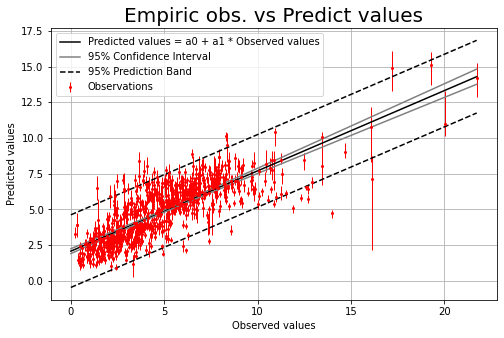

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(0.0, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [24]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: BA_sq_m_ha: mean - 0.861, median - 0.865, CI - [0.82-0.907]

SHAP-values for: DBH_cm: mean - 0.278, median - 0.284, CI - [0.224-0.33]

SHAP-values for: H_m: mean - 0.411, median - 0.408, CI - [0.35-0.471]

SHAP-values for: Origin_ID: mean - 0.288, median - 0.288, CI - [0.255-0.32]

SHAP-values for: Species_ID: mean - 0.963, median - 0.966, CI - [0.925-0.997]



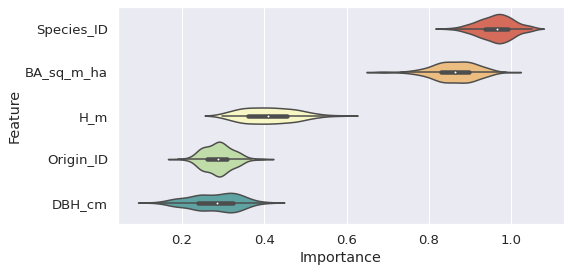

In [26]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['Species_ID', 'BA_sq_m_ha', 'H_m', 'Origin_ID', 'DBH_cm'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [27]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)



In [28]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 106.115, median: 101.0,
 pred. interval (P(0.025)-P(0.975)): 35.825-168.0, 
 conf. interval (p-value=0.95): 61.622-157.382 
***
Aggregate bias statistic: 
 mean: -0.005, median: 0.004,
 pred. interval (P(0.025)-P(0.975)): -0.28-0.232, 
 conf. interval (p-value=0.95): -0.124-0.118 
***
Aggregate RMSE statistic: 
 mean: 1.783, median: 1.773, pred. interval (P(0.025)-P(0.975)): 1.518-2.191, 
 conf. interval (p-value=0.95): 1.635-1.919 
***
Aggregate MSE statistic: 
 mean: 3.208, median: 3.144, pred. interval (P(0.025)-P(0.975)): 2.304-4.799, 
 conf. interval (p-value=0.95): 2.676-3.687 
***
Aggregate R^2 statistic: 
 mean: 0.592, median: 0.598, pred. interval (P(0.025)-P(0.975)): 0.428-0.694, 
 conf. interval (p-value=0.95): 0.54-0.648 
***
Aggregate bias(%) statistic: 
 mean: -0.022, median: 0.085, pred. interval (P(0.025)-P(0.975)): -5.713-5.213, 
 conf. interval (p-value=0.95): -2.585-2.6 
***
Aggregate RMSE(%) statistic: 
 mean

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'Distribution of predicted values')

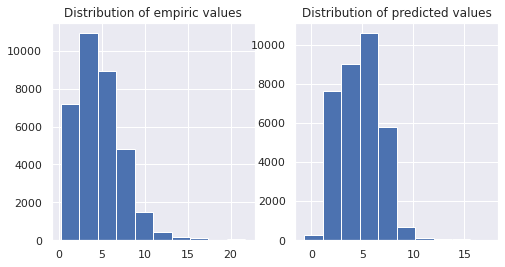

In [29]:
# Preprocessing

results_y['residuals'] = results_y[predictor] - results_y[0]

results_y['residuals_%'] =  results_y['residuals'] / results_y[predictor] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Distribution of empiric values')
axs[1].hist(results_y[0])
axs[1].set_title('Distribution of predicted values')
# plt.show() 

In [30]:
# INPORTANT  - added your intervals
intervals = pd.cut(results_y[predictor], [0, 5, 10, 15, 20, 25])

grouped = results_y.groupby(intervals)

max_obs_in_group = len(results_y)    
    
pre = pd.DataFrame()
pre_rel = pd.DataFrame()

pre = pre.assign(row_number=range(max_obs_in_group))
pre_rel = pre_rel.assign(row_number=range(max_obs_in_group))

for i in range(len(list(grouped))):
    pre[list(grouped)[i][0]] = pd.Series(list(grouped)[i][1]['residuals'])
    pre_rel[list(grouped)[i][0]] = pd.Series(list(grouped)[i][1]['residuals_%'])

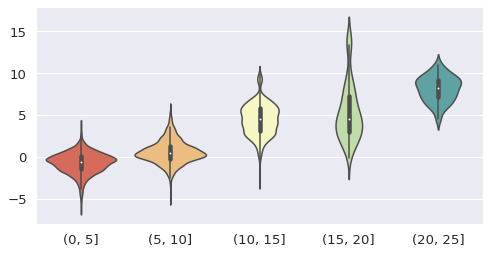

In [31]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre[list(pre.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

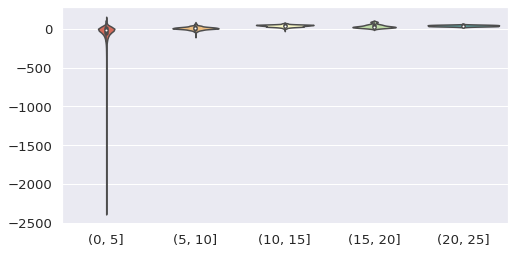

In [32]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel[(pre_rel.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [33]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [34]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [35]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:4.66659
[1]	validation_0-rmse:4.32147
[2]	validation_0-rmse:3.97998
[3]	validation_0-rmse:3.69776
[4]	validation_0-rmse:3.44039
[5]	validation_0-rmse:3.21498
[6]	validation_0-rmse:3.00323
[7]	validation_0-rmse:2.82095
[8]	validation_0-rmse:2.67025
[9]	validation_0-rmse:2.52443
[10]	validation_0-rmse:2.39730
[11]	validation_0-rmse:2.29144
[12]	validation_0-rmse:2.20205
[13]	validation_0-rmse:2.12872


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[14]	validation_0-rmse:2.05640
[15]	validation_0-rmse:2.01034
[16]	validation_0-rmse:1.96310
[17]	validation_0-rmse:1.93051
[18]	validation_0-rmse:1.88997
[19]	validation_0-rmse:1.85345
[20]	validation_0-rmse:1.81425
[21]	validation_0-rmse:1.78549
[22]	validation_0-rmse:1.76452
[23]	validation_0-rmse:1.75150
[24]	validation_0-rmse:1.72664
[25]	validation_0-rmse:1.70214
[26]	validation_0-rmse:1.68688
[27]	validation_0-rmse:1.66863
[28]	validation_0-rmse:1.65334
[29]	validation_0-rmse:1.64331
[30]	validation_0-rmse:1.63272
[31]	validation_0-rmse:1.62005
[32]	validation_0-rmse:1.60534
[33]	validation_0-rmse:1.59502
[34]	validation_0-rmse:1.58321
[35]	validation_0-rmse:1.57040
[36]	validation_0-rmse:1.56401
[37]	validation_0-rmse:1.55668
[38]	validation_0-rmse:1.55381
[39]	validation_0-rmse:1.54923
[40]	validation_0-rmse:1.53942
[41]	validation_0-rmse:1.53700
[42]	validation_0-rmse:1.52623
[43]	validation_0-rmse:1.52156
[44]	validation_0-rmse:1.51287
[45]	validation_0-rmse:1.50747
[46]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [36]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 168


In [37]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

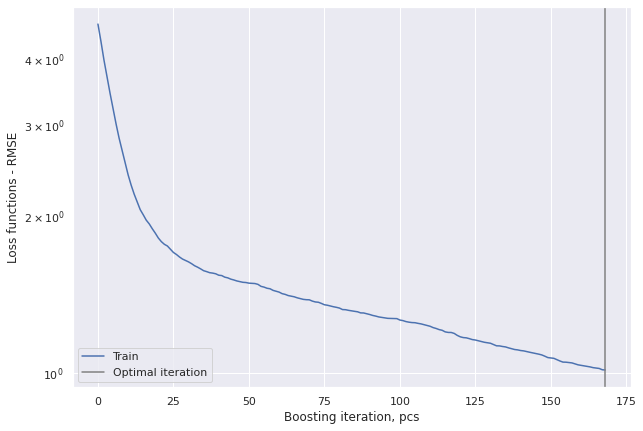

In [38]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [39]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.01
RMSE: 1.0
Relative RMSE(%):  21.326
MSE: 1.0
R square: 87.1%


In [40]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.883
Uncertainty
a0: 1.03+/-0.05
a1: 0.782+/-0.010


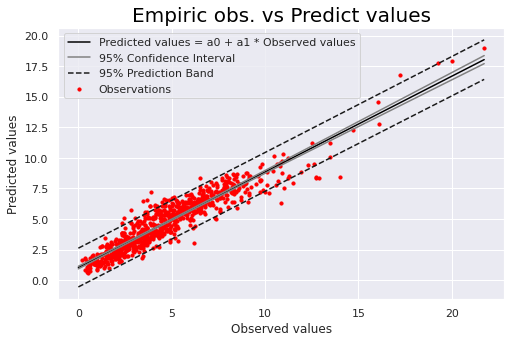

In [41]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(0.0, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

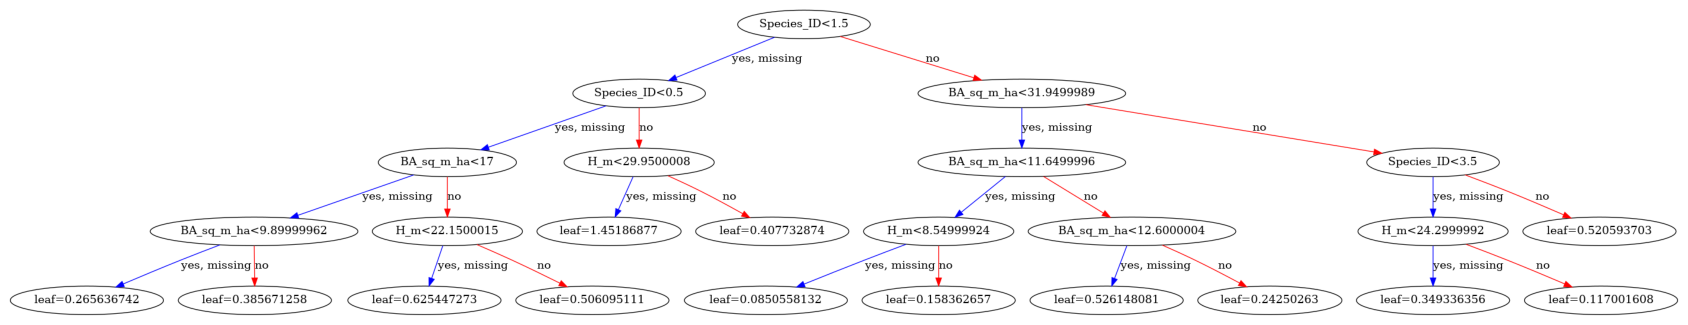

In [43]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

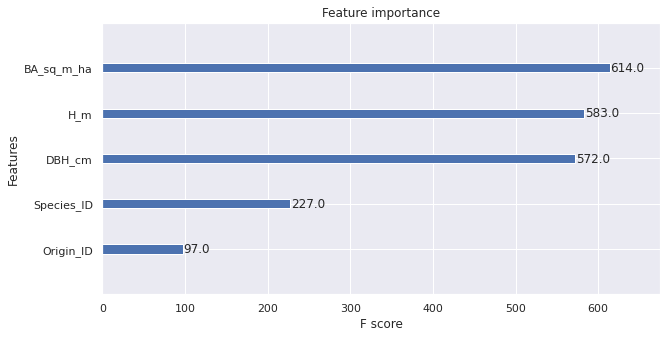

In [45]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

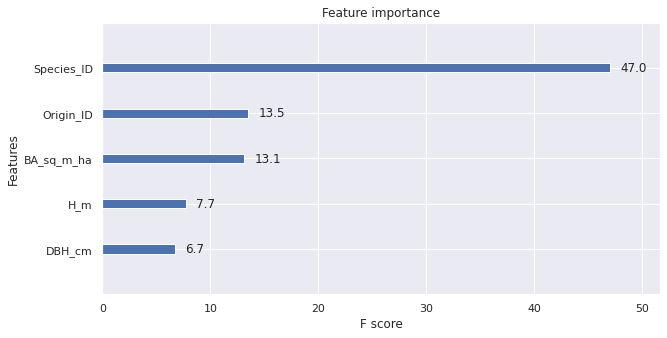

In [46]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

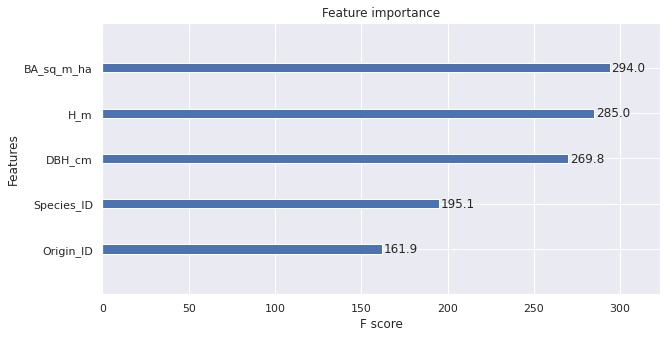

In [47]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [48]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


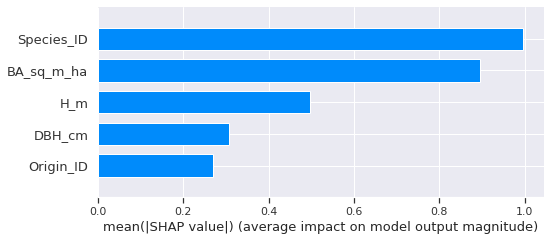

In [49]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

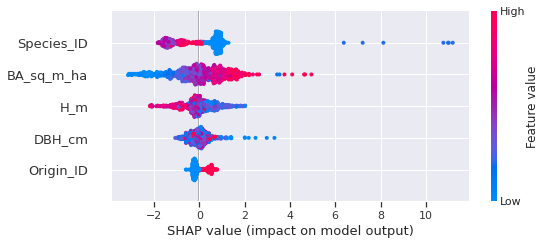

In [50]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

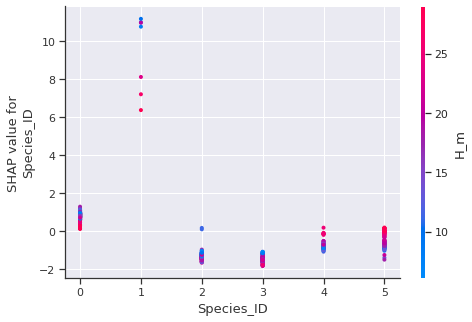

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


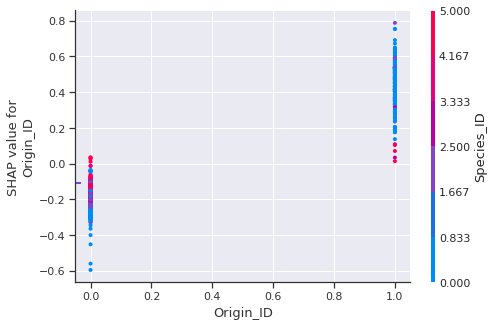

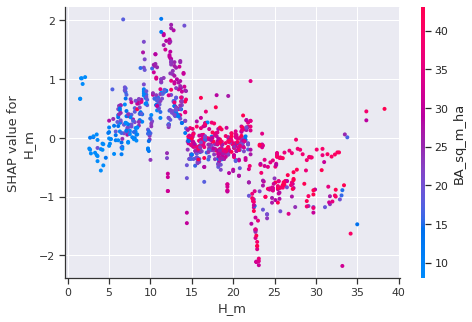

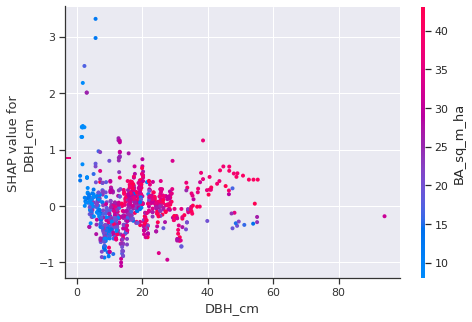

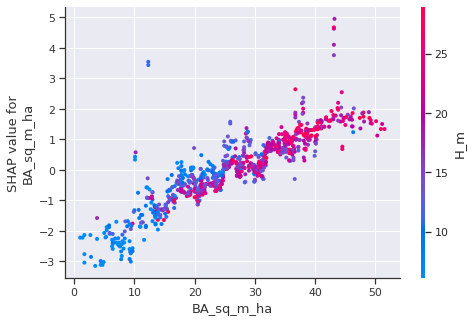

In [51]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [52]:
# Save to JSON
f_xgb_model.save_model("../01_output_data/XGBoost_models/05_M_foliage_other_authors_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../01_output_data/XGBoost_models/05_M_foliage_other_authors_XGB_model.txt")